In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv('./../data/full_onion_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)


In [5]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")

In [6]:
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


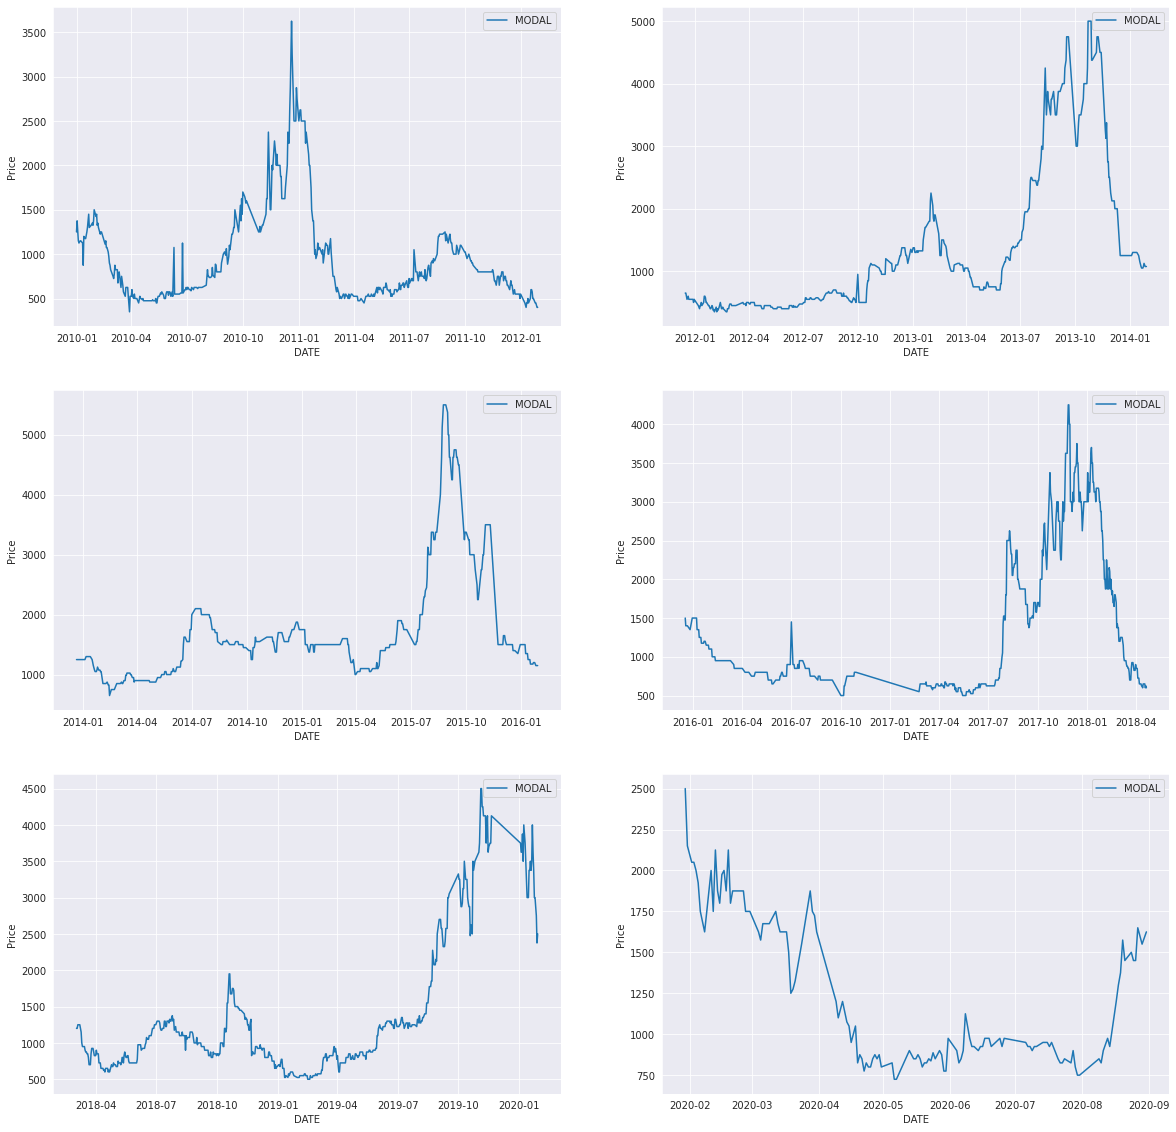

In [7]:
import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(3,2, figsize=(20,20))
sns.lineplot(data= df[2194:], ax= axes[0,0])
sns.lineplot(data= df[1715:2220], ax= axes[0,1])
sns.lineplot(data= df[1275:1740], ax= axes[1,0])
sns.lineplot(data= df[700:1300], ax= axes[1,1])
sns.lineplot(data= df[144:750], ax= axes[2,0])
sns.lineplot(data= df[:144], ax= axes[2,1])
axes[0,0].set_ylabel('Price')
axes[0,1].set_ylabel('Price')
axes[1,0].set_ylabel('Price')
axes[1,1].set_ylabel('Price')
axes[2,0].set_ylabel('Price')
axes[2,1].set_ylabel('Price')
plt.show()

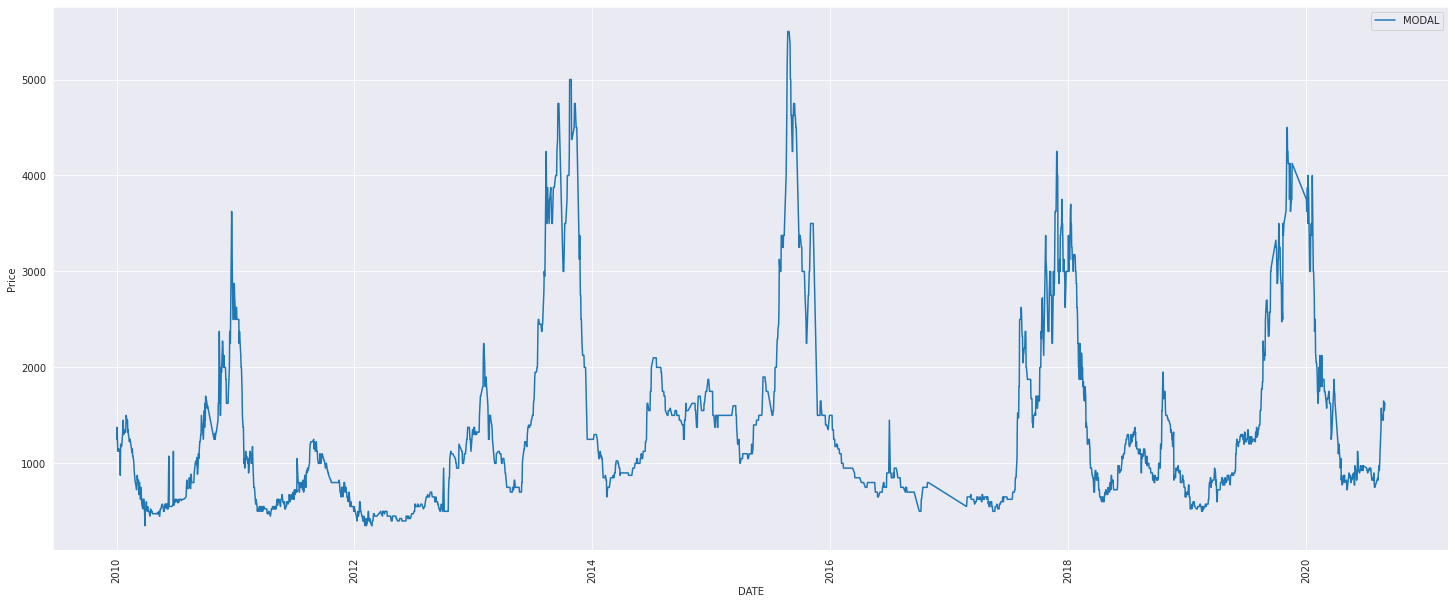

In [8]:
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df, ax= ax)
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Month Resample plots


In [9]:
month_sampled = df.resample('1M')

In [10]:
# month_sampled = month_sampled.interpolate(method='linear')
month_sampled = month_sampled.mean()


In [11]:
month_sampled.head(10)

MODAL
DATE                   
2010-01-31  1246.250000
2010-02-28  1173.000000
2010-03-31   678.571429
2010-04-30   497.875000
2010-05-31   511.285714
2010-06-30   611.227273
2010-07-31   616.200000
2010-08-31   807.950000
2010-09-30  1229.777778
2010-10-31  1468.000000

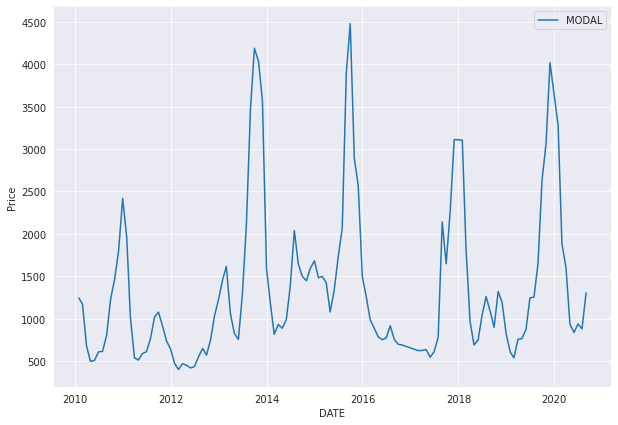

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = month_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

In [13]:
year_sampled = df.resample('1Y')
year_sampled = year_sampled.mean()
year_sampled.head(10)

MODAL
DATE                   
2010-12-31  1053.514894
2011-12-31   868.092827
2012-12-31   602.610879
2013-12-31  2001.687764
2014-12-31  1358.411504
2015-12-31  2151.401869
2016-12-31   860.512821
2017-12-31  1499.221453
2018-12-31  1251.478873
2019-12-31  1447.007042

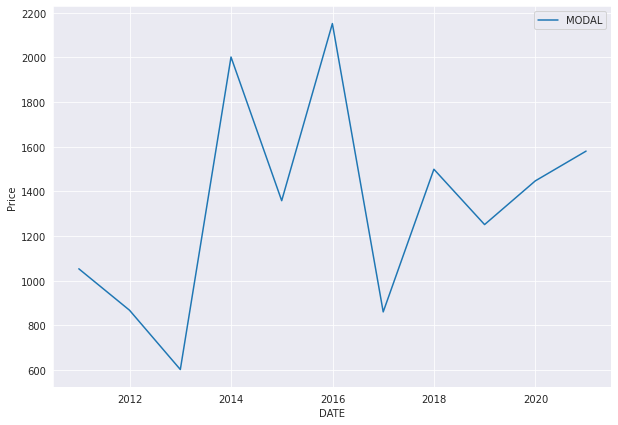

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = year_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

### Interpolation of data to 1D fequency

In [15]:
Interpolated_df = df.resample('1D').interpolate(mehod= "linear")

### Moving average plot for smoothening of curve


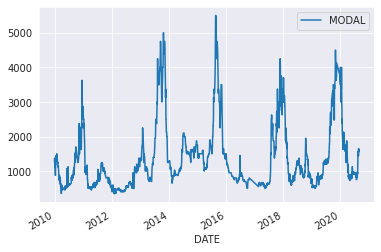

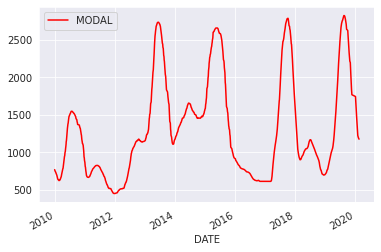

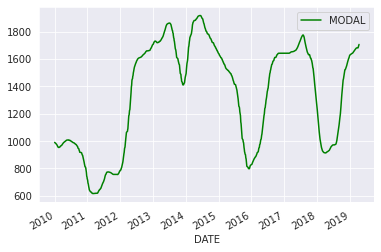

In [16]:
#window size is 365 days
half_year_rolling_df = df.rolling(window= 130)
half_year_rolling_mean_df = half_year_rolling_df.mean()
df.plot()
half_year_rolling_mean_df.plot(color= 'red')
full_year_rolling_df = df.rolling(window= 365)
full_year_rolling_mean_df = full_year_rolling_df.mean()
full_year_rolling_mean_df.plot(color= 'green')
plt.show()

In [17]:
Interpolated_df.to_csv("index_onion_data.csv")

In [2]:
indexed_df = pd.read_csv("index_onion_data.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
indexed_df.head()

DATE
2010-01-01    1250.0
2010-01-02    1375.0
2010-01-03    1262.5
2010-01-04    1150.0
2010-01-05    1125.0
Name: MODAL, dtype: float64

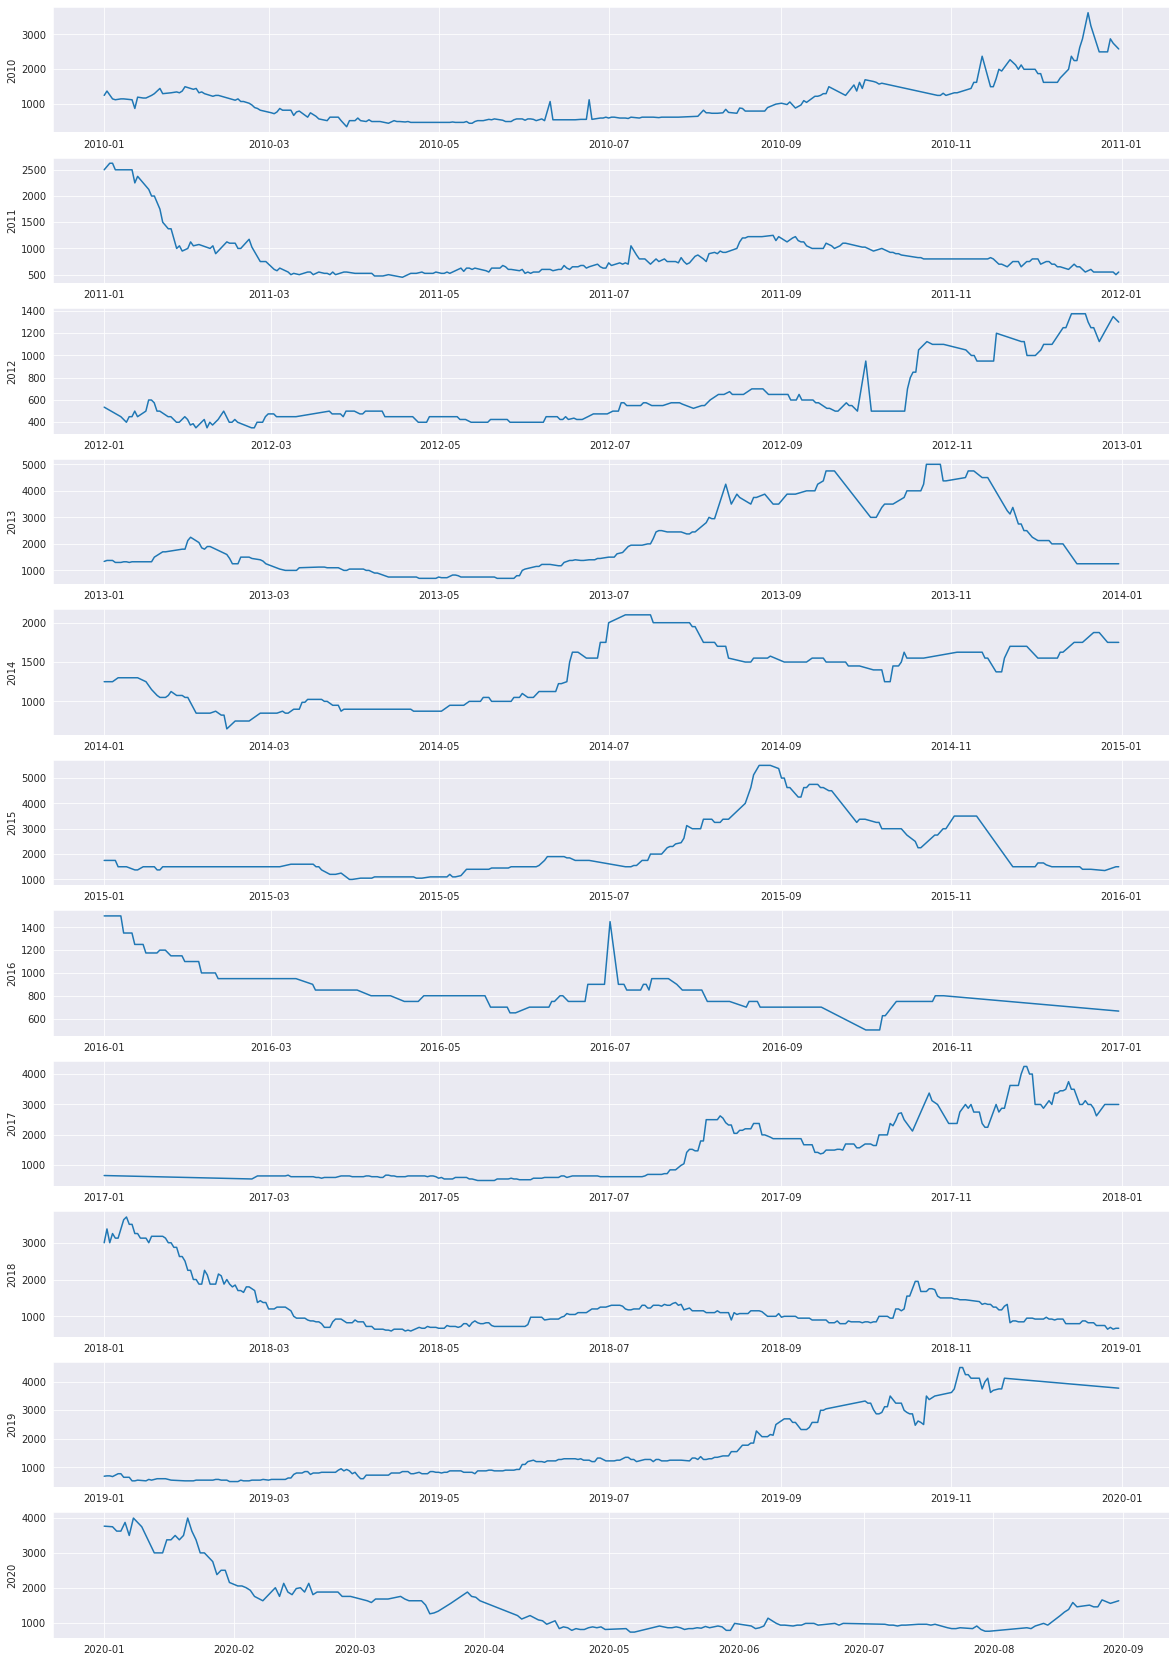

In [19]:
groups = indexed_df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(len(years),1, figsize=(20,30))
i = 0
for year in years:
    sns.lineplot(data= years[year], ax= axes[i])
    axes[i].set_ylabel(year)
    i += 1

### Distribution of prices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff75ba18a90>]],
      dtype=object)

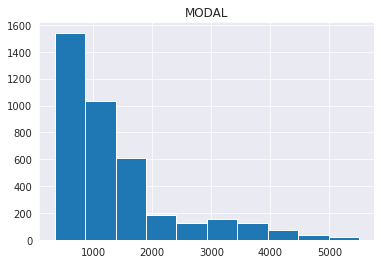

In [20]:
import math
Interpolated_df.hist()

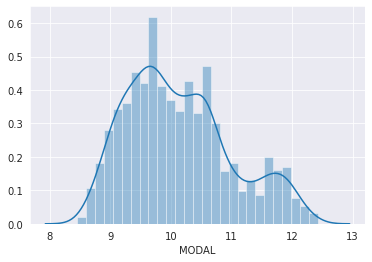

In [21]:
sns.distplot( Interpolated_df['MODAL'].apply(lambda x: math.log2(x)))

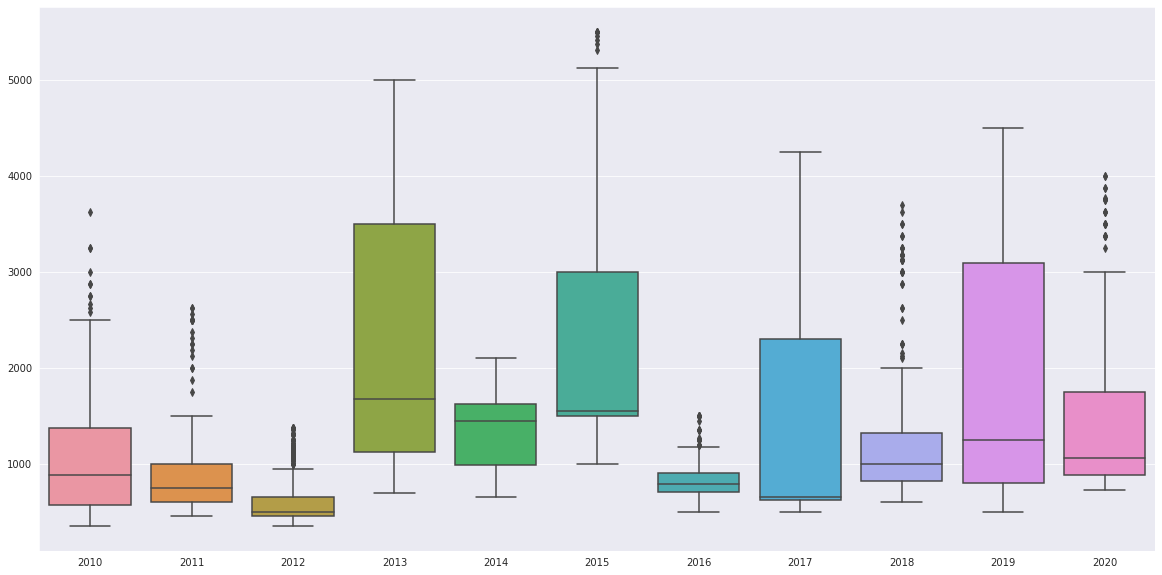

In [22]:
groups = indexed_df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group
fig, axes = plt.subplots(figsize=(20,10))
i = 0
labels = [i for i in range(2010,2021)]
sns.boxplot(data=list(years.values()), ax= axes)
axes.set_xticklabels(labels)
plt.show()

In [23]:
diff_df = Interpolated_df.diff(periods=365)
# diff_df2 = diff_df.diff(periods= 5)
# diff_df3 = diff_df2.diff(periods= 10)
# diff_df4 = diff_df3.diff(periods= 10)
# diff_df5 = diff_df4.diff(periods= 5)
# diff_df6 = diff_df5.diff(periods= 10)
# diff_df6.plot()
plt.show()

### Adfuller test for differencing order

In [20]:
from statsmodels.tsa.stattools import adfuller

print("p-value= ", adfuller(Interpolated_df['MODAL'])[1])
for i in range(1,800):
    p_value = adfuller(Interpolated_df['MODAL'].diff(periods= i).dropna())[1]
    print("p-value= ", p_value)
    if p_value<=0.05:
        print("Required differencing is= ", i)
        break

        
    

p-value=  0.004004298989770317
p-value=  1.035091471527314e-28
Required differencing is=  1


### Seasonal decompose of the Dataset

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Interpolated_df, model='multiplicative', freq= 730)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

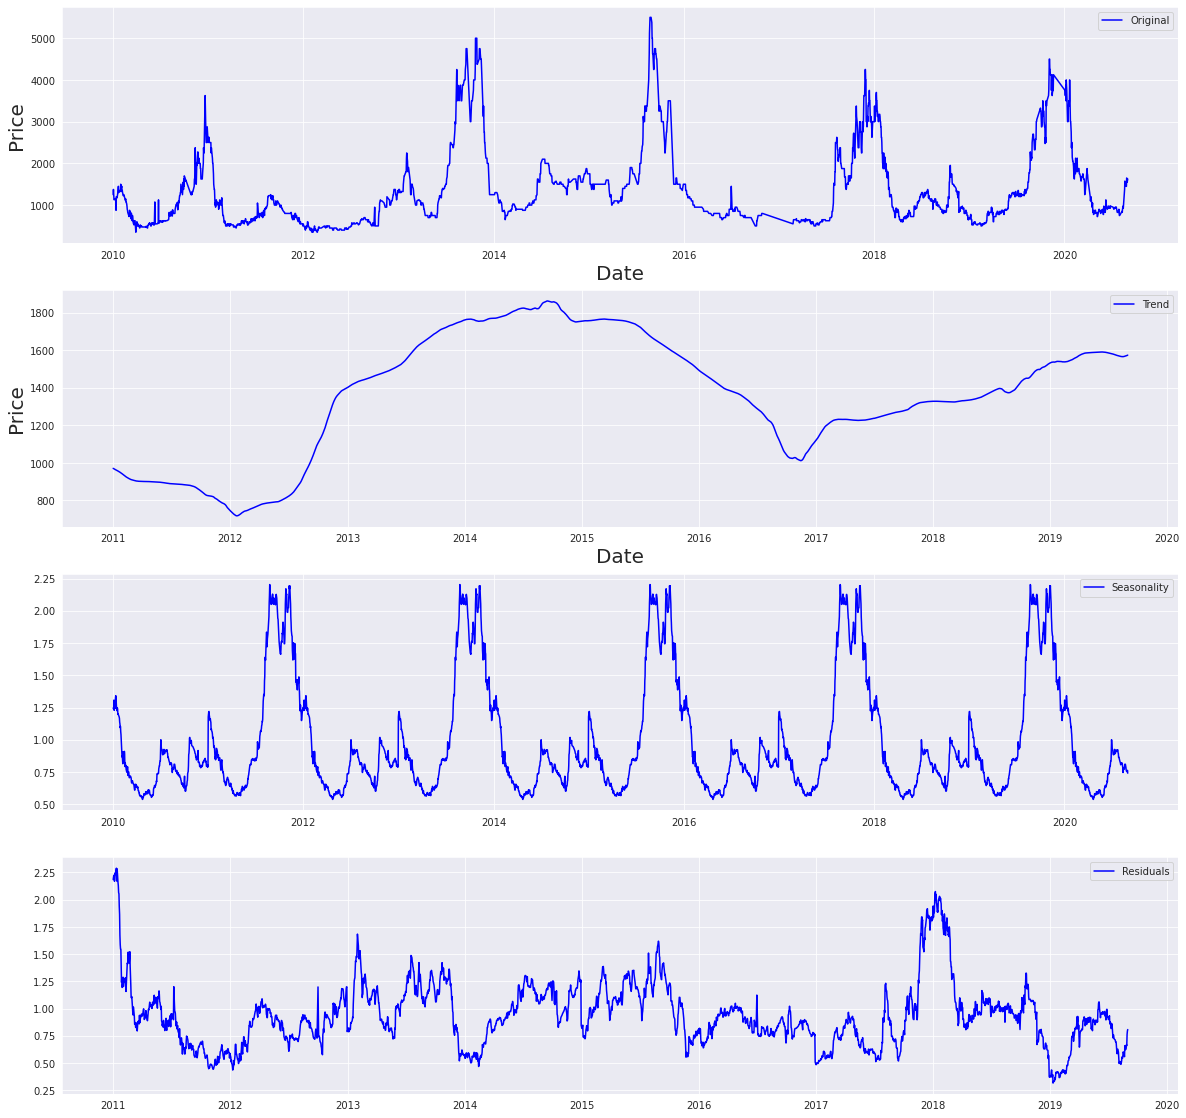

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot gathered statistics
plt.figure(figsize=(20,20))
plt.title('Decomposition of Vegetable Prices Time Series', fontsize=20)
plt.subplot(411)
plt.plot(Interpolated_df, label='Original', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.show()


plt.tight_layout()

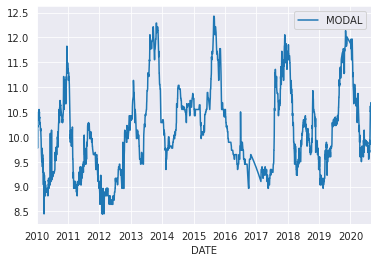

In [18]:
import math
normalized_df =Interpolated_df.copy()
normalized_df['MODAL'] = normalized_df['MODAL'].apply(lambda x: math.log2(x))
normalized_df.plot()
plt.show()

In [21]:
print("p-value= ", adfuller(normalized_df['MODAL'])[1])

p-value=  0.007321576630078853


In [22]:
decomposition = seasonal_decompose(normalized_df, model='multiplicative', freq= 365)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

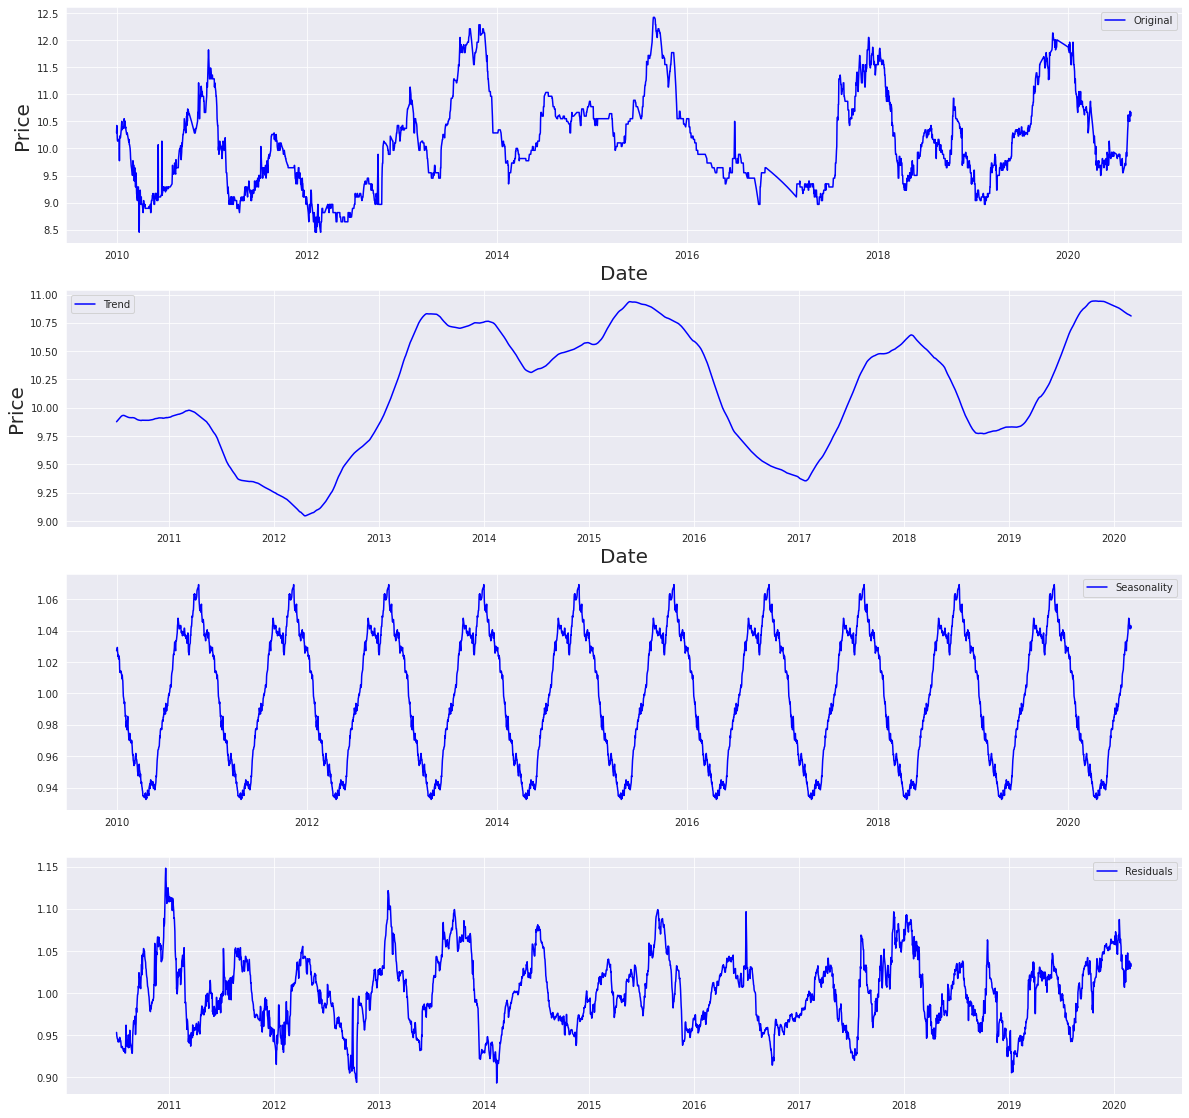

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot gathered statistics
plt.figure(figsize=(20,20))
plt.title('Decomposition of Vegetable Prices Time Series', fontsize=20)
plt.subplot(411)
plt.plot(normalized_df, label='Original', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.show()


plt.tight_layout()

In [27]:
diffed1_df = normalized_df.diff(periods= 1).dropna()
diffed1_730_df = diffed1_df.diff(periods= 730).dropna()
diffed_1_365_df = diffed1_df.diff(periods= 365).dropna()

decomposition_d = seasonal_decompose(diffed_1_365_df, model='additive', freq= 1)
trend_d    = pd.DataFrame(decomposition_d.trend.fillna(method='bfill'))     # Backfill missing values
seasonal_d = pd.DataFrame(decomposition_d.seasonal.fillna(method='bfill'))
residual_d = pd.DataFrame(decomposition_d.resid.fillna(method='bfill'))
data_df = pd.DataFrame(decomposition_d.trend+decomposition_d.resid).dropna()

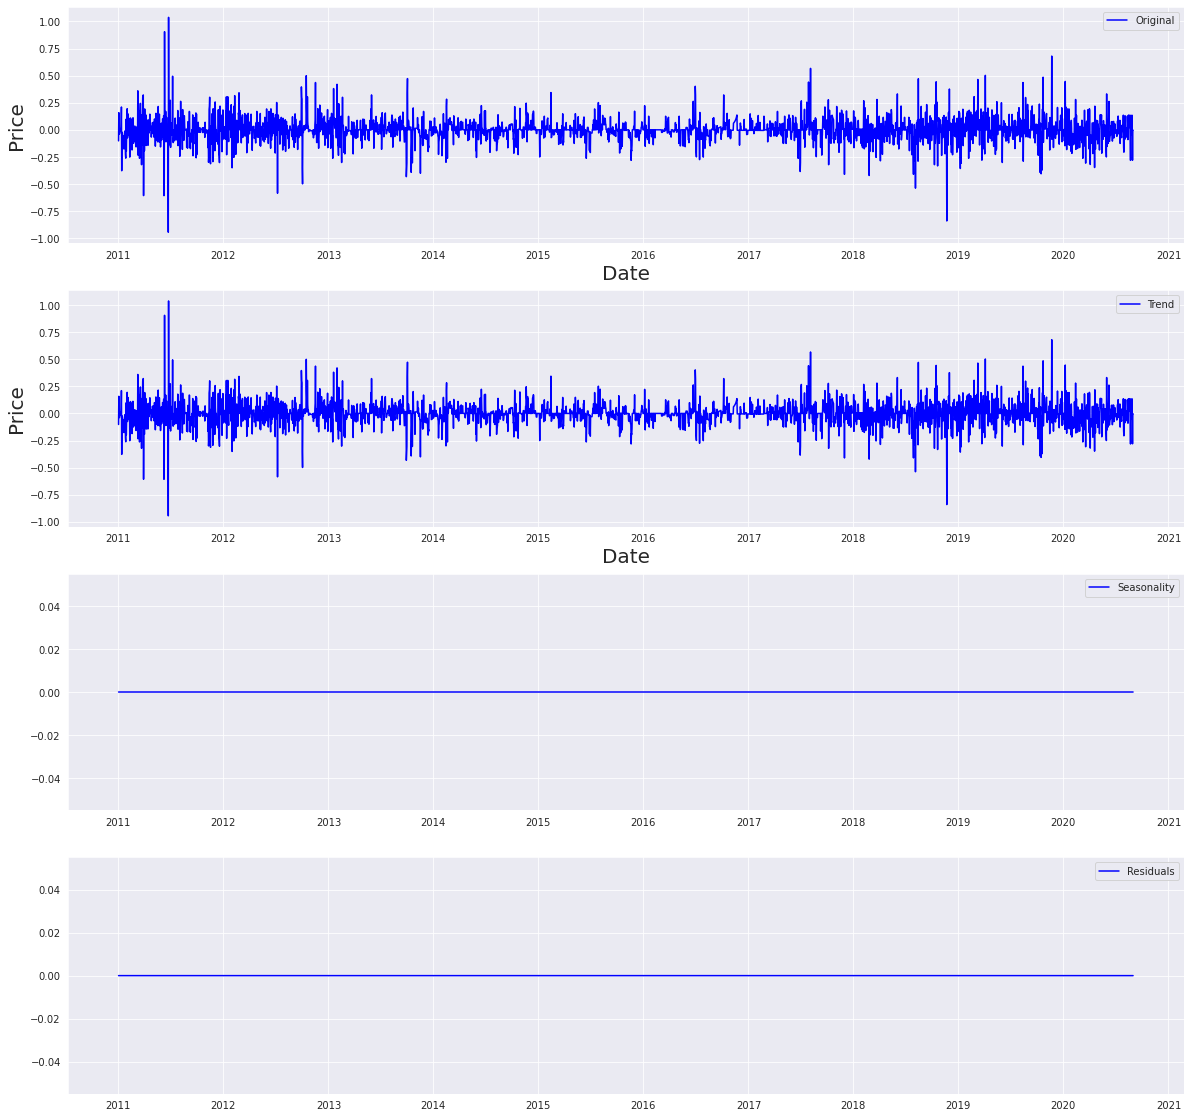

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot gathered statistics
plt.figure(figsize=(20,20))
plt.title('Decomposition of Vegetable Prices Time Series', fontsize=20)
plt.subplot(411)
plt.plot(diffed_1_365_df, label='Original', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend_d, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('Price',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal_d,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_d, label='Residuals', color="blue")
plt.legend(loc='best')
plt.show()


plt.tight_layout()

In [107]:
print("p-value= ", adfuller(diffed_1_365_df['MODAL'])[1])

p-value=  1.009562611455932e-22


## SARIMA models

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(normalized_df, 
               title="ACF on Normalized Series") 

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


NameError: name 'normalized_df' is not defined

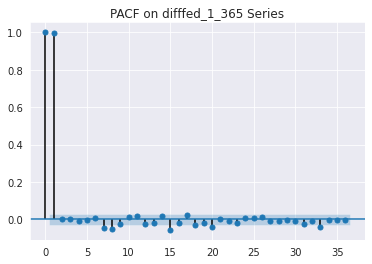

In [120]:
fig = plot_pacf(normalized_df, 
               title="PACF on Normalized Series") 

- Weekly seasonality is apearing in abouve PACF plot

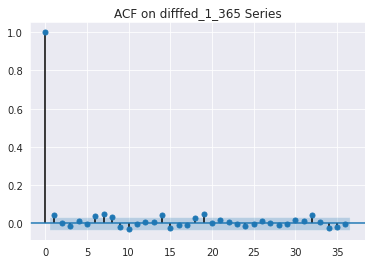

In [121]:
fig = plot_acf(diffed_1_365_df, 
               title="ACF on difffed_1_365 Series")

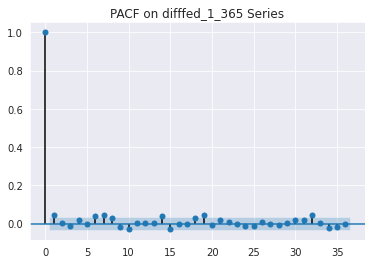

In [122]:
fig = plot_pacf(diffed_1_365_df, 
               title="PACF on difffed_1_365 Series")

### Statistical tests on Normalized and 7 diffed data

In [119]:
diffed7_df = Interpolated_df.diff(7).dropna()
print("p-value= ", adfuller(diffed7_df['MODAL'])[1])

p-value=  9.240423781792289e-16


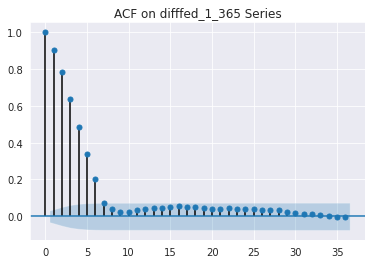

In [123]:
fig = plot_acf(diffed7_df, 
               title="ACF on difffed_1_365 Series")

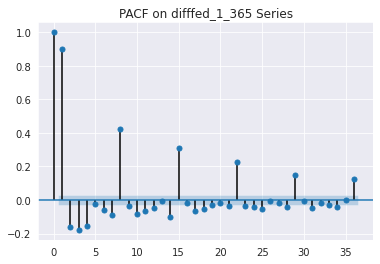

In [124]:
fig = plot_pacf(diffed7_df, 
               title="PACF on difffed_1_365 Series")

In [149]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import numpy as np

def create_model(train_data, test_data):
    ps = [4,5,6]
    qs = [2,6]
    ds = [1,2,3,7]
    Ps = [4,5,6]
    Qs = [0,1,2]
    Ds = [0,1,2]
    Ss =[2,5,7]

    for p in ps:
        for q in qs:
            for d in ds:
                for P in Ps:
                    for Q in Qs:
                        for D in Ds:
                            for S in Ss:
                                model = SARIMAX(train_data, order= (p,d,q), seasonal_order= (P,D,Q,S))
                                #fit the model
                                start = time()
                                model_fit = model.fit()
                                end = time()
                                print('Model Fitting Time:', end - start)
                                print(model_fit.summary())
                                fcast=model_fit.forecast(test_data.shape[0])
                                fcast=pd.DataFrame({"Forecast": fcast[0]},index=test_data.index)
                                residuals = test_data - fcast.values
                                print(f'Root Mean Squared Error for {(p,d,q)},{(P,D,Q,S)}: is ', np.sqrt(np.mean(residuals**2)))
                                fig, axes = plt.subplots(figsize= (20,10))
                                sns.lineplot(data= test_data, ax= axes )
                                sns.lineplot(data= fcast, ax= axes, color='red')
                                plt.show()


/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 12.477869749069214
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 0, 2)   Log Likelihood              -21183.426
Date:                           Sat, 17 Oct 2020   AIC                          42388.852
Time:                                   18:33:43   BIC                          42457.062
Sample:                               01-01-2010   HQIC                         42413.146
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2276      0.041     -5.601      0.000      -0.307      -0.148
ar.L

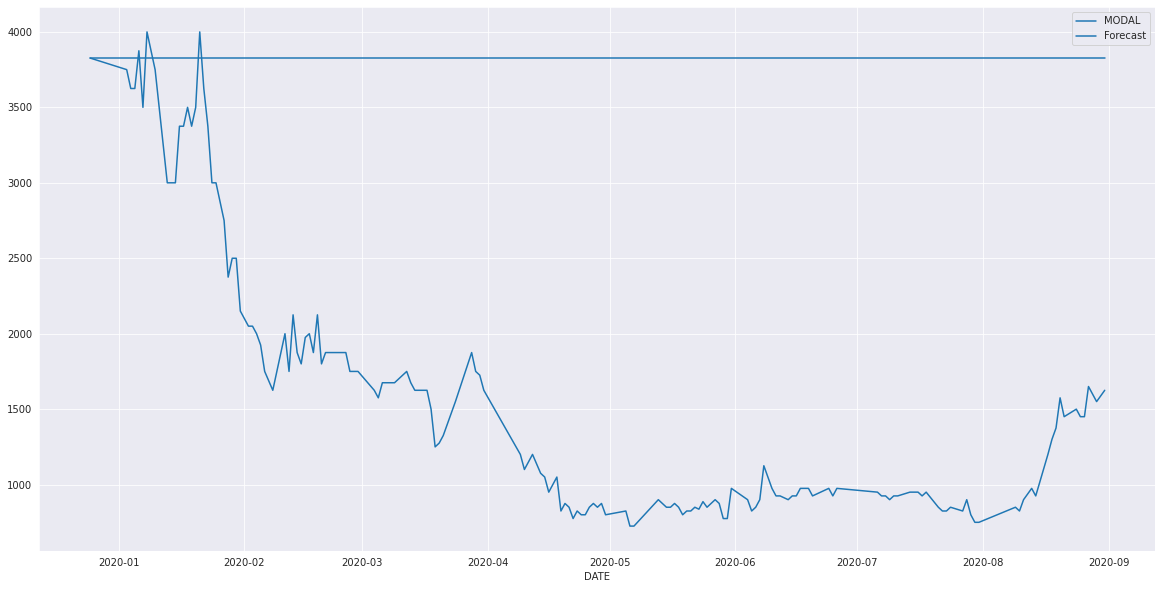

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 35.54407739639282
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 0, 5)   Log Likelihood              -21182.129
Date:                           Sat, 17 Oct 2020   AIC                          42386.259
Time:                                   18:34:19   BIC                          42454.468
Sample:                               01-01-2010   HQIC                         42410.552
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0831      0.037     -2.237      0.025      -0.156      -0.010
ar.L2

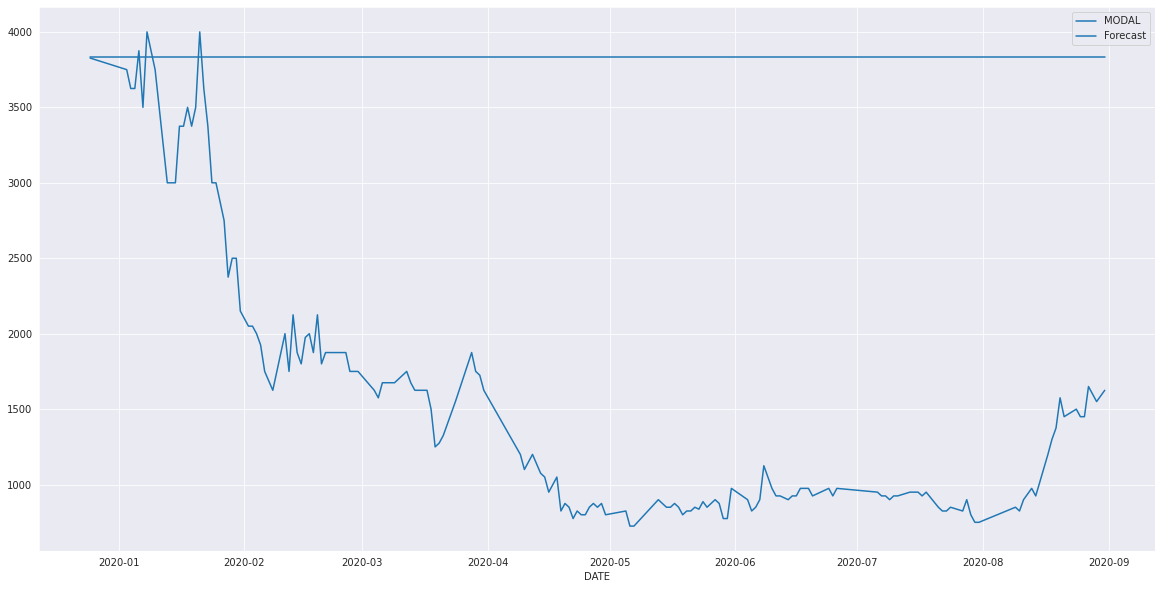

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 49.60180854797363
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 0, 7)   Log Likelihood              -21185.674
Date:                           Sat, 17 Oct 2020   AIC                          42393.348
Time:                                   18:35:10   BIC                          42461.557
Sample:                               01-01-2010   HQIC                         42417.641
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0349      0.046     -0.766      0.444      -0.124       0.054
ar.L2

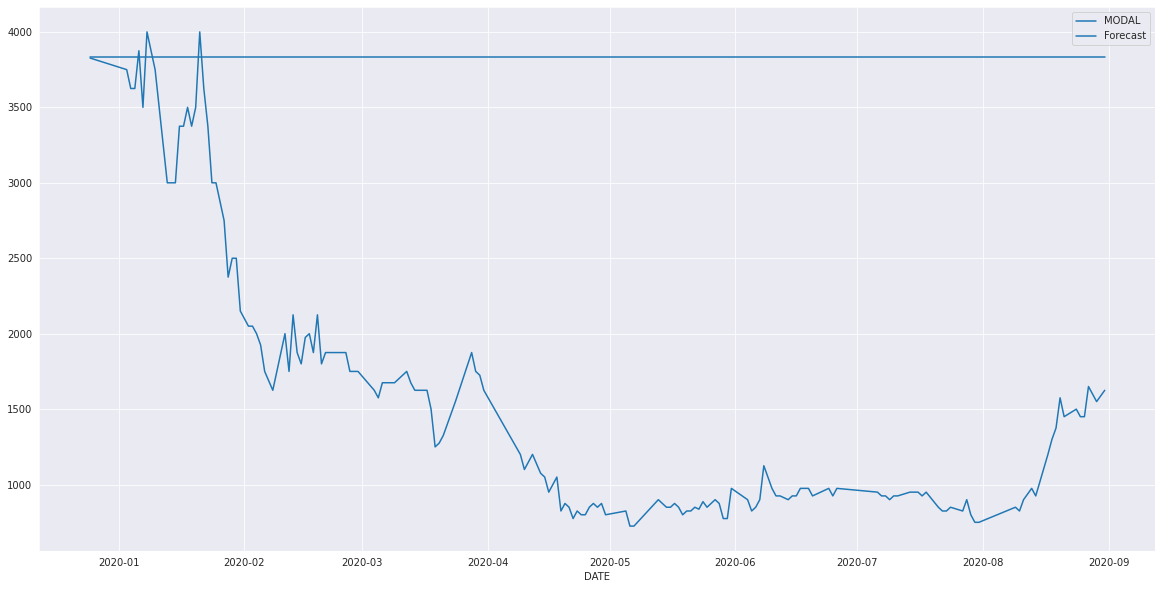

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 43.991065979003906
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 0, 2)   Log Likelihood              -21187.153
Date:                           Sat, 17 Oct 2020   AIC                          42396.305
Time:                                   18:35:54   BIC                          42464.509
Sample:                               01-01-2010   HQIC                         42420.597
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1175      0.008     14.417      0.000       0.102       0.133
ar.L

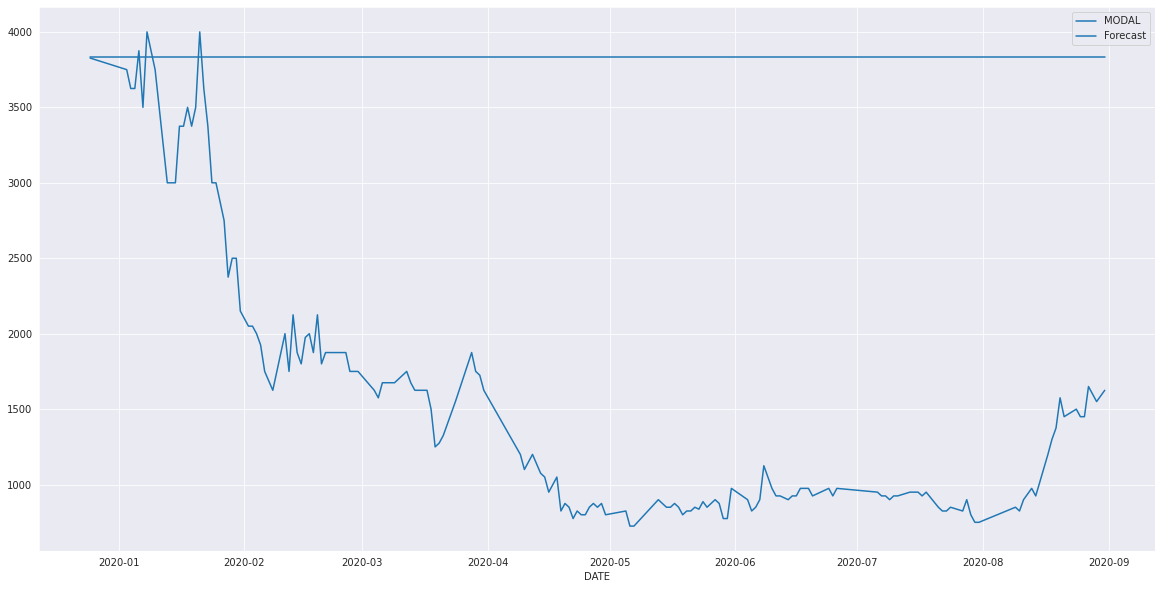

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 87.3201174736023
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 0, 5)   Log Likelihood              -21389.655
Date:                           Sat, 17 Oct 2020   AIC                          42801.309
Time:                                   18:37:23   BIC                          42869.504
Sample:                               01-01-2010   HQIC                         42825.599
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7096      0.009     82.811      0.000       0.693       0.726
ar.L2 

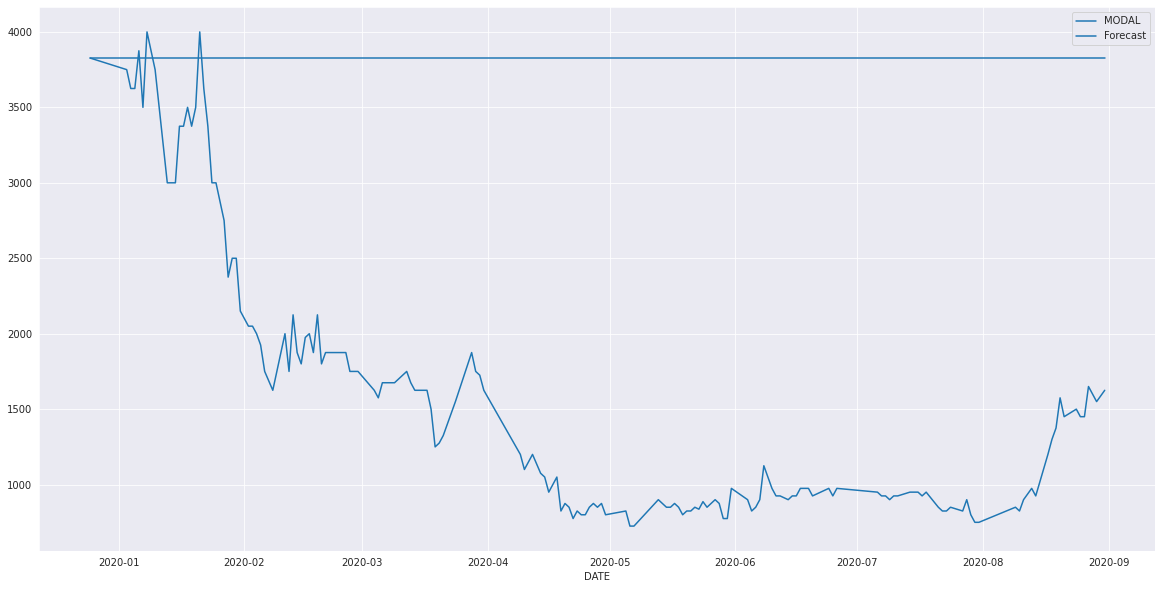

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 169.8822546005249
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 0, 7)   Log Likelihood              -21441.028
Date:                           Sat, 17 Oct 2020   AIC                          42904.056
Time:                                   18:40:13   BIC                          42972.244
Sample:                               01-01-2010   HQIC                         42928.344
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1157      0.020      5.704      0.000       0.076       0.155
ar.L2

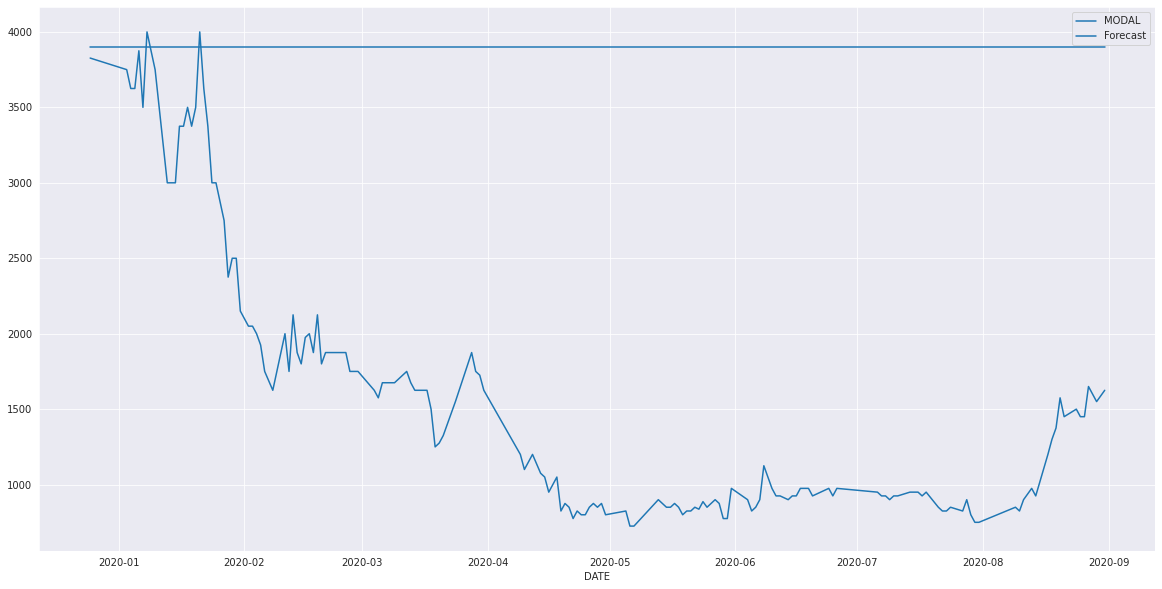

Model Fitting Time: 51.23450827598572
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 0, 2)   Log Likelihood              -21436.741
Date:                           Sat, 17 Oct 2020   AIC                          42895.482
Time:                                   18:41:06   BIC                          42963.679
Sample:                               01-01-2010   HQIC                         42919.773
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0753      0.007     10.832      0.000       0.062       0.089
ar.L2

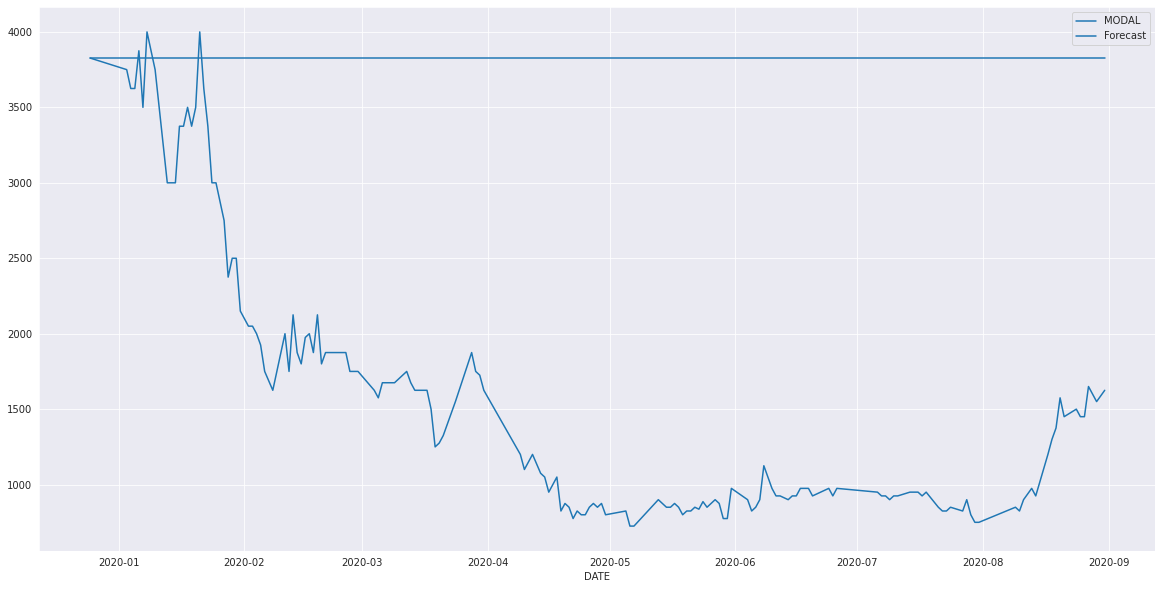

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 160.01248168945312
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 0, 5)   Log Likelihood              -22268.144
Date:                           Sat, 17 Oct 2020   AIC                          44558.287
Time:                                   18:43:46   BIC                          44626.466
Sample:                               01-01-2010   HQIC                         44582.573
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7901      0.009     84.786      0.000       0.772       0.808
ar.L

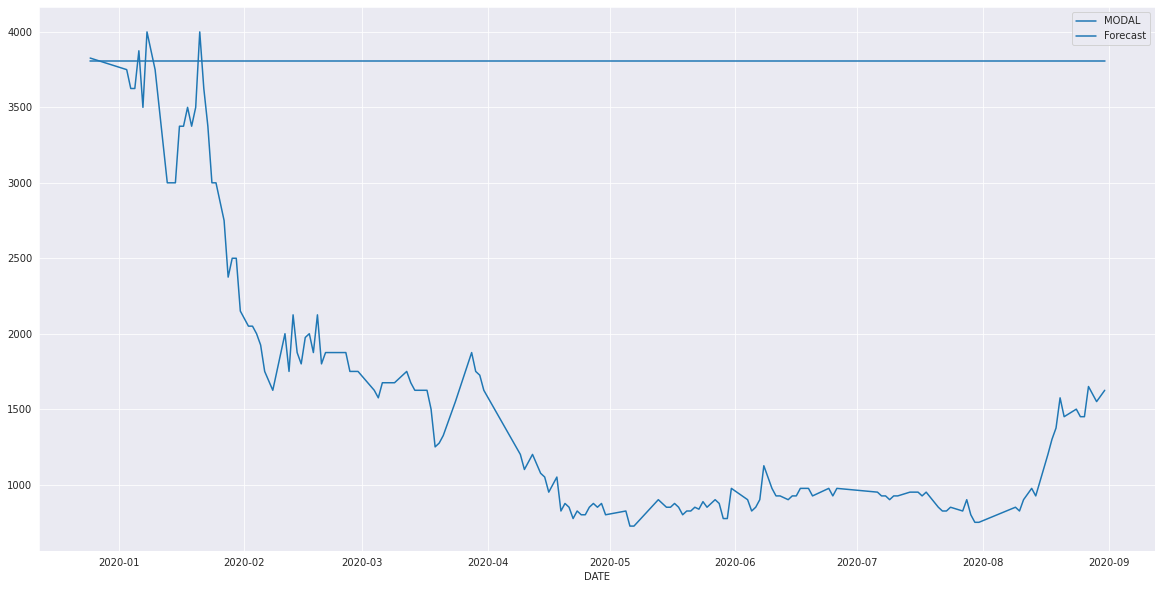

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 167.17217636108398
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 0, 7)   Log Likelihood              -22192.196
Date:                           Sat, 17 Oct 2020   AIC                          44406.392
Time:                                   18:46:34   BIC                          44474.558
Sample:                               01-01-2010   HQIC                         44430.674
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6110      0.012    -52.468      0.000      -0.634      -0.588
ar.L

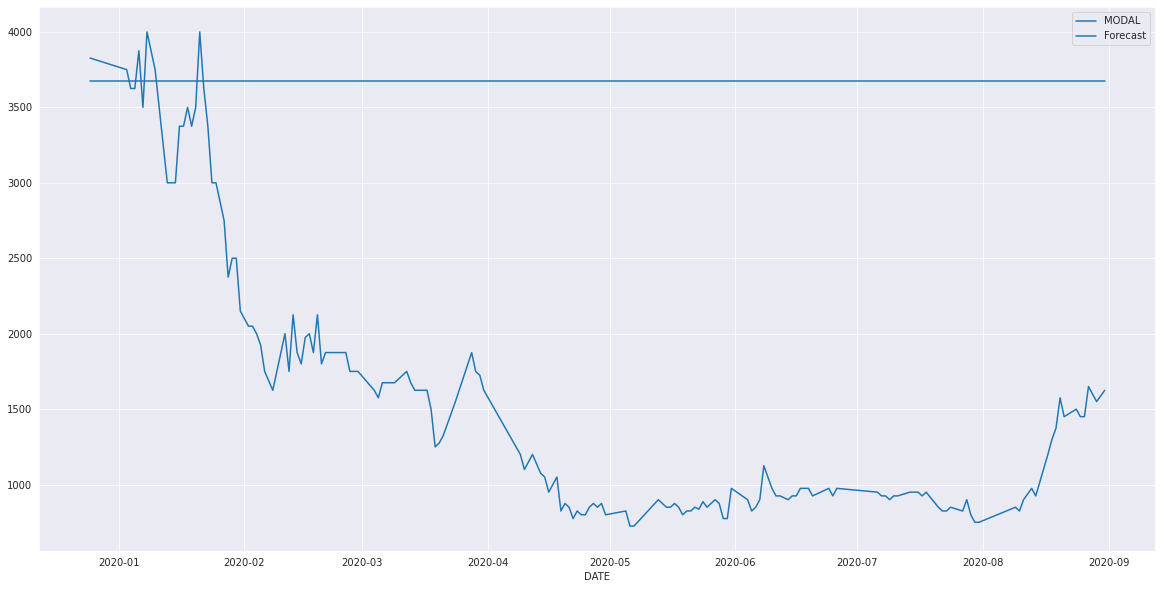

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 17.33770990371704
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 1, 2)   Log Likelihood              -21181.383
Date:                           Sat, 17 Oct 2020   AIC                          42386.767
Time:                                   18:46:53   BIC                          42461.177
Sample:                               01-01-2010   HQIC                         42413.268
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3626      0.069     -5.281      0.000      -0.497      -0.228
ar.L2

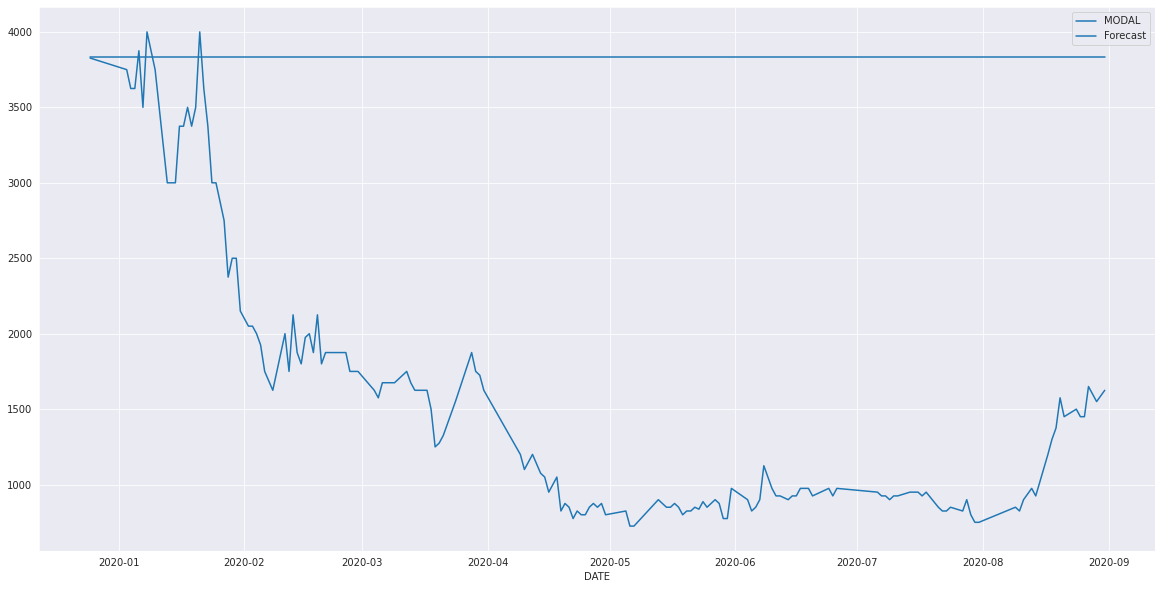

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 43.39008283615112
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 1, 5)   Log Likelihood              -21182.074
Date:                           Sat, 17 Oct 2020   AIC                          42388.147
Time:                                   18:47:37   BIC                          42462.557
Sample:                               01-01-2010   HQIC                         42414.649
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0876      0.036     -2.403      0.016      -0.159      -0.016
ar.L2

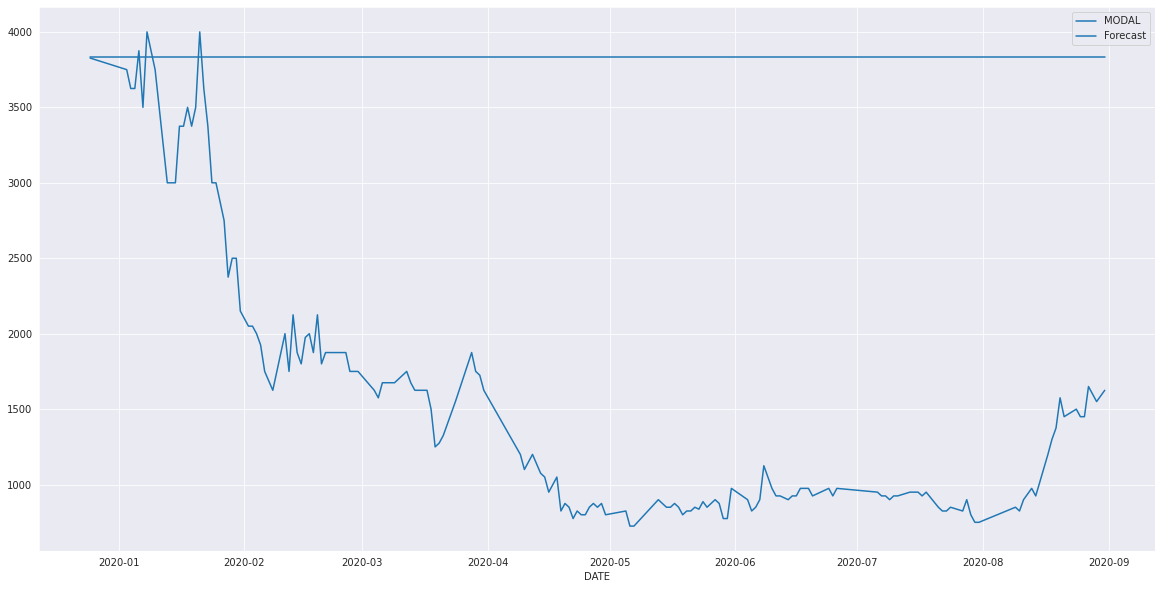

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 67.07745885848999
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 1, 7)   Log Likelihood              -21185.665
Date:                           Sat, 17 Oct 2020   AIC                          42395.331
Time:                                   18:48:44   BIC                          42469.741
Sample:                               01-01-2010   HQIC                         42421.832
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0345      0.046     -0.757      0.449      -0.124       0.055
ar.L2

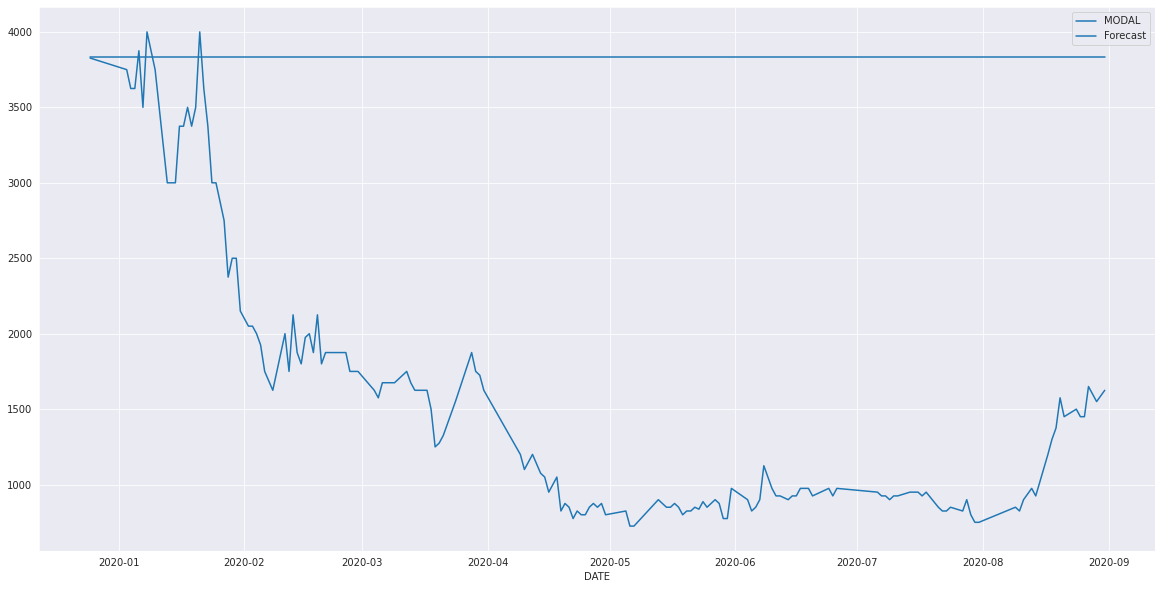

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 63.40002107620239
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 1, 2)   Log Likelihood              -21188.194
Date:                           Sat, 17 Oct 2020   AIC                          42400.388
Time:                                   18:49:48   BIC                          42474.791
Sample:                               01-01-2010   HQIC                         42426.888
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1232      0.009     14.235      0.000       0.106       0.140
ar.L2

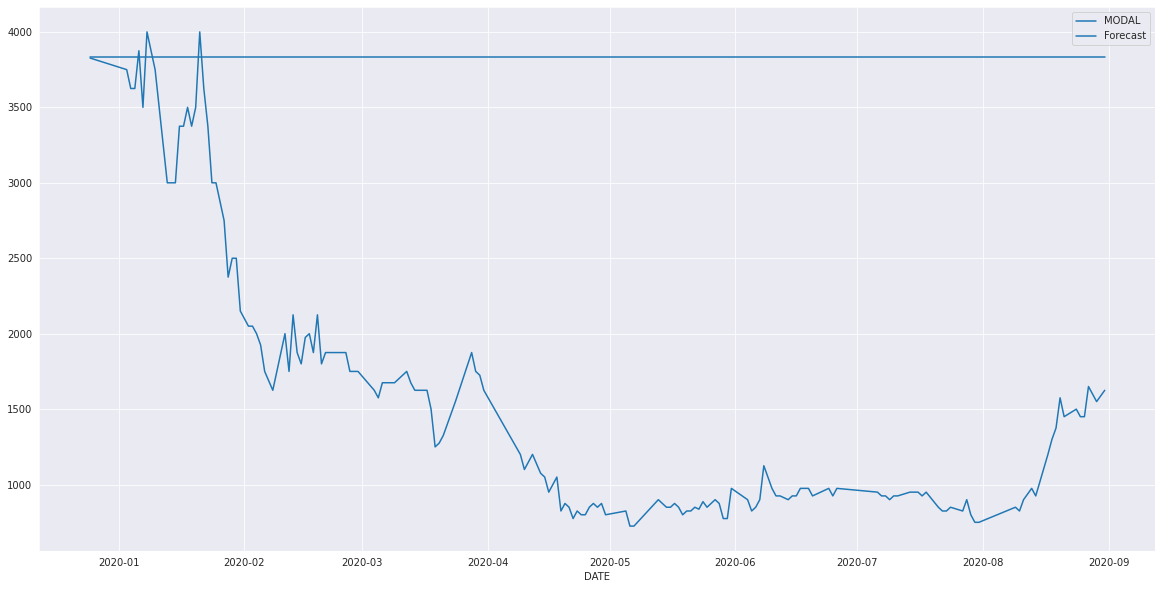

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 127.77553510665894
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 1, 5)   Log Likelihood              -21186.374
Date:                           Sat, 17 Oct 2020   AIC                          42396.748
Time:                                   18:51:57   BIC                          42471.141
Sample:                               01-01-2010   HQIC                         42423.245
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8408      0.009    199.458      0.000       1.823       1.859
ar.L

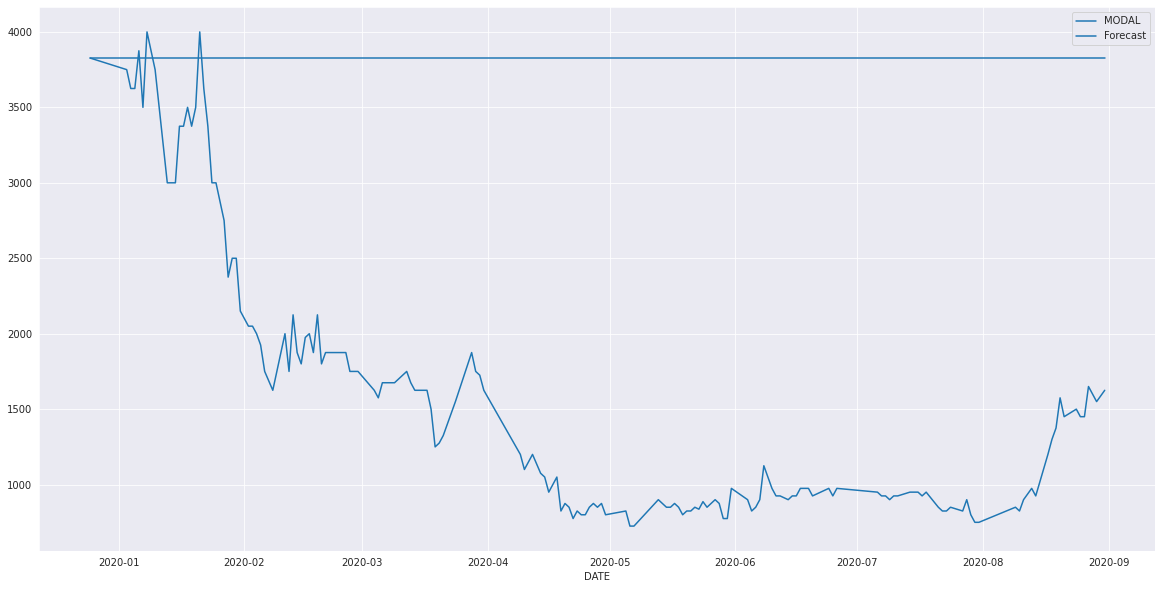

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 168.4079234600067
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 1, 7)   Log Likelihood              -21176.744
Date:                           Sat, 17 Oct 2020   AIC                          42377.488
Time:                                   18:54:46   BIC                          42451.875
Sample:                               01-01-2010   HQIC                         42403.984
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1746      0.028      6.191      0.000       0.119       0.230
ar.L2

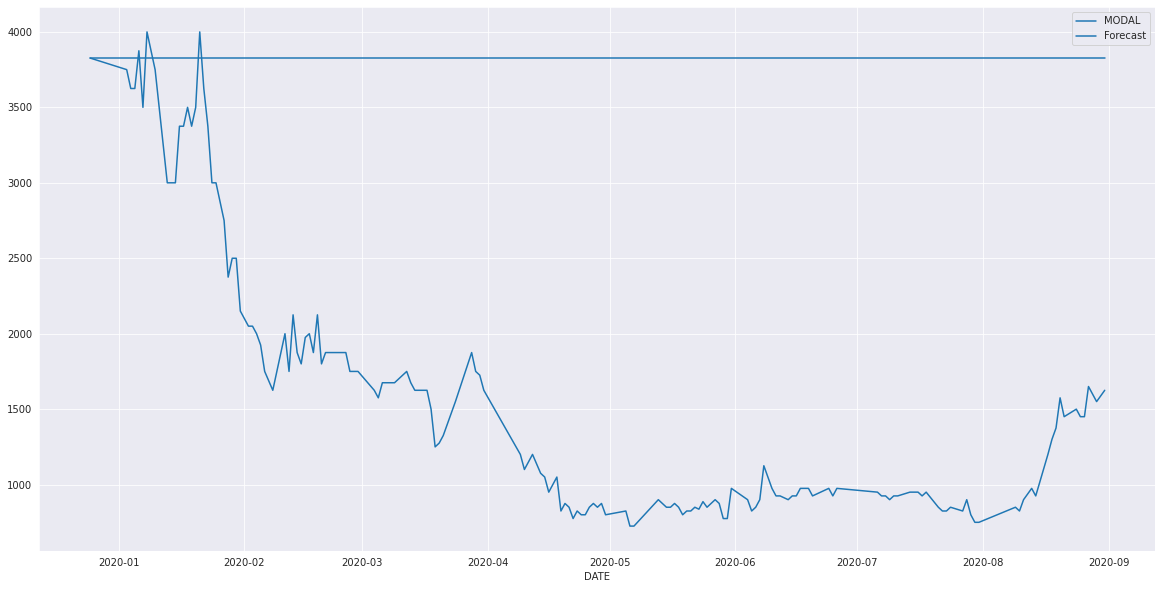

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 78.343576669693
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 1, 2)   Log Likelihood              -21194.706
Date:                           Sat, 17 Oct 2020   AIC                          42413.413
Time:                                   18:56:05   BIC                          42487.810
Sample:                               01-01-2010   HQIC                         42439.911
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1147      0.008     13.977      0.000       0.099       0.131
ar.L2  

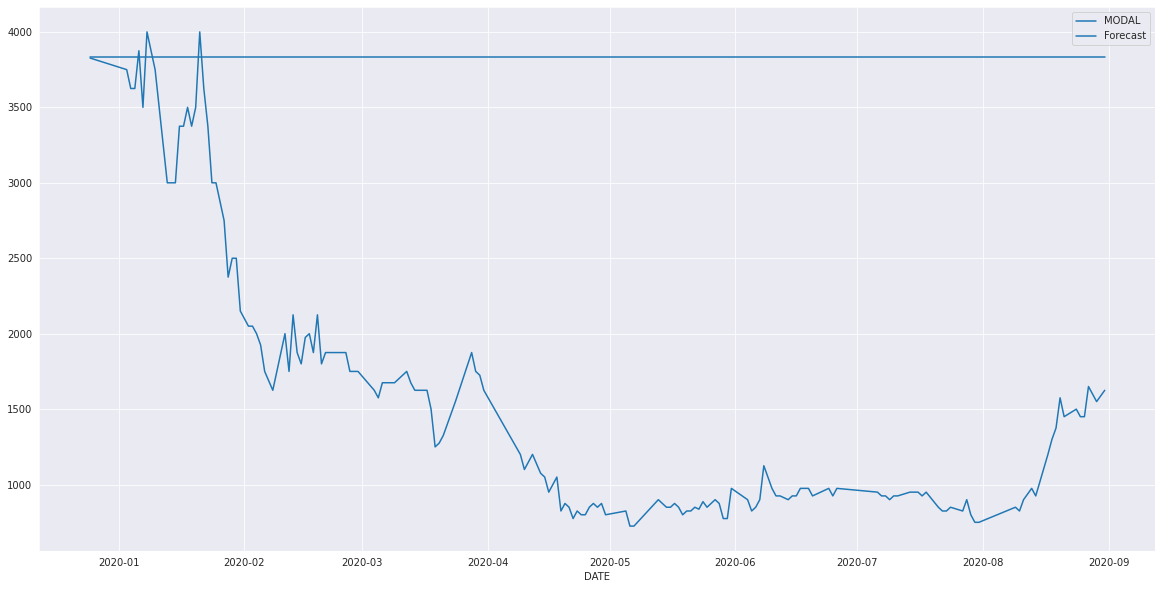

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 228.34861755371094
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 1, 5)   Log Likelihood              -21469.723
Date:                           Sat, 17 Oct 2020   AIC                          42963.447
Time:                                   18:59:54   BIC                          43037.824
Sample:                               01-01-2010   HQIC                         42989.940
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2039      0.043      4.790      0.000       0.120       0.287
ar.L

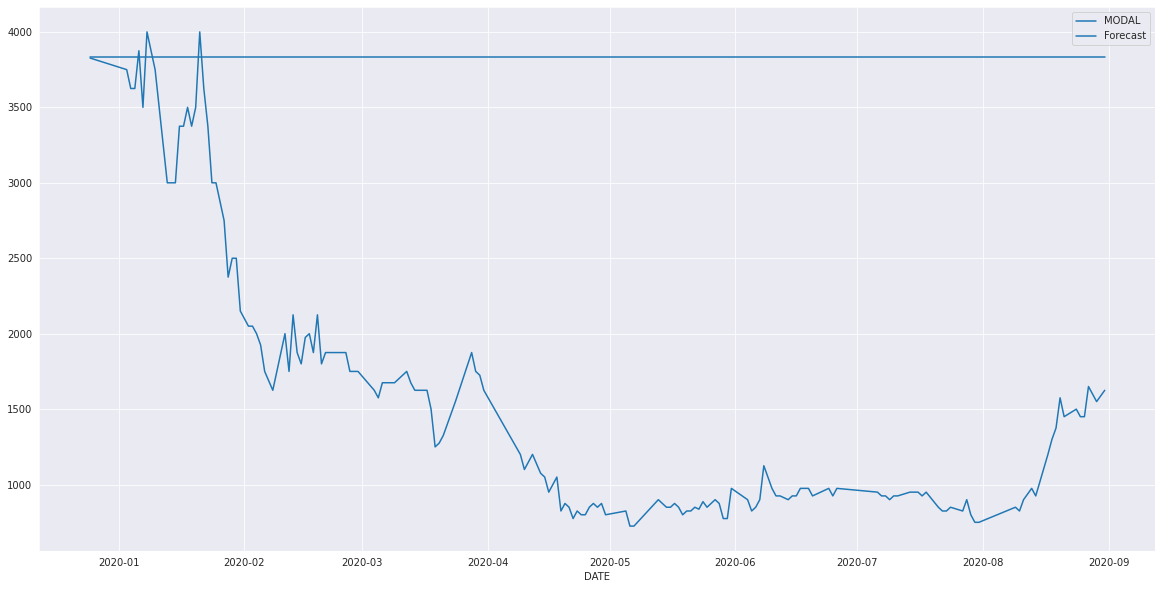

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 251.16484832763672
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 1, 7)   Log Likelihood              -21440.880
Date:                           Sat, 17 Oct 2020   AIC                          42905.760
Time:                                   19:04:06   BIC                          42980.124
Sample:                               01-01-2010   HQIC                         42932.251
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.139      0.750      0.453      -0.168       0.377
ar.L

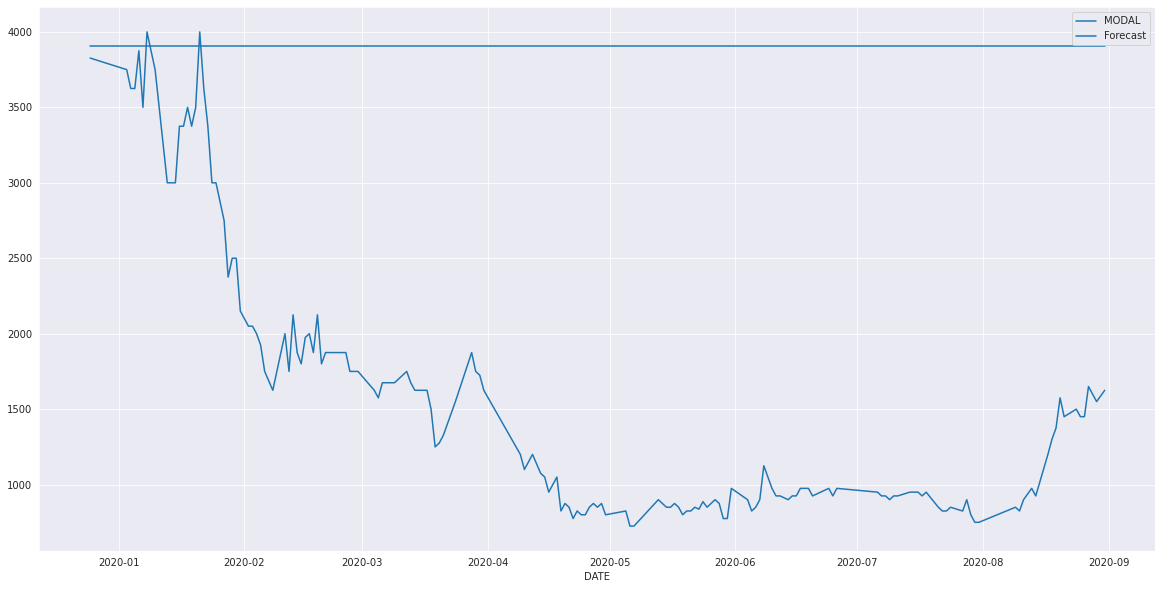

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 21.917962312698364
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 2)   Log Likelihood              -21182.373
Date:                           Sat, 17 Oct 2020   AIC                          42390.746
Time:                                   19:04:29   BIC                          42471.357
Sample:                               01-01-2010   HQIC                         42419.456
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0537      0.148     -0.362      0.717      -0.345       0.237
ar.L

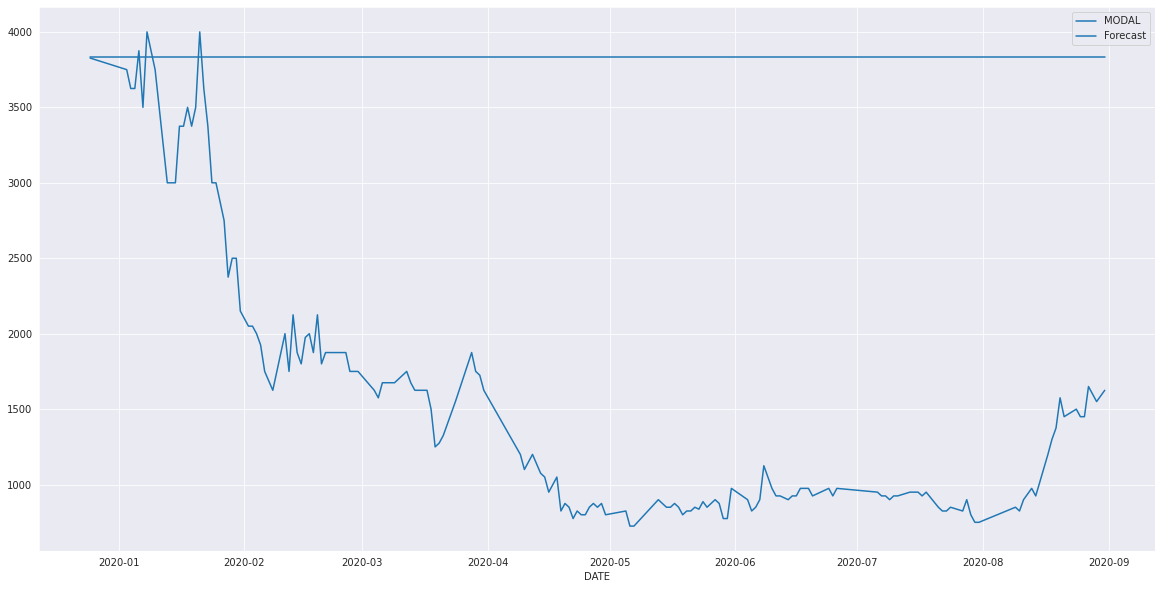

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 53.070701599121094
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 5)   Log Likelihood              -21180.011
Date:                           Sat, 17 Oct 2020   AIC                          42386.022
Time:                                   19:05:23   BIC                          42466.632
Sample:                               01-01-2010   HQIC                         42414.732
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0616      0.040     -1.550      0.121      -0.139       0.016
ar.L

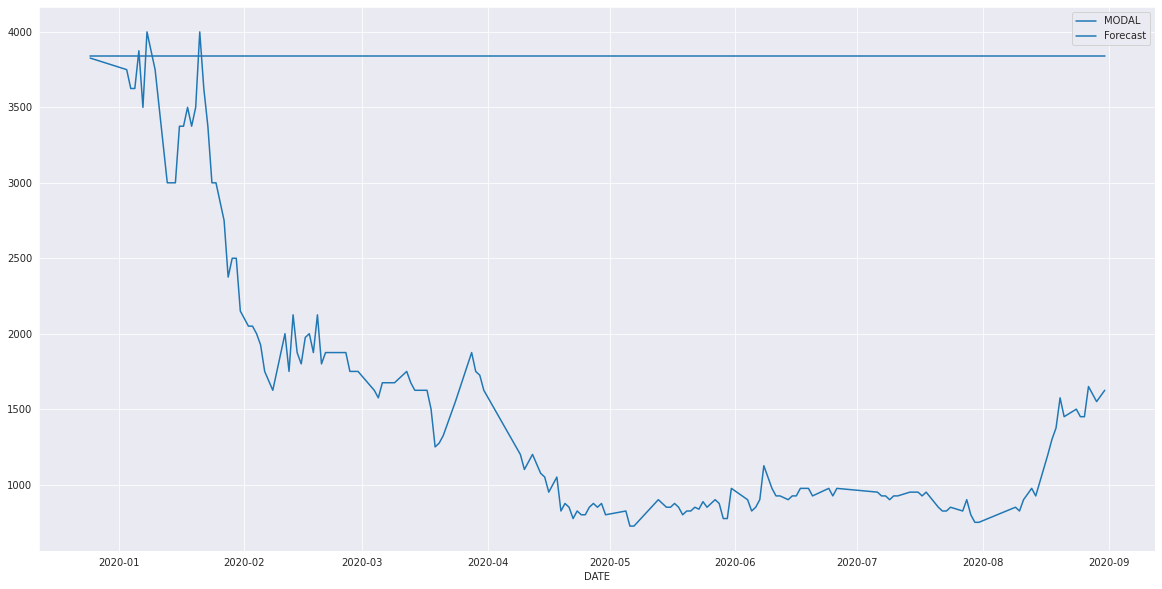

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 83.86231422424316
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 7)   Log Likelihood              -21183.250
Date:                           Sat, 17 Oct 2020   AIC                          42392.501
Time:                                   19:06:47   BIC                          42473.112
Sample:                               01-01-2010   HQIC                         42421.211
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0093      0.052      0.177      0.860      -0.093       0.112
ar.L2

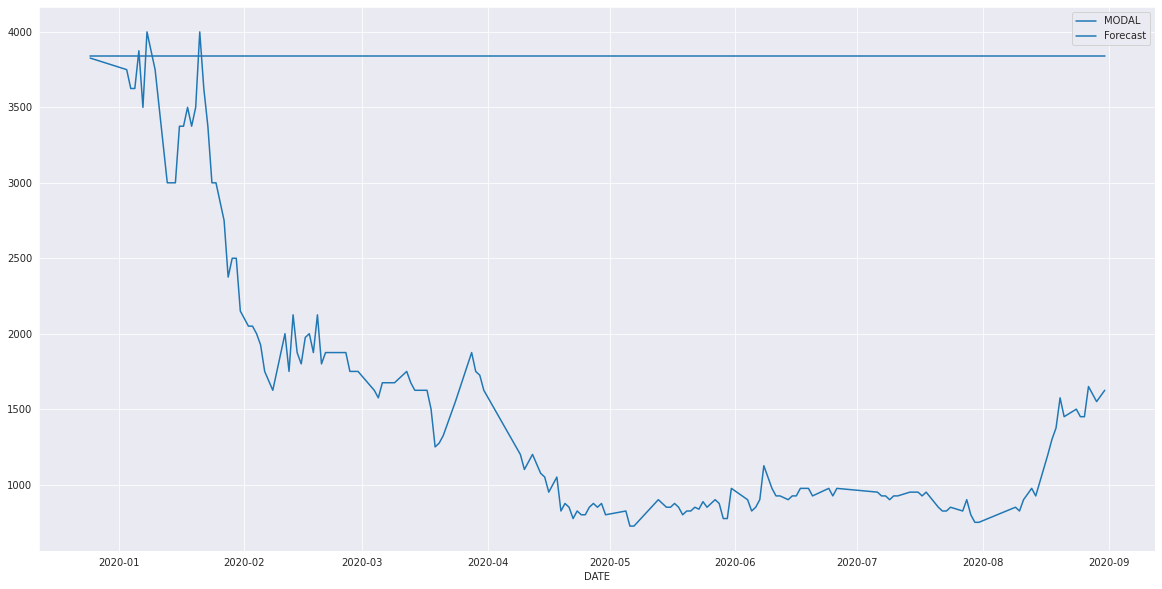

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 75.12082505226135
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 2)   Log Likelihood              -21191.734
Date:                           Sat, 17 Oct 2020   AIC                          42409.468
Time:                                   19:08:03   BIC                          42490.072
Sample:                               01-01-2010   HQIC                         42438.176
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1161      0.008     14.784      0.000       0.101       0.131
ar.L2

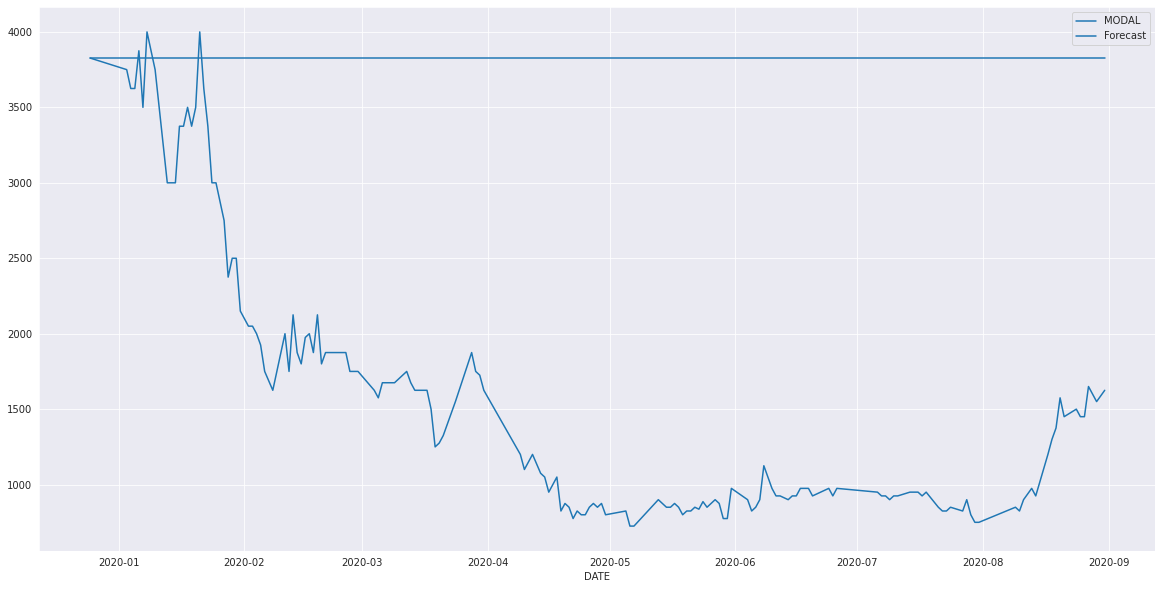

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 131.16014122962952
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 5)   Log Likelihood              -21183.739
Date:                           Sat, 17 Oct 2020   AIC                          42393.479
Time:                                   19:10:15   BIC                          42474.072
Sample:                               01-01-2010   HQIC                         42422.184
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7343      0.023     31.701      0.000       0.689       0.780
ar.L

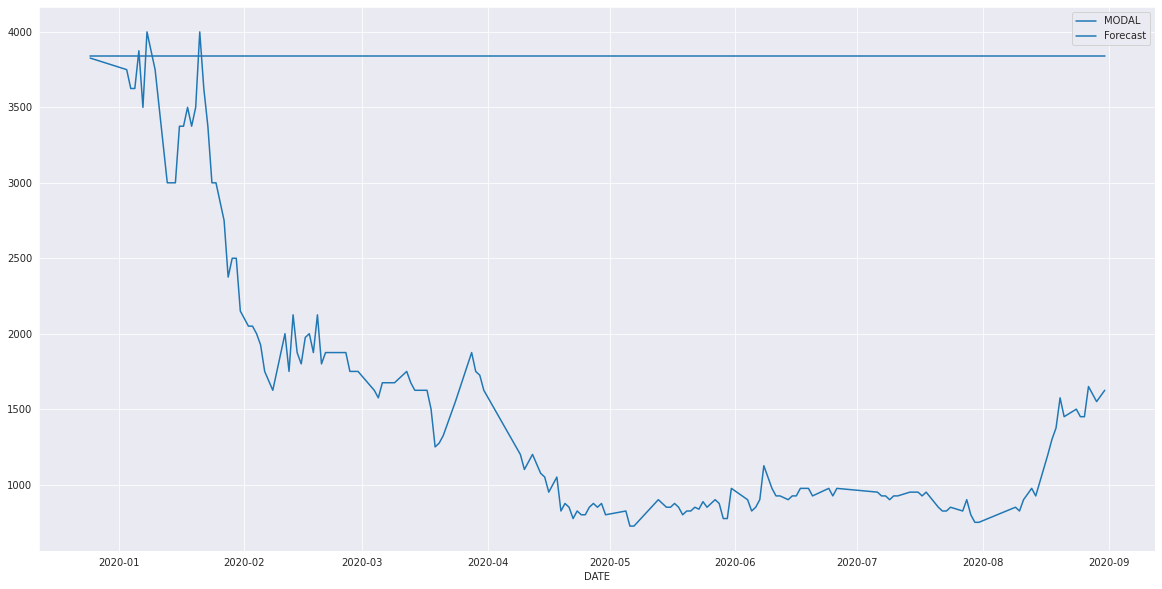

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 180.7779688835144
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 7)   Log Likelihood              -21178.964
Date:                           Sat, 17 Oct 2020   AIC                          42383.928
Time:                                   19:13:16   BIC                          42464.513
Sample:                               01-01-2010   HQIC                         42412.632
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2508      0.108      2.316      0.021       0.039       0.463
ar.L2

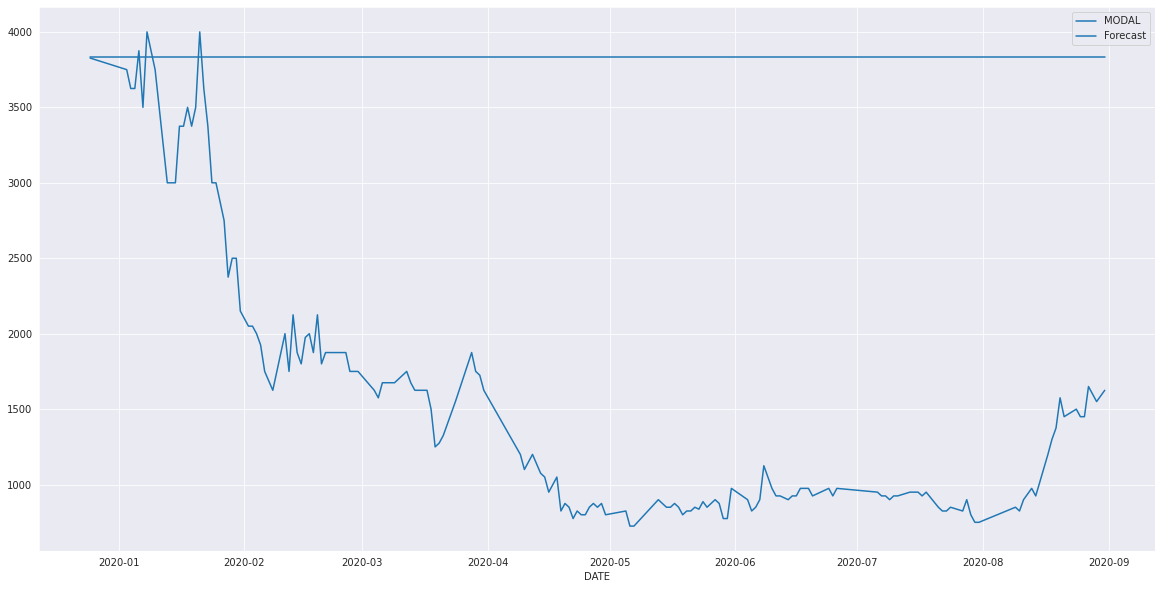

Model Fitting Time: 81.83391642570496
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 2, 2)   Log Likelihood              -21198.245
Date:                           Sat, 17 Oct 2020   AIC                          42422.491
Time:                                   19:14:39   BIC                          42503.087
Sample:                               01-01-2010   HQIC                         42451.198
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1131      0.008     13.973      0.000       0.097       0.129
ar.L2

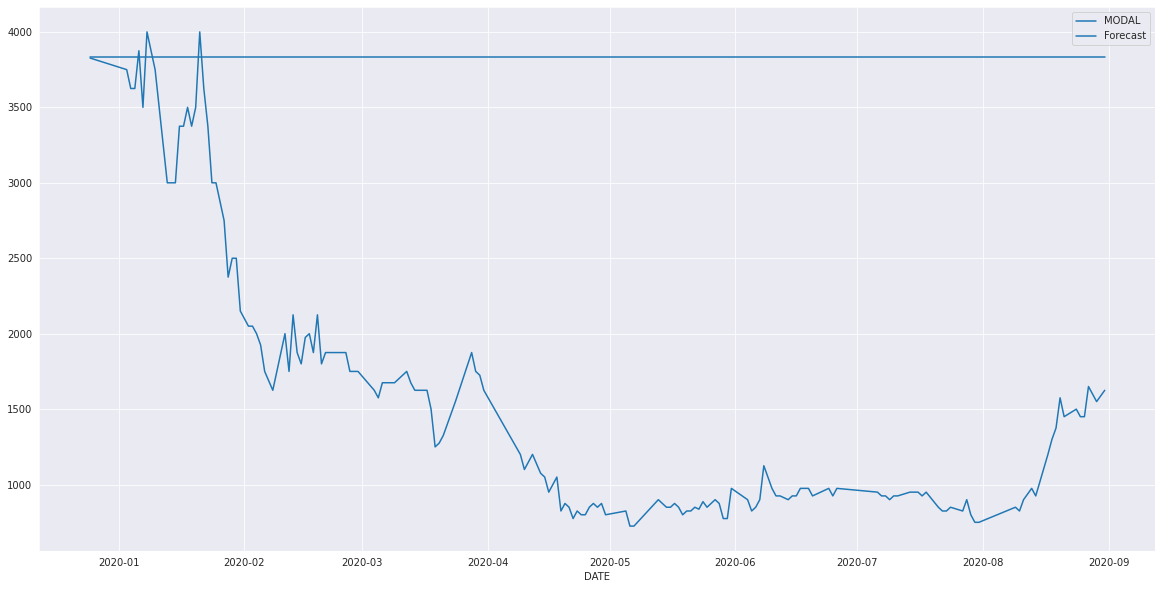

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 194.92457222938538
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 2, 5)   Log Likelihood              -21605.919
Date:                           Sat, 17 Oct 2020   AIC                          43237.838
Time:                                   19:17:54   BIC                          43318.413
Sample:                               01-01-2010   HQIC                         43266.539
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8356      0.010    190.176      0.000       1.817       1.855
ar.L

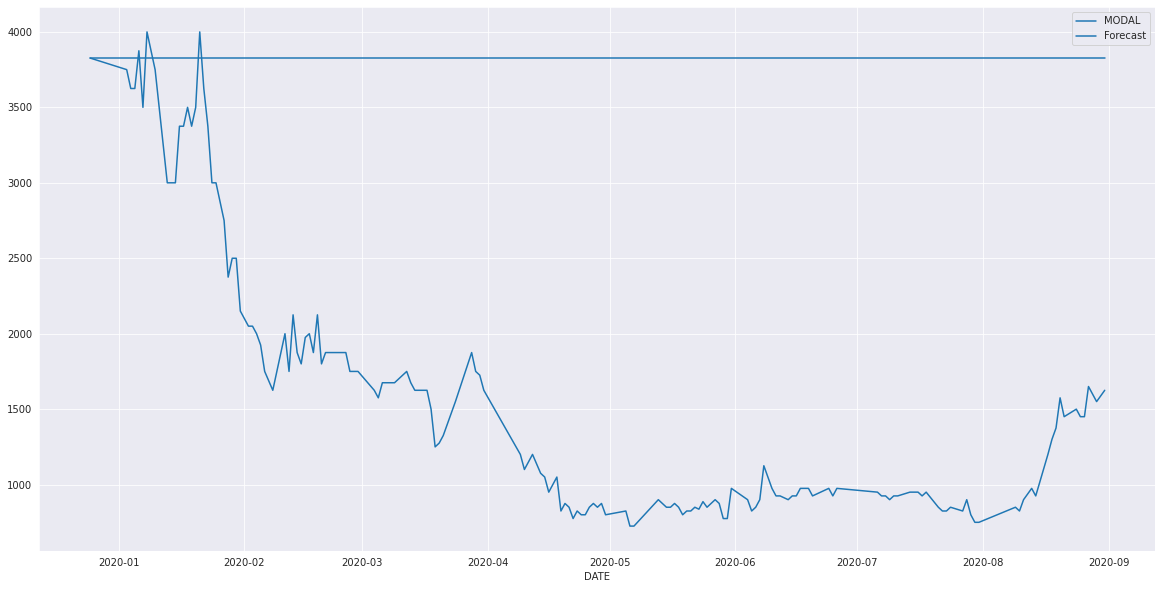

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 255.38751339912415
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(4, 2, 2, 7)   Log Likelihood              -21524.085
Date:                           Sat, 17 Oct 2020   AIC                          43074.169
Time:                                   19:22:10   BIC                          43154.730
Sample:                               01-01-2010   HQIC                         43102.867
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0274      0.596     -1.725      0.085      -2.195       0.140
ar.L

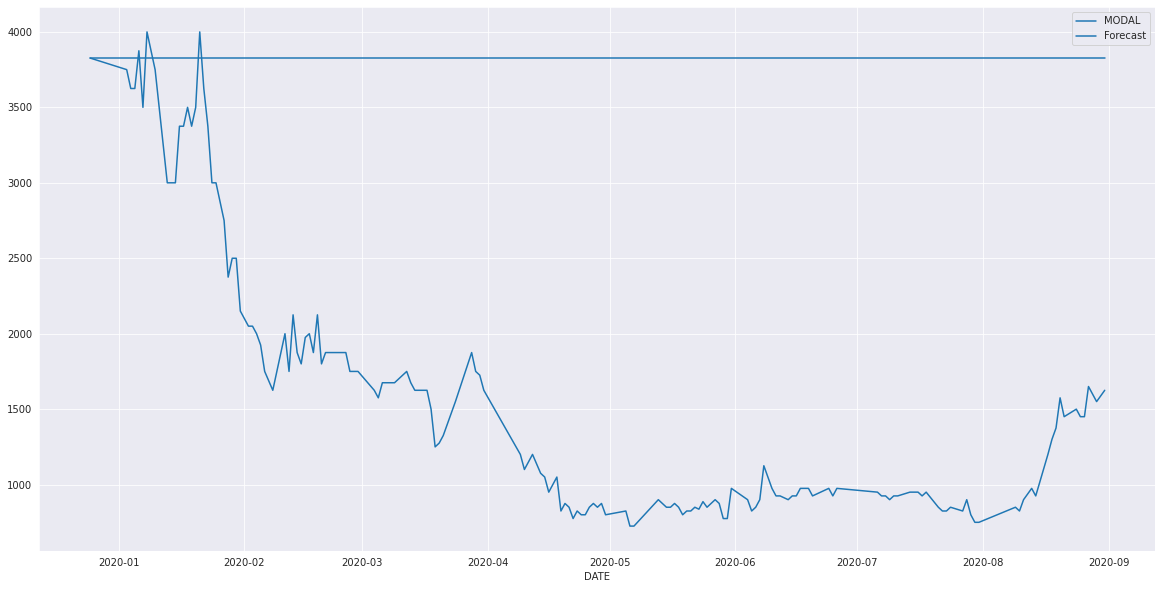

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 19.38642716407776
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 0, 2)   Log Likelihood              -21183.817
Date:                           Sat, 17 Oct 2020   AIC                          42391.634
Time:                                   19:22:31   BIC                          42466.044
Sample:                               01-01-2010   HQIC                         42418.136
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2835      0.053     -5.367      0.000      -0.387      -0.180
ar.L2

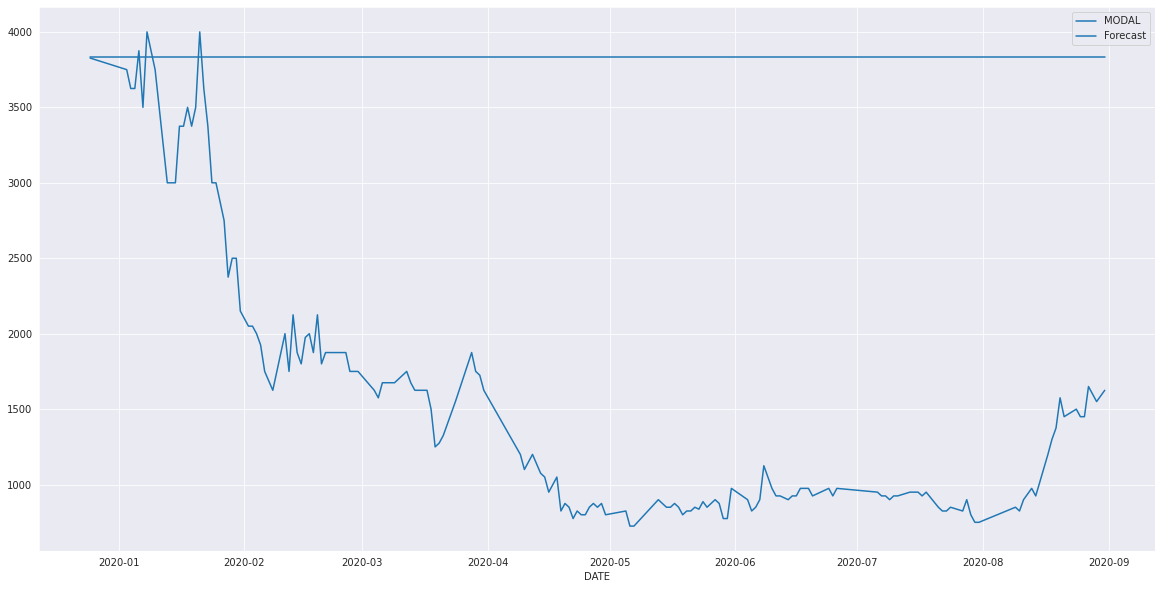

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 57.61489653587341
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 0, 5)   Log Likelihood              -21182.122
Date:                           Sat, 17 Oct 2020   AIC                          42388.245
Time:                                   19:23:29   BIC                          42462.655
Sample:                               01-01-2010   HQIC                         42414.746
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0848      0.037     -2.308      0.021      -0.157      -0.013
ar.L2

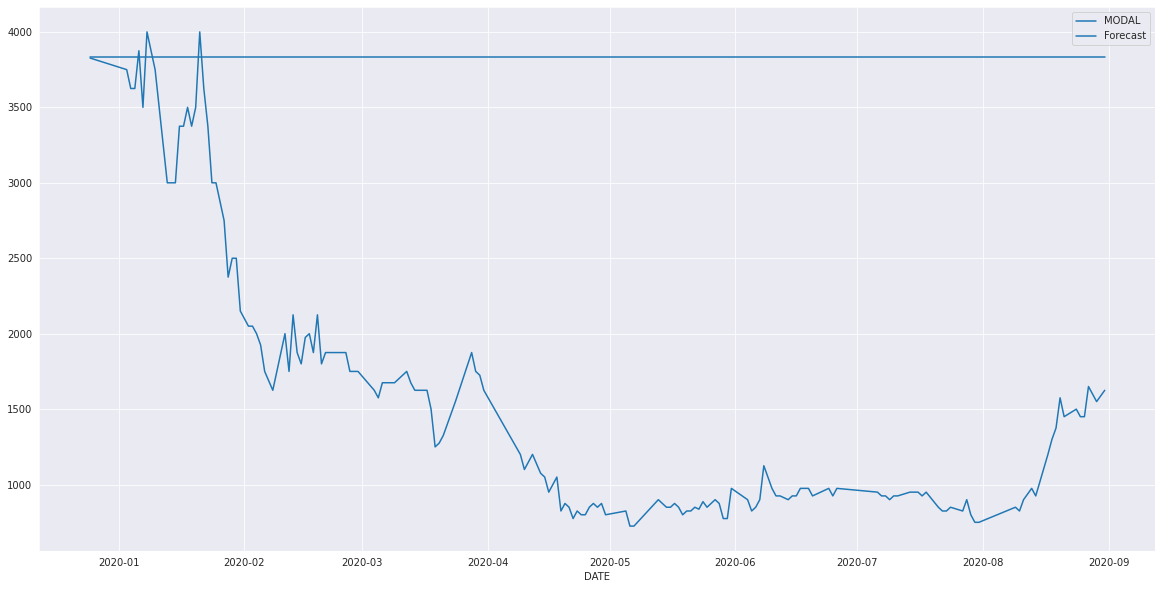

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 73.72222185134888
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 0, 7)   Log Likelihood              -21185.674
Date:                           Sat, 17 Oct 2020   AIC                          42395.347
Time:                                   19:24:43   BIC                          42469.757
Sample:                               01-01-2010   HQIC                         42421.849
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0353      0.046     -0.774      0.439      -0.125       0.054
ar.L2

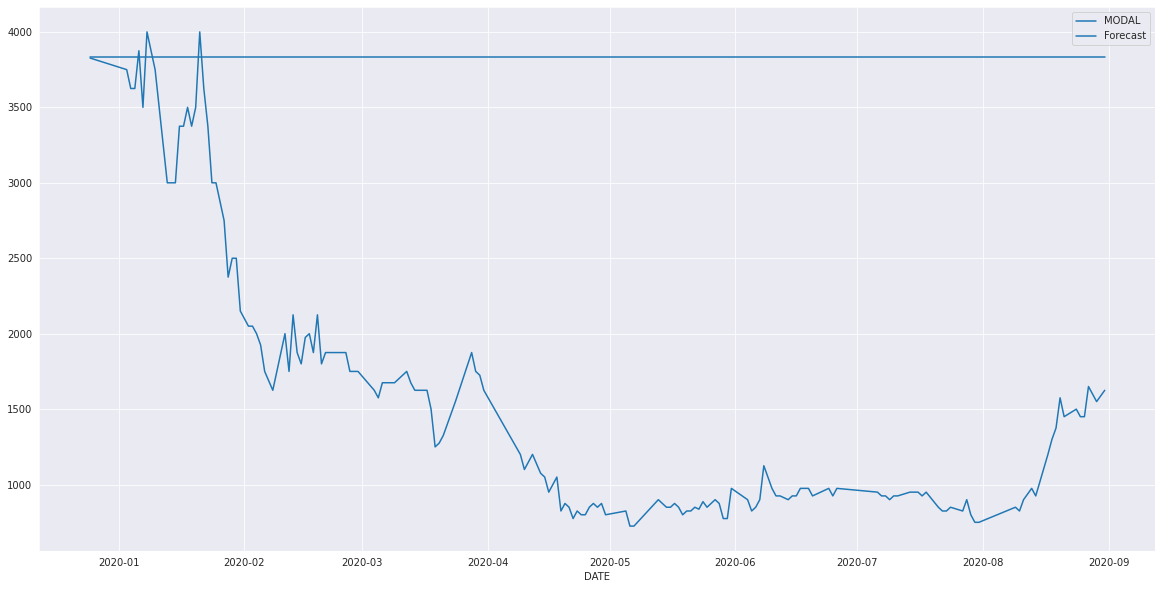

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 54.80934119224548
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 0, 2)   Log Likelihood              -21185.534
Date:                           Sat, 17 Oct 2020   AIC                          42395.068
Time:                                   19:25:39   BIC                          42469.472
Sample:                               01-01-2010   HQIC                         42421.568
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1195      0.008     14.687      0.000       0.104       0.135
ar.L2

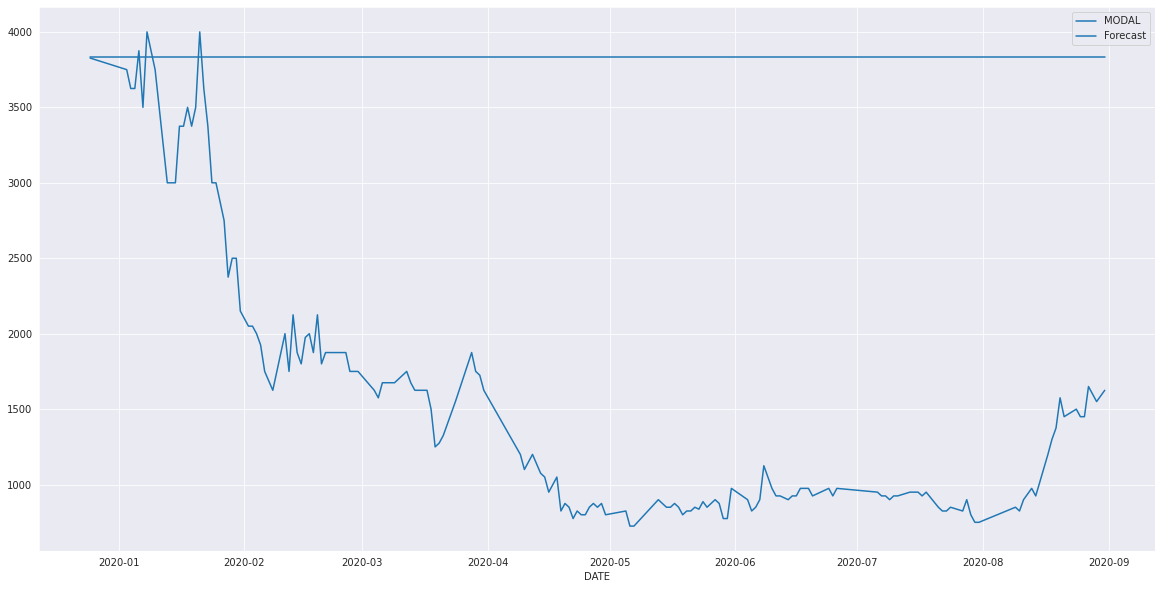

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 135.31545281410217
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 0, 5)   Log Likelihood              -21365.162
Date:                           Sat, 17 Oct 2020   AIC                          42754.325
Time:                                   19:27:55   BIC                          42828.718
Sample:                               01-01-2010   HQIC                         42780.822
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7149      0.009     82.820      0.000       0.698       0.732
ar.L

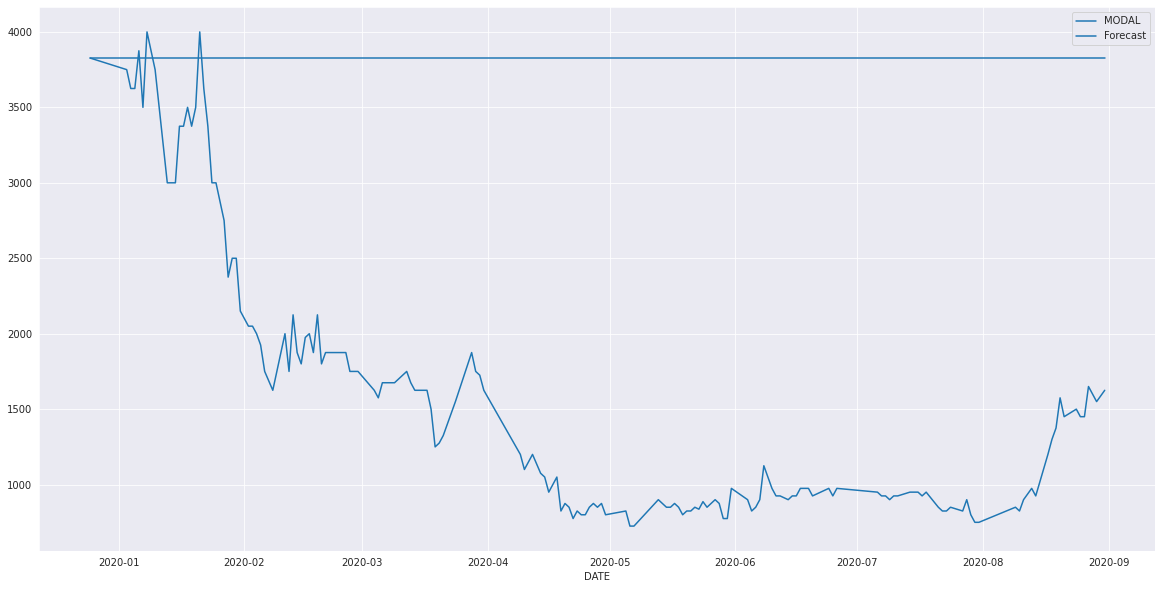

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 238.35726499557495
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 0, 7)   Log Likelihood              -21412.995
Date:                           Sat, 17 Oct 2020   AIC                          42849.991
Time:                                   19:31:54   BIC                          42924.378
Sample:                               01-01-2010   HQIC                         42876.487
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1701      0.030      5.732      0.000       0.112       0.228
ar.L

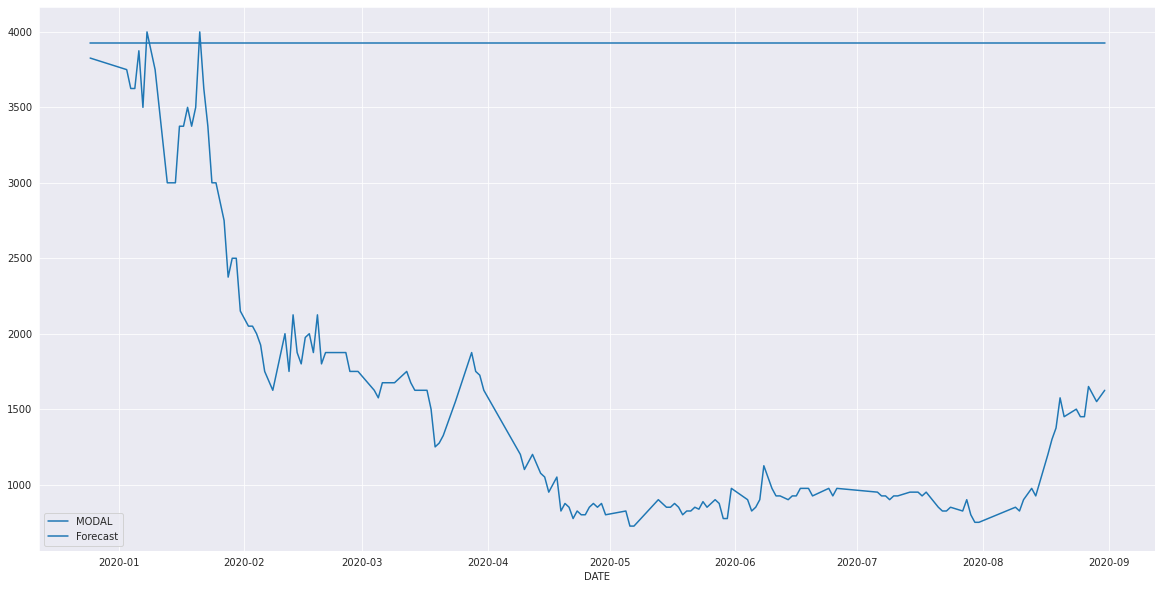

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 69.64587998390198
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 0, 2)   Log Likelihood              -21399.992
Date:                           Sat, 17 Oct 2020   AIC                          42823.983
Time:                                   19:33:05   BIC                          42898.380
Sample:                               01-01-2010   HQIC                         42850.481
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0889      0.007     12.917      0.000       0.075       0.102
ar.L2

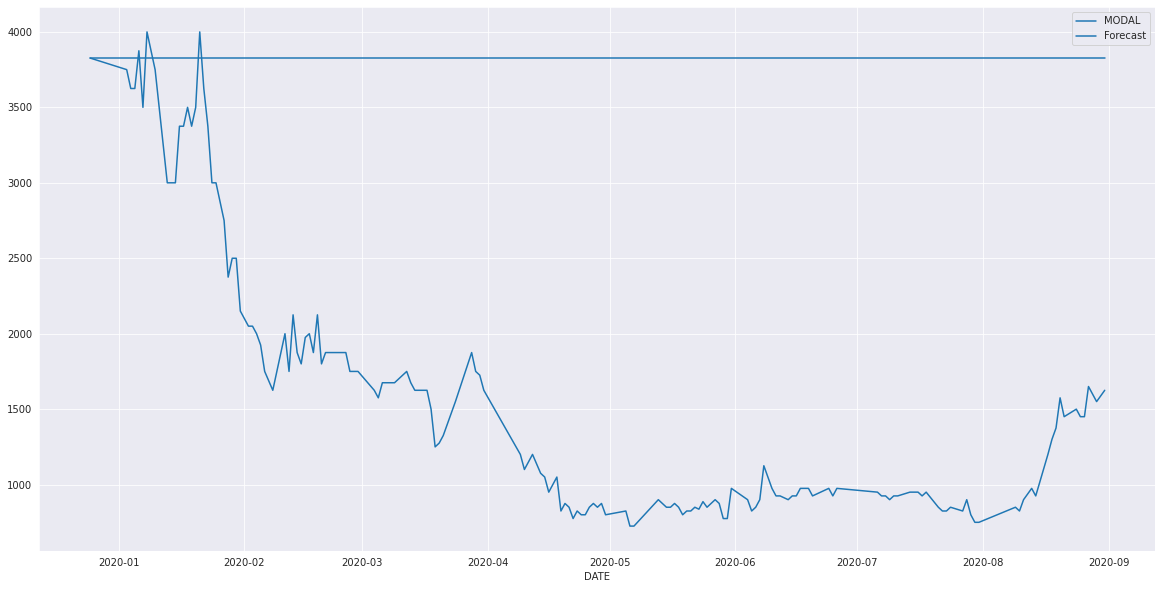

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 189.69096732139587
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 0, 5)   Log Likelihood              -22158.856
Date:                           Sat, 17 Oct 2020   AIC                          44341.713
Time:                                   19:36:15   BIC                          44416.090
Sample:                               01-01-2010   HQIC                         44368.207
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6229      0.009     69.127      0.000       0.605       0.641
ar.L

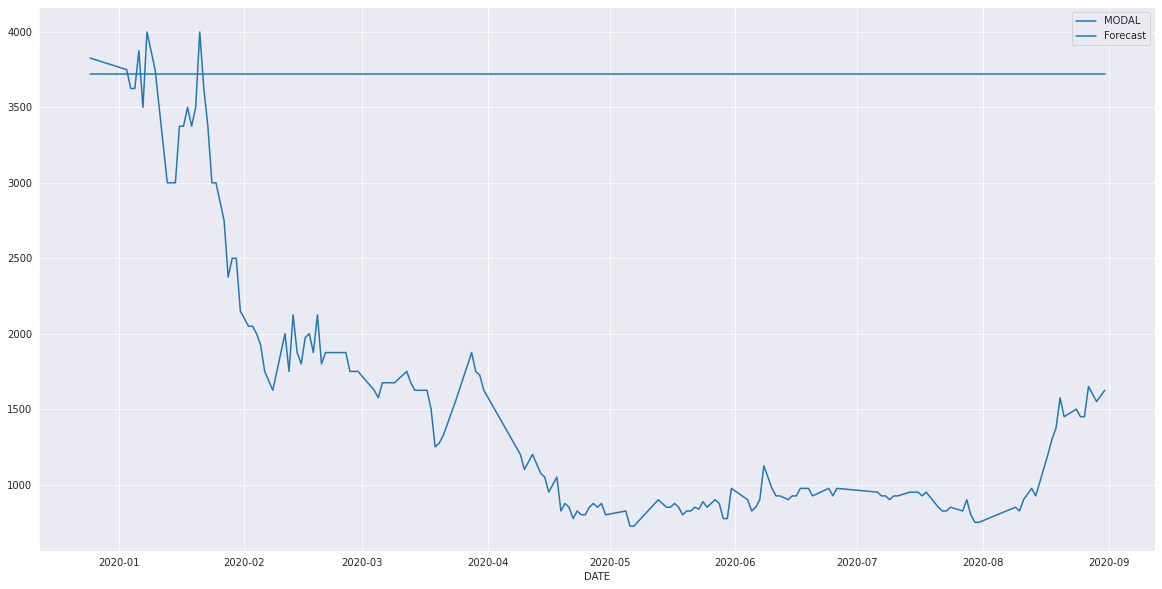

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 214.0126142501831
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 0, 7)   Log Likelihood              -22036.039
Date:                           Sat, 17 Oct 2020   AIC                          44096.078
Time:                                   19:39:50   BIC                          44170.442
Sample:                               01-01-2010   HQIC                         44122.568
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7057      0.010   -173.233      0.000      -1.725      -1.686
ar.L2

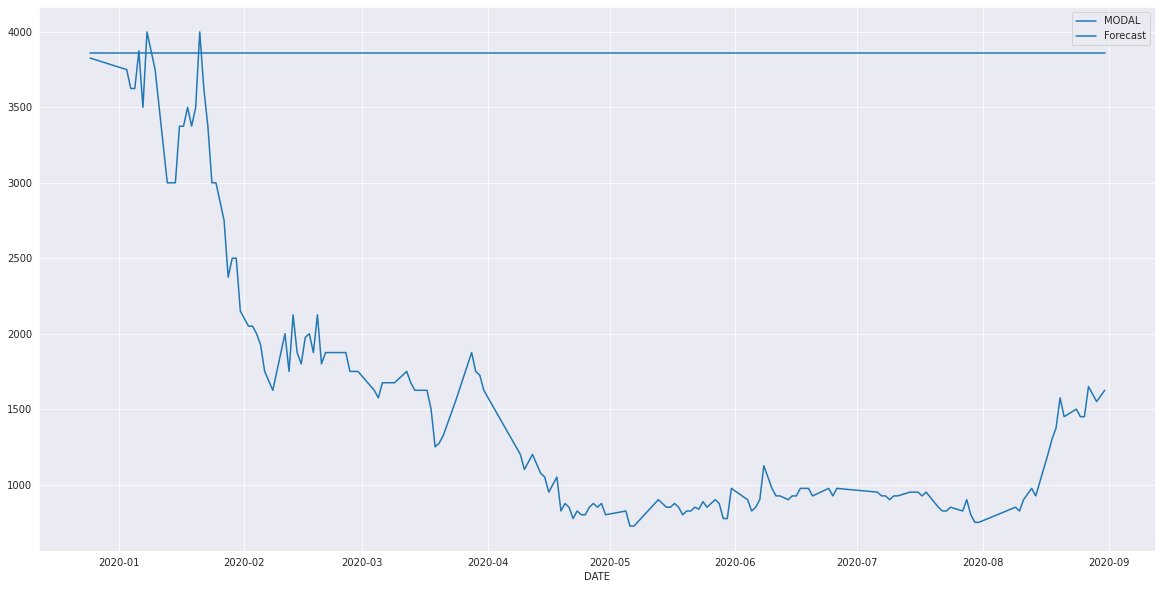

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 27.842758417129517
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 1, 2)   Log Likelihood              -21181.597
Date:                           Sat, 17 Oct 2020   AIC                          42389.194
Time:                                   19:40:19   BIC                          42469.805
Sample:                               01-01-2010   HQIC                         42417.905
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3362      0.093     -3.604      0.000      -0.519      -0.153
ar.L

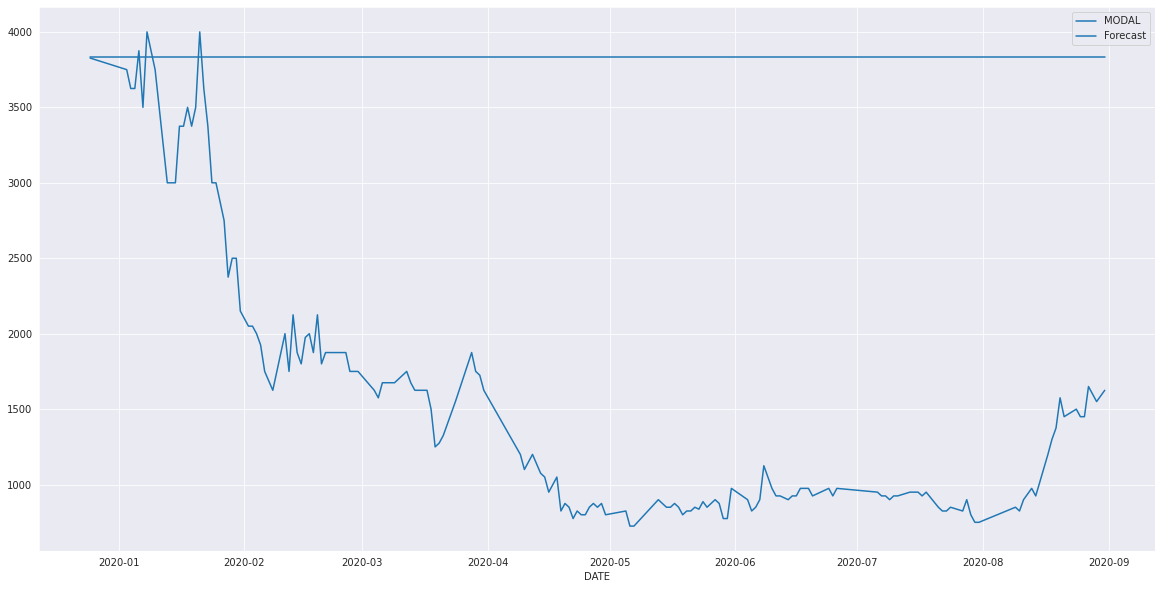

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 51.3961980342865
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 1, 5)   Log Likelihood              -21182.118
Date:                           Sat, 17 Oct 2020   AIC                          42390.236
Time:                                   19:41:11   BIC                          42470.847
Sample:                               01-01-2010   HQIC                         42418.946
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0853      0.037     -2.322      0.020      -0.157      -0.013
ar.L2 

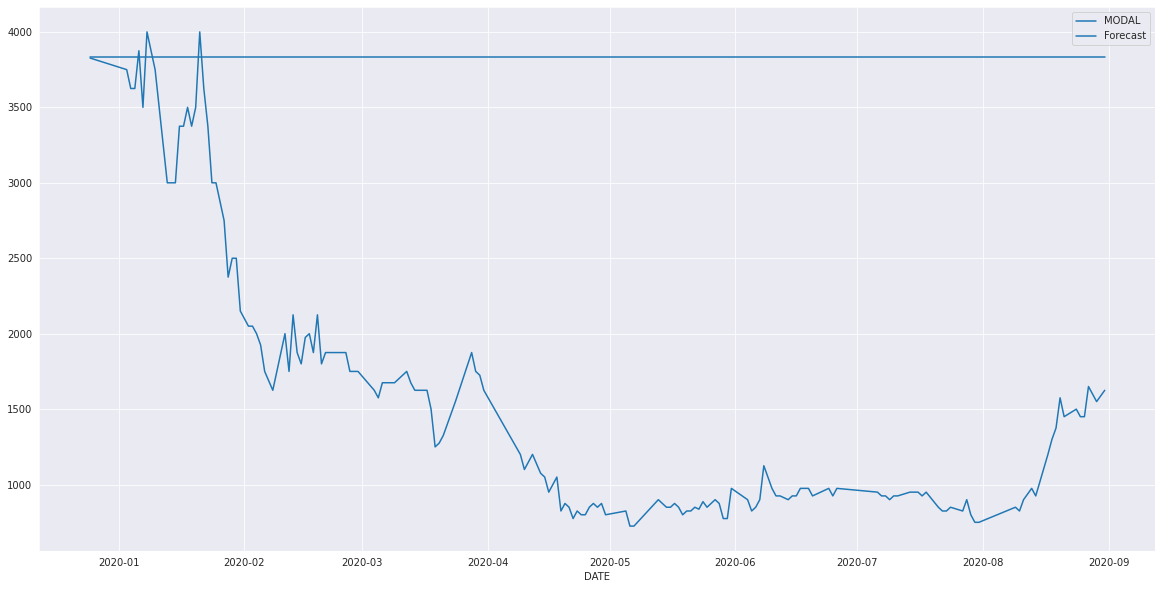

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 121.86815810203552
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 1, 7)   Log Likelihood              -21180.109
Date:                           Sat, 17 Oct 2020   AIC                          42386.218
Time:                                   19:43:14   BIC                          42466.829
Sample:                               01-01-2010   HQIC                         42414.928
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0505      0.045     -1.112      0.266      -0.140       0.038
ar.L

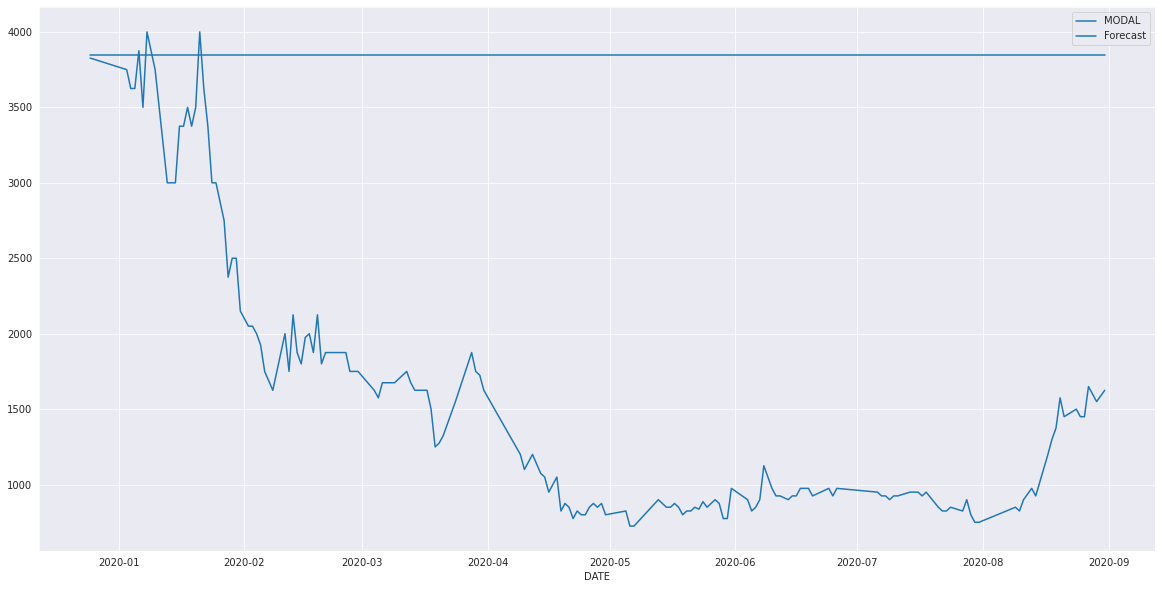

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 55.8636679649353
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 1, 2)   Log Likelihood              -21188.155
Date:                           Sat, 17 Oct 2020   AIC                          42402.311
Time:                                   19:44:10   BIC                          42482.914
Sample:                               01-01-2010   HQIC                         42431.019
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1126      0.009     12.773      0.000       0.095       0.130
ar.L2 

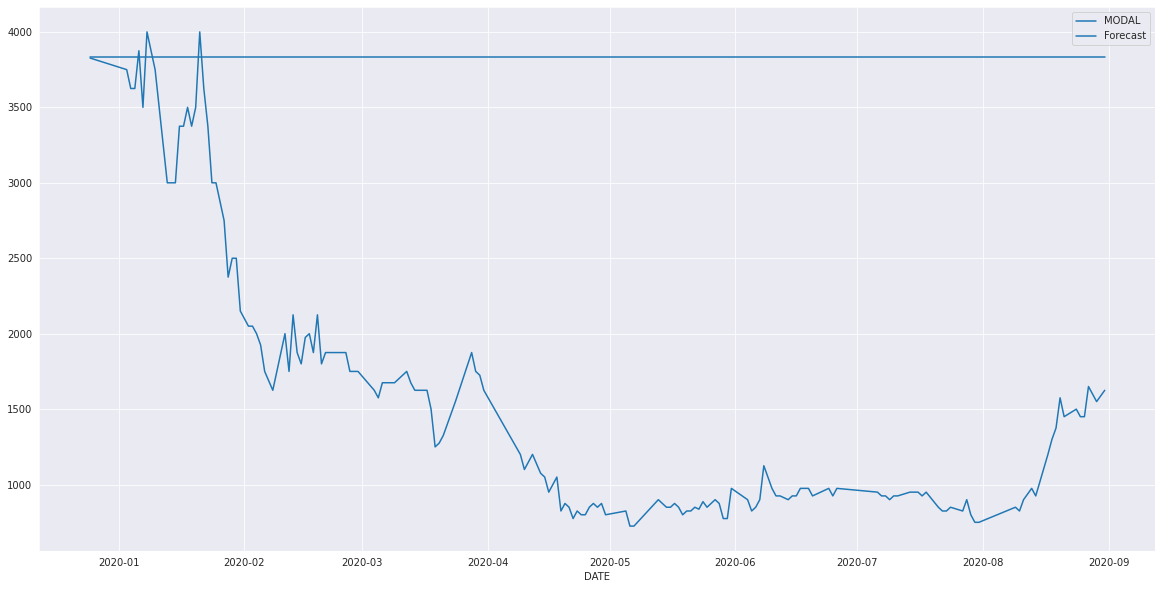

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 183.56503534317017
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 1, 5)   Log Likelihood              -21188.514
Date:                           Sat, 17 Oct 2020   AIC                          42403.028
Time:                                   19:47:14   BIC                          42483.621
Sample:                               01-01-2010   HQIC                         42431.734
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6550      0.012    132.724      0.000       1.631       1.679
ar.L

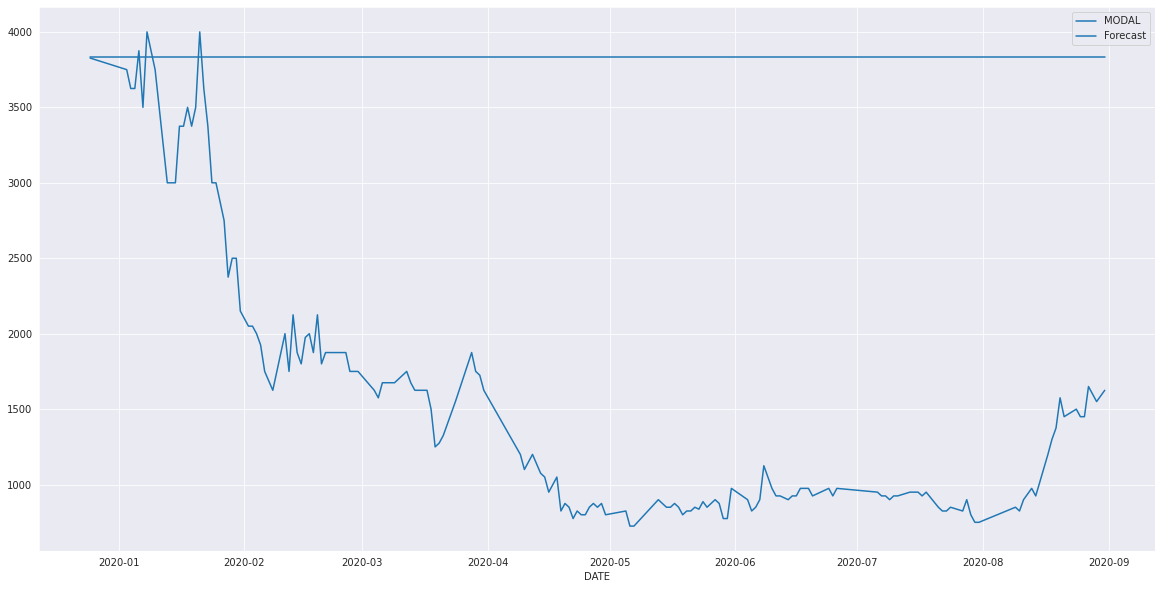

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 250.6761281490326
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 1, 7)   Log Likelihood              -21176.775
Date:                           Sat, 17 Oct 2020   AIC                          42379.551
Time:                                   19:51:26   BIC                          42460.136
Sample:                               01-01-2010   HQIC                         42408.255
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1752      0.031      5.670      0.000       0.115       0.236
ar.L2

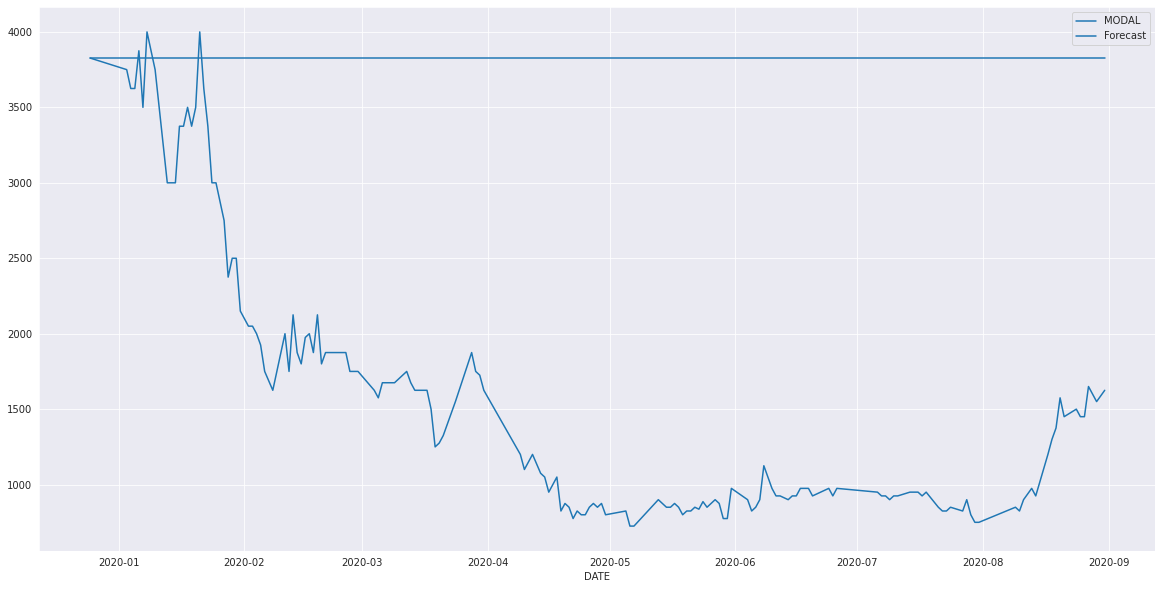

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 66.48241543769836
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 1, 2)   Log Likelihood              -21202.966
Date:                           Sat, 17 Oct 2020   AIC                          42431.932
Time:                                   19:52:33   BIC                          42512.528
Sample:                               01-01-2010   HQIC                         42460.638
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1048      0.009     11.499      0.000       0.087       0.123
ar.L2

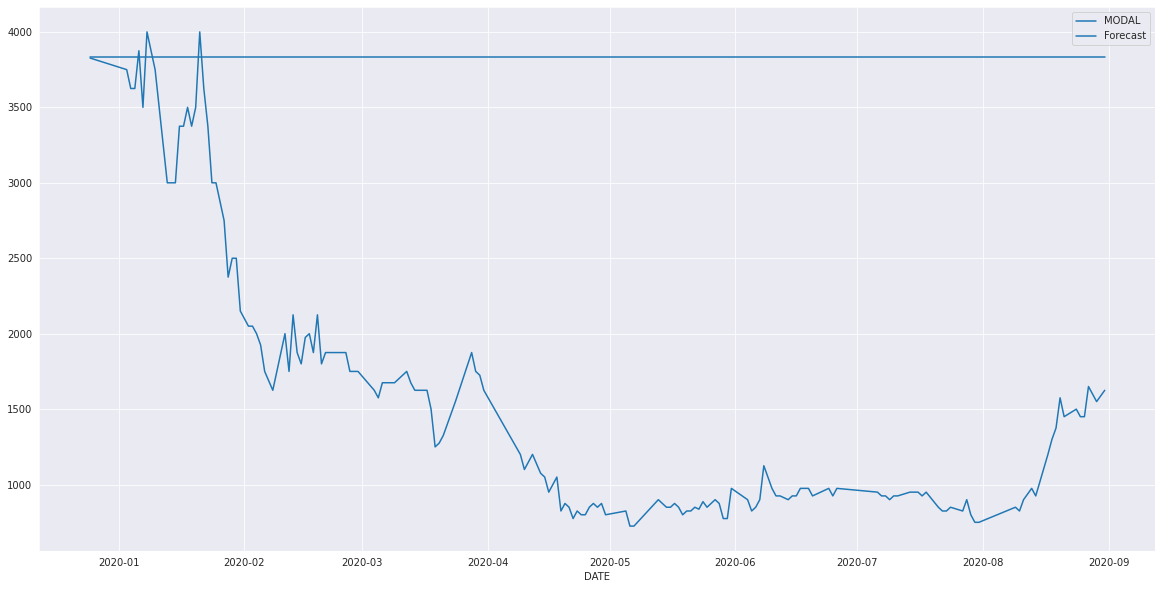

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 182.23971962928772
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 1, 5)   Log Likelihood              -21468.168
Date:                           Sat, 17 Oct 2020   AIC                          42962.336
Time:                                   19:55:36   BIC                          43042.911
Sample:                               01-01-2010   HQIC                         42991.038
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0893      0.017    124.812      0.000       2.057       2.122
ar.L

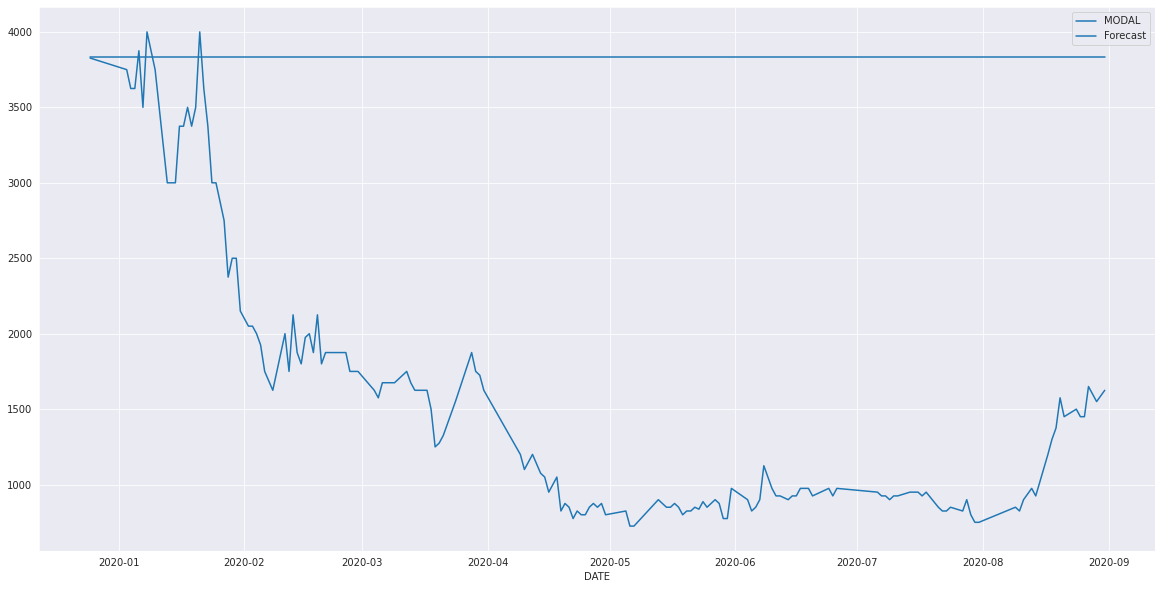

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 300.39908599853516
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 1, 7)   Log Likelihood              -21434.723
Date:                           Sat, 17 Oct 2020   AIC                          42895.445
Time:                                   20:00:37   BIC                          42976.006
Sample:                               01-01-2010   HQIC                         42924.143
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2181      3.812     -0.057      0.954      -7.690       7.253
ar.L

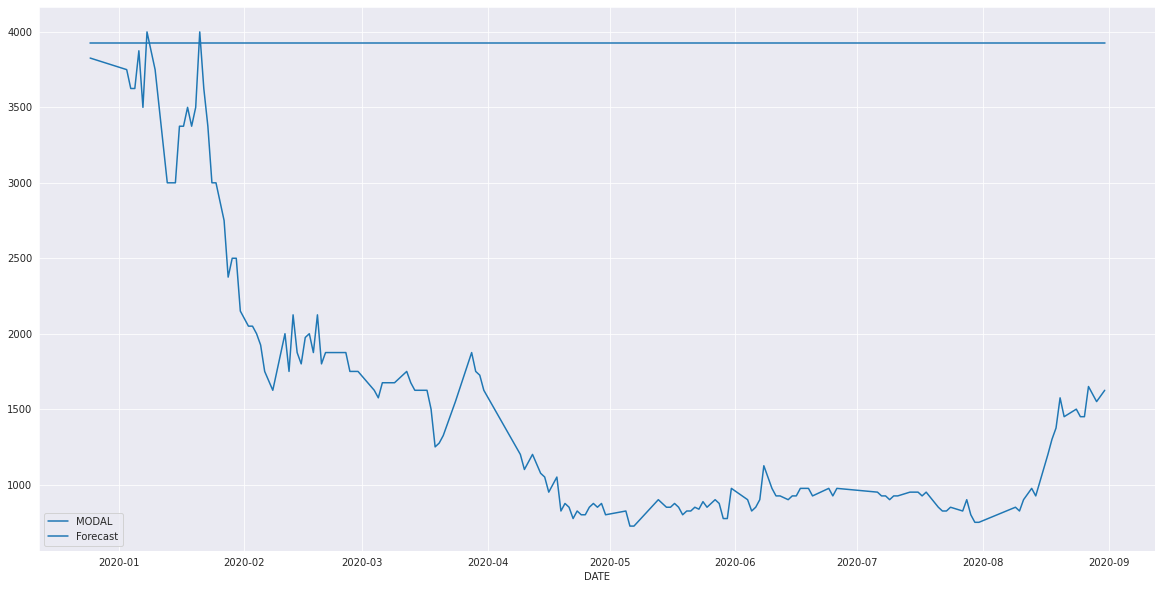

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 24.32531213760376
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 2, 2)   Log Likelihood              -21181.765
Date:                           Sat, 17 Oct 2020   AIC                          42391.531
Time:                                   20:01:03   BIC                          42478.342
Sample:                               01-01-2010   HQIC                         42422.449
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0794      0.168     -0.471      0.638      -0.409       0.251
ar.L2

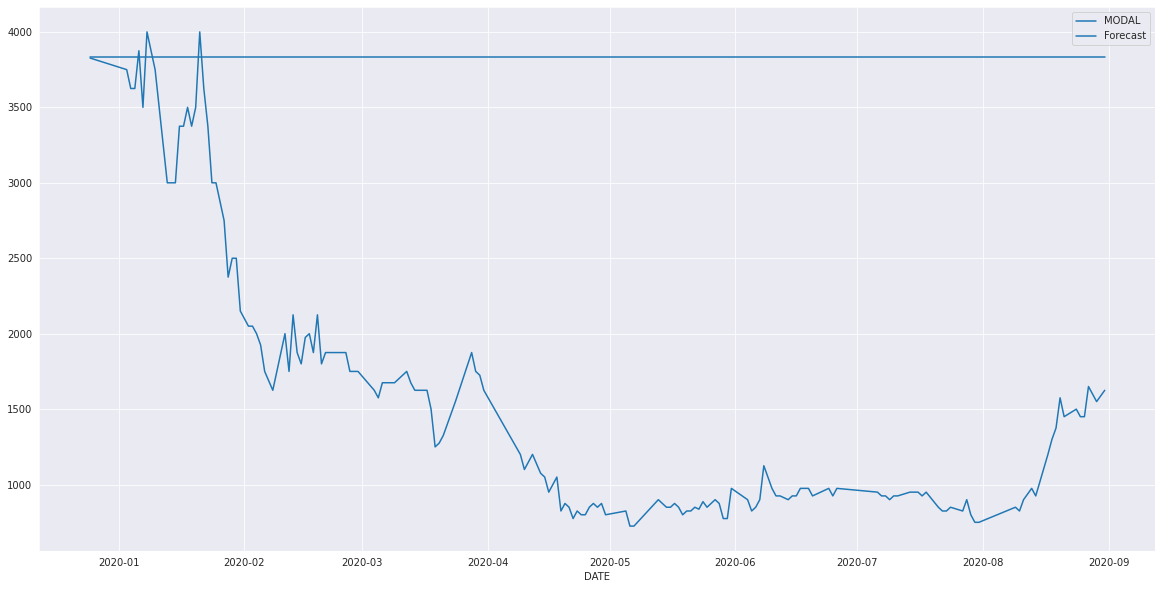

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 74.08095097541809
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 2, 5)   Log Likelihood              -21180.365
Date:                           Sat, 17 Oct 2020   AIC                          42388.731
Time:                                   20:02:17   BIC                          42475.542
Sample:                               01-01-2010   HQIC                         42419.649
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1049      0.031     -3.437      0.001      -0.165      -0.045
ar.L2

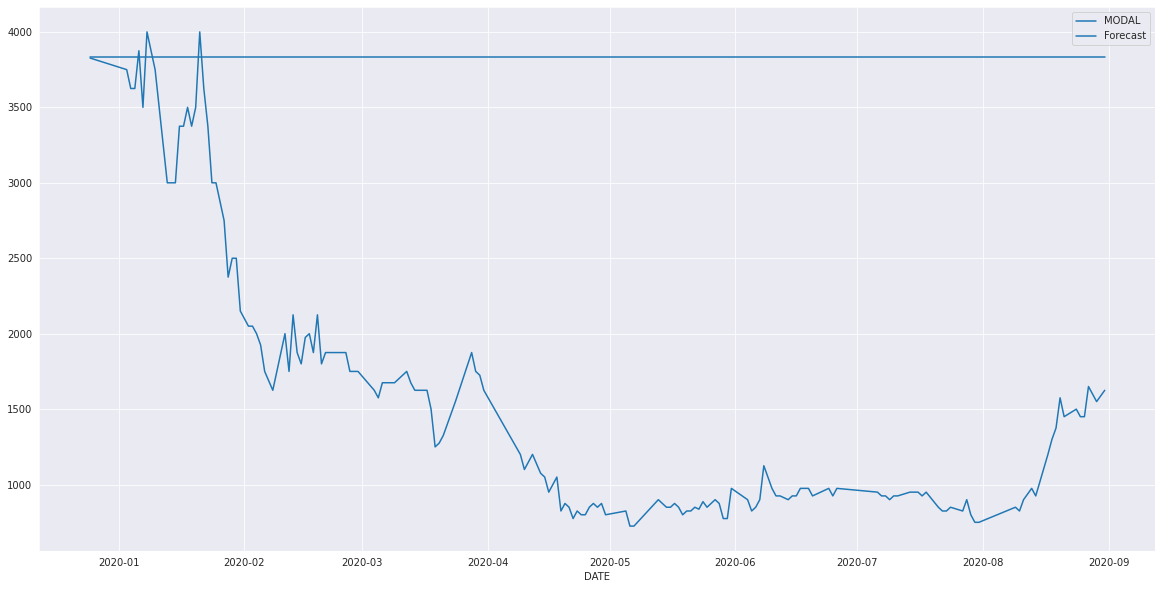

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 81.19928050041199
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 0, 2, 7)   Log Likelihood              -21185.505
Date:                           Sat, 17 Oct 2020   AIC                          42399.011
Time:                                   20:03:39   BIC                          42485.822
Sample:                               01-01-2010   HQIC                         42429.929
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0239      0.049     -0.490      0.624      -0.120       0.072
ar.L2

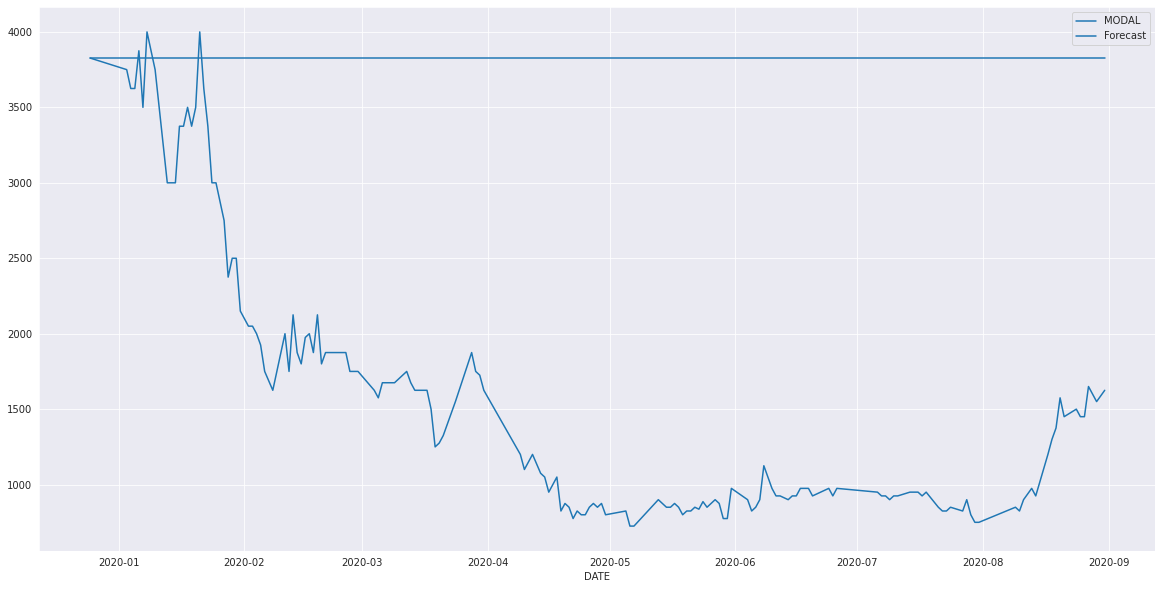

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 61.82735300064087
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 2, 2)   Log Likelihood              -21189.995
Date:                           Sat, 17 Oct 2020   AIC                          42407.989
Time:                                   20:04:42   BIC                          42494.793
Sample:                               01-01-2010   HQIC                         42438.906
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1184      0.009     13.250      0.000       0.101       0.136
ar.L2

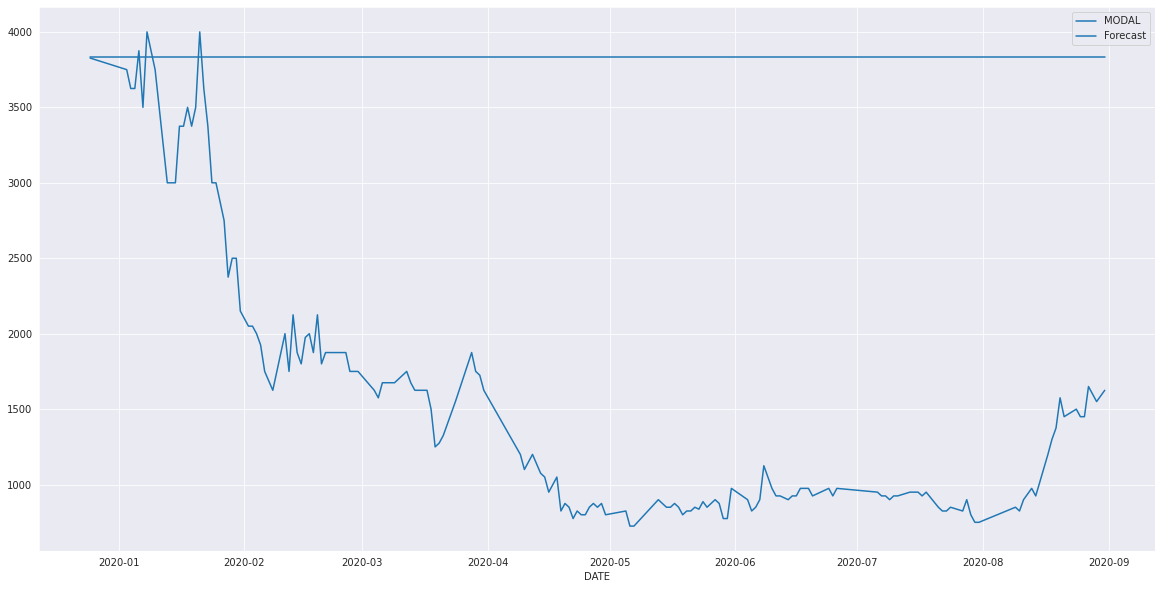

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 198.36862230300903
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 2, 5)   Log Likelihood              -21187.906
Date:                           Sat, 17 Oct 2020   AIC                          42403.812
Time:                                   20:08:01   BIC                          42490.604
Sample:                               01-01-2010   HQIC                         42434.725
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2327      0.034     36.563      0.000       1.167       1.299
ar.L

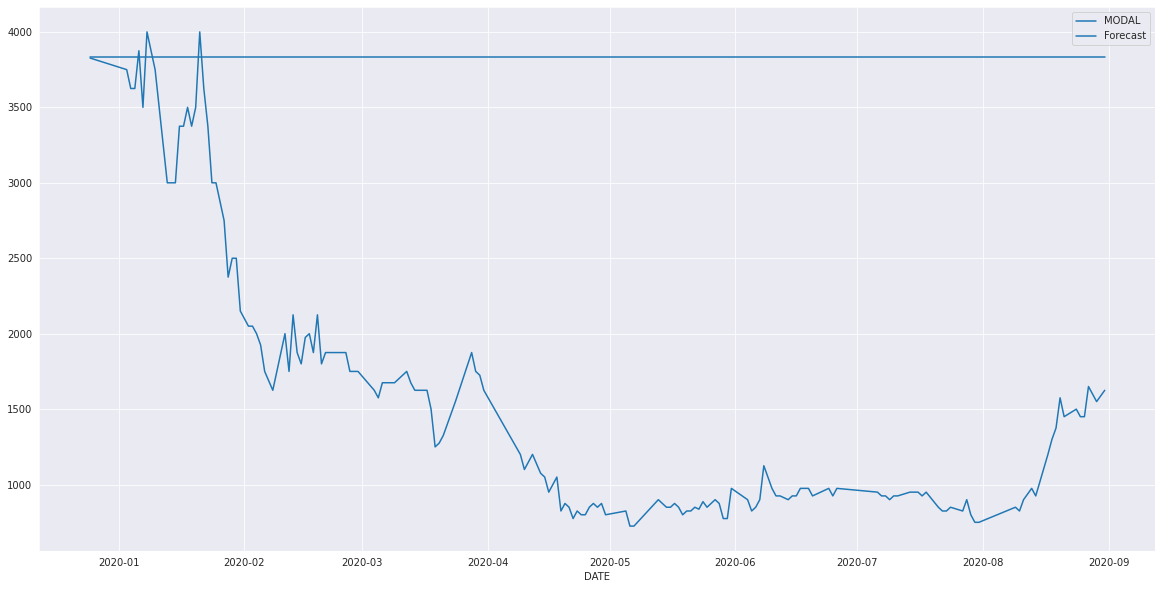

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 286.6336271762848
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 1, 2, 7)   Log Likelihood              -21176.394
Date:                           Sat, 17 Oct 2020   AIC                          42380.789
Time:                                   20:12:48   BIC                          42467.574
Sample:                               01-01-2010   HQIC                         42411.701
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1895      0.034      5.615      0.000       0.123       0.256
ar.L2

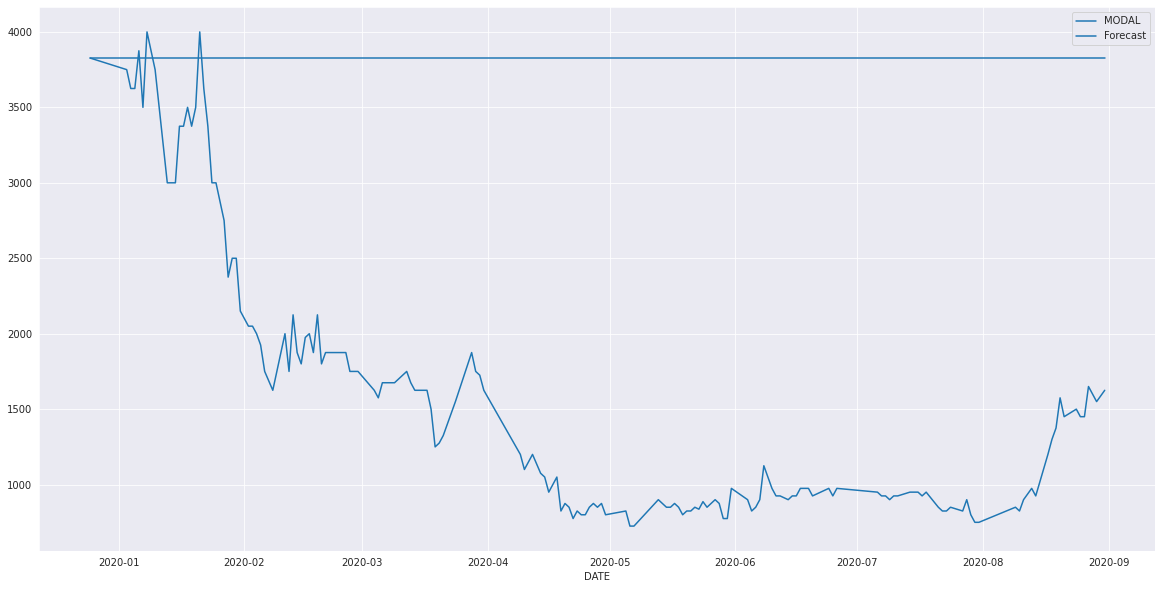

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 85.45687747001648
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 2, 2)   Log Likelihood              -21195.898
Date:                           Sat, 17 Oct 2020   AIC                          42419.797
Time:                                   20:14:15   BIC                          42506.593
Sample:                               01-01-2010   HQIC                         42450.712
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1175      0.008     14.103      0.000       0.101       0.134
ar.L2

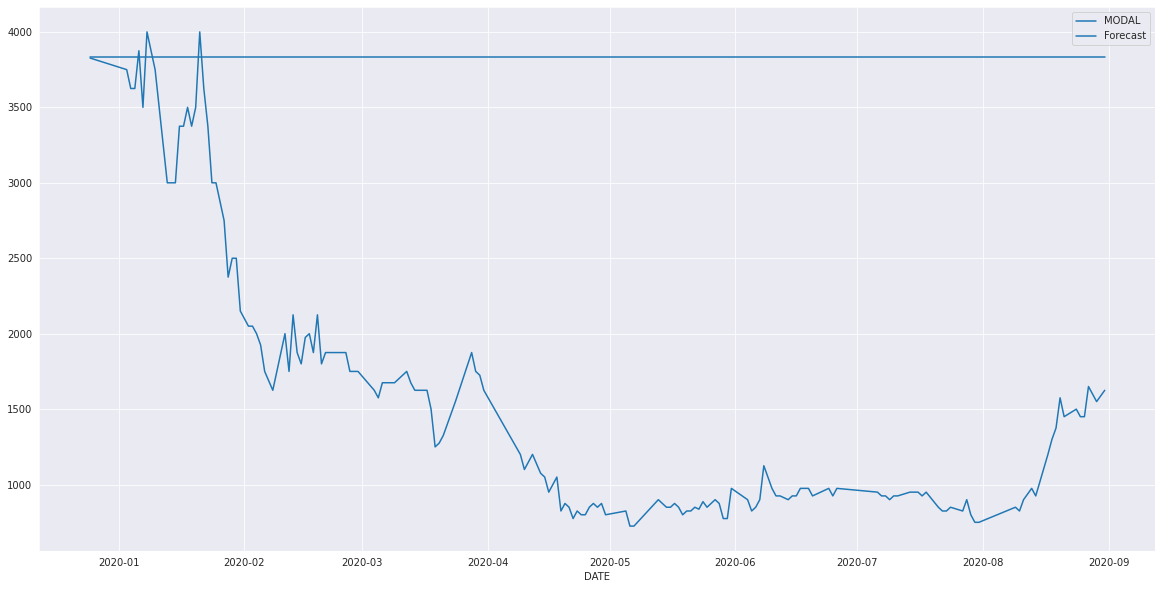

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 255.49616646766663
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 2, 5)   Log Likelihood              -21517.619
Date:                           Sat, 17 Oct 2020   AIC                          43063.238
Time:                                   20:18:31   BIC                          43150.011
Sample:                               01-01-2010   HQIC                         43094.147
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0828      0.018    118.359      0.000       2.048       2.117
ar.L

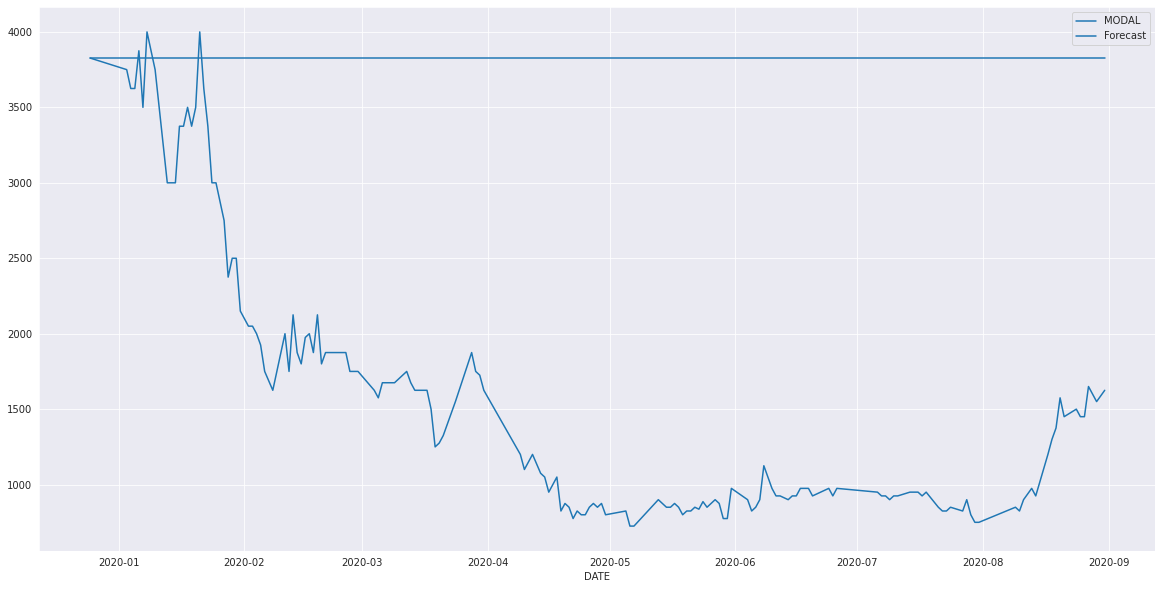

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 396.4268627166748
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(5, 2, 2, 7)   Log Likelihood              -21456.404
Date:                           Sat, 17 Oct 2020   AIC                          42940.807
Time:                                   20:25:08   BIC                          43027.565
Sample:                               01-01-2010   HQIC                         42971.713
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0825      0.027      3.038      0.002       0.029       0.136
ar.L2

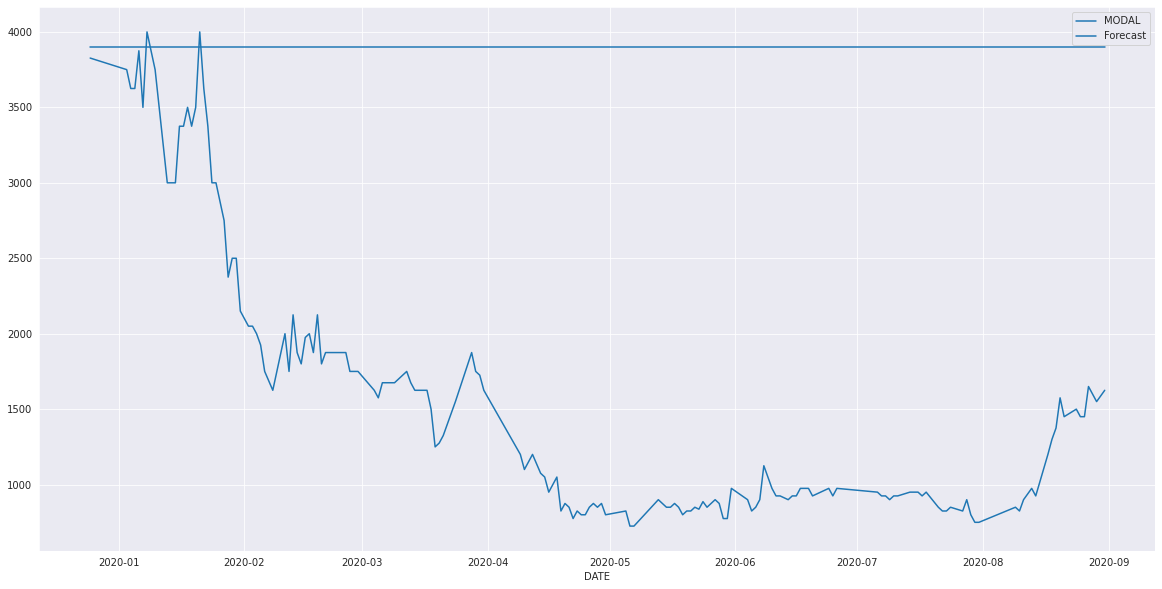

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 29.1722571849823
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 0, 2)   Log Likelihood              -21182.790
Date:                           Sat, 17 Oct 2020   AIC                          42391.581
Time:                                   20:25:38   BIC                          42472.191
Sample:                               01-01-2010   HQIC                         42420.291
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2344      0.080     -2.947      0.003      -0.390      -0.079
ar.L2 

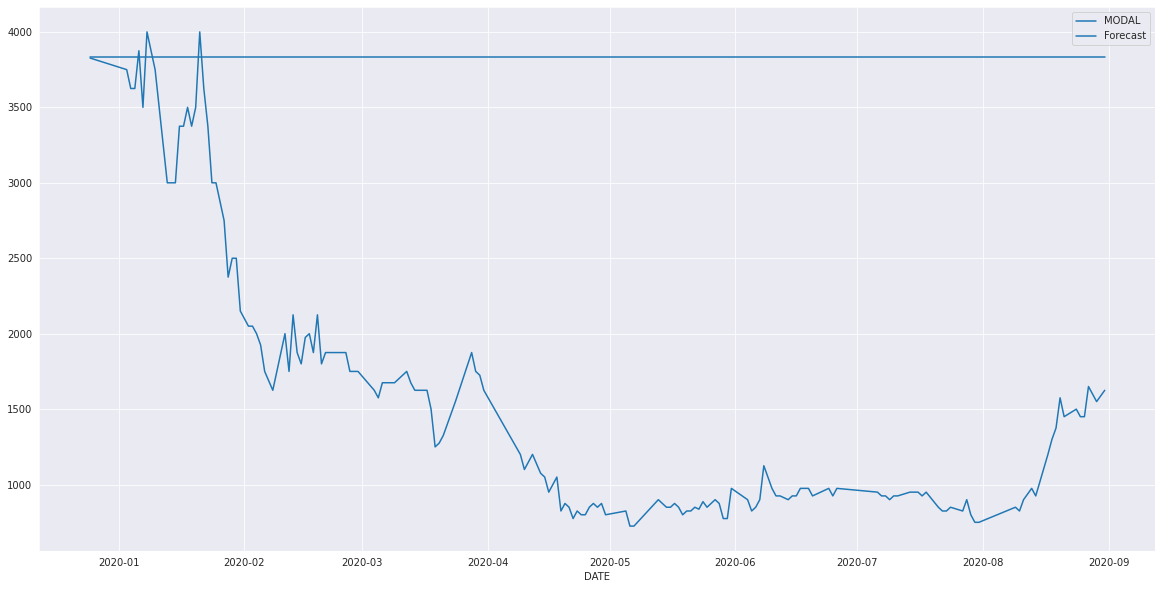

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 96.07998156547546
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 0, 5)   Log Likelihood              -21181.894
Date:                           Sat, 17 Oct 2020   AIC                          42389.788
Time:                                   20:27:15   BIC                          42470.399
Sample:                               01-01-2010   HQIC                         42418.498
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0688      0.040     -1.720      0.085      -0.147       0.010
ar.L2

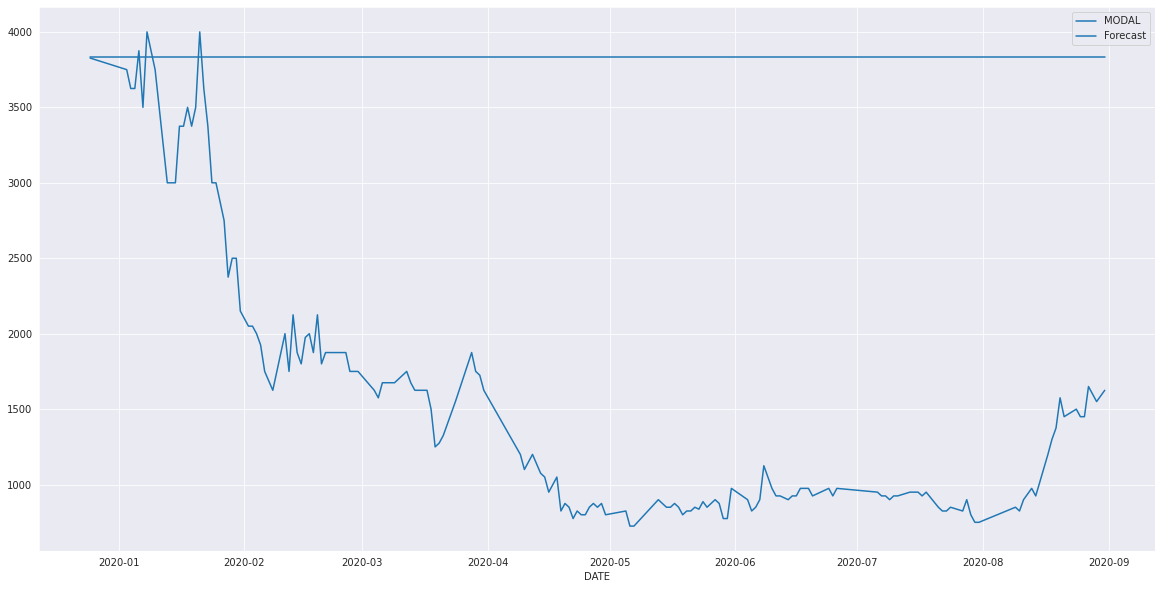

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 125.69599628448486
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 0, 7)   Log Likelihood              -21183.379
Date:                           Sat, 17 Oct 2020   AIC                          42392.758
Time:                                   20:29:22   BIC                          42473.369
Sample:                               01-01-2010   HQIC                         42421.468
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0216      0.050     -0.431      0.666      -0.120       0.077
ar.L

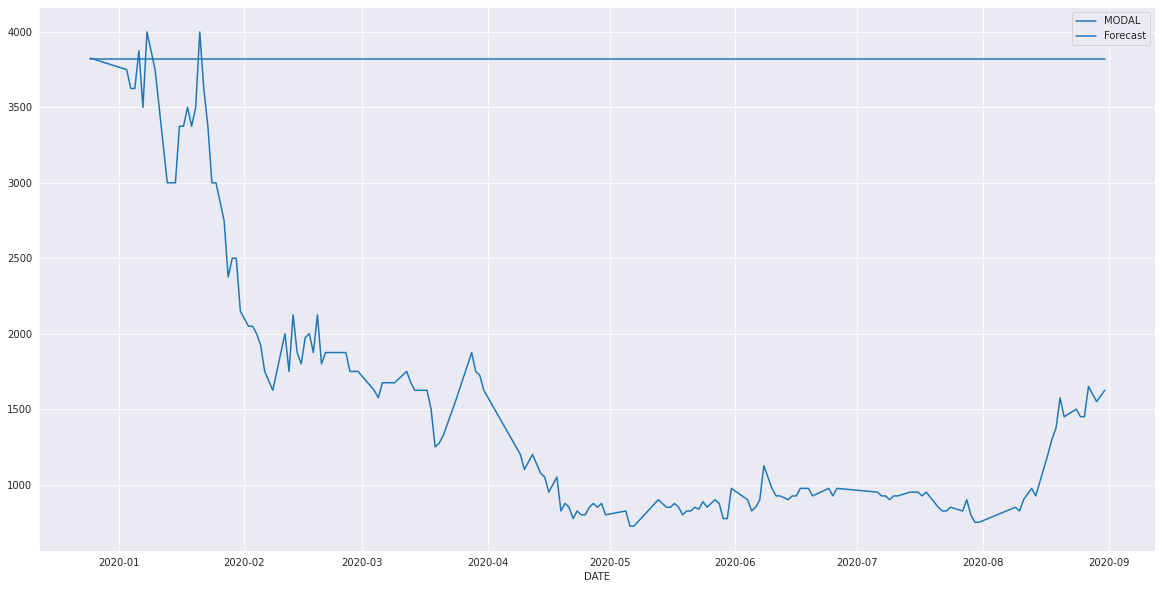

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 66.02596521377563
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 0, 2)   Log Likelihood              -21185.884
Date:                           Sat, 17 Oct 2020   AIC                          42397.768
Time:                                   20:30:28   BIC                          42478.372
Sample:                               01-01-2010   HQIC                         42426.477
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1203      0.009     14.148      0.000       0.104       0.137
ar.L2

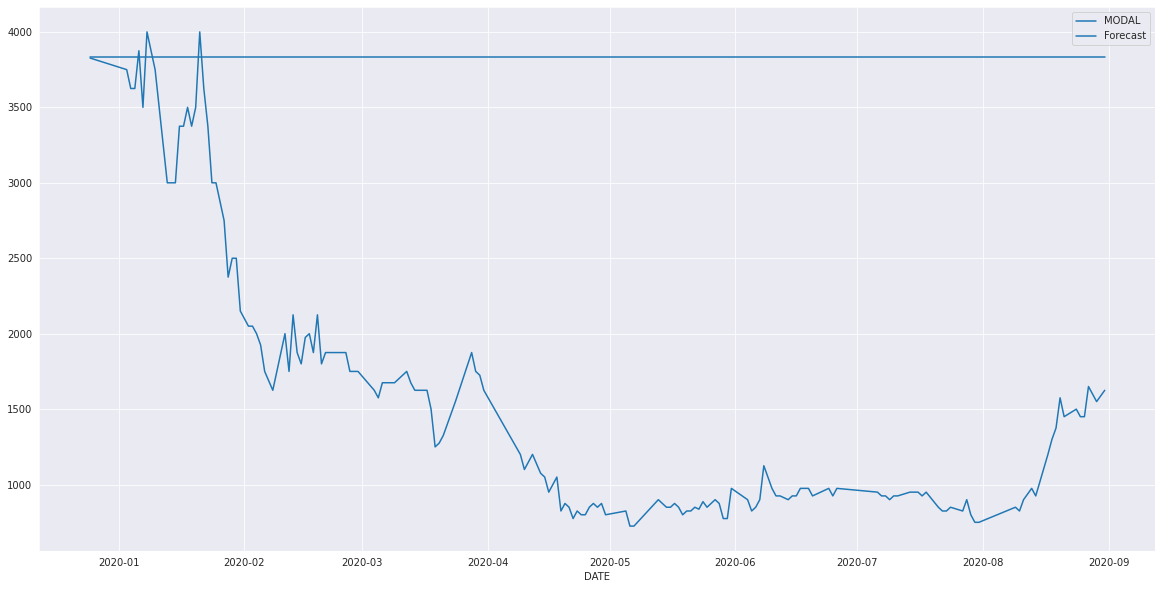

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 143.59635424613953
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 0, 5)   Log Likelihood              -21343.467
Date:                           Sat, 17 Oct 2020   AIC                          42712.934
Time:                                   20:32:53   BIC                          42793.527
Sample:                               01-01-2010   HQIC                         42741.640
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7188      0.009     82.075      0.000       0.702       0.736
ar.L

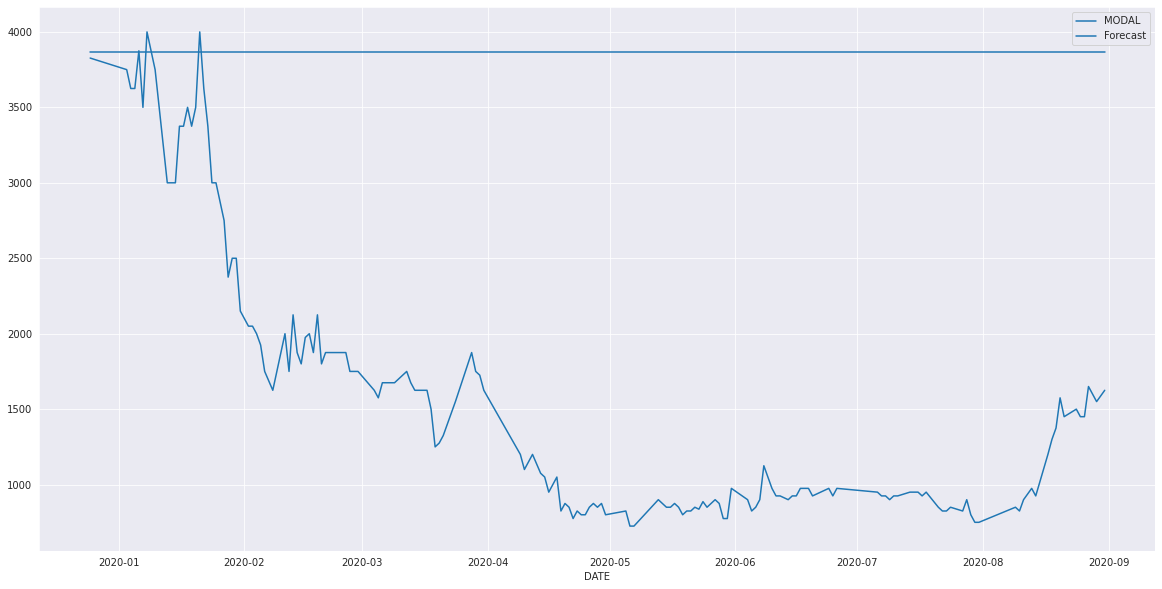

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 275.8763930797577
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 0, 7)   Log Likelihood              -21386.326
Date:                           Sat, 17 Oct 2020   AIC                          42798.653
Time:                                   20:37:30   BIC                          42879.239
Sample:                               01-01-2010   HQIC                         42827.357
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1769      0.036      4.898      0.000       0.106       0.248
ar.L2

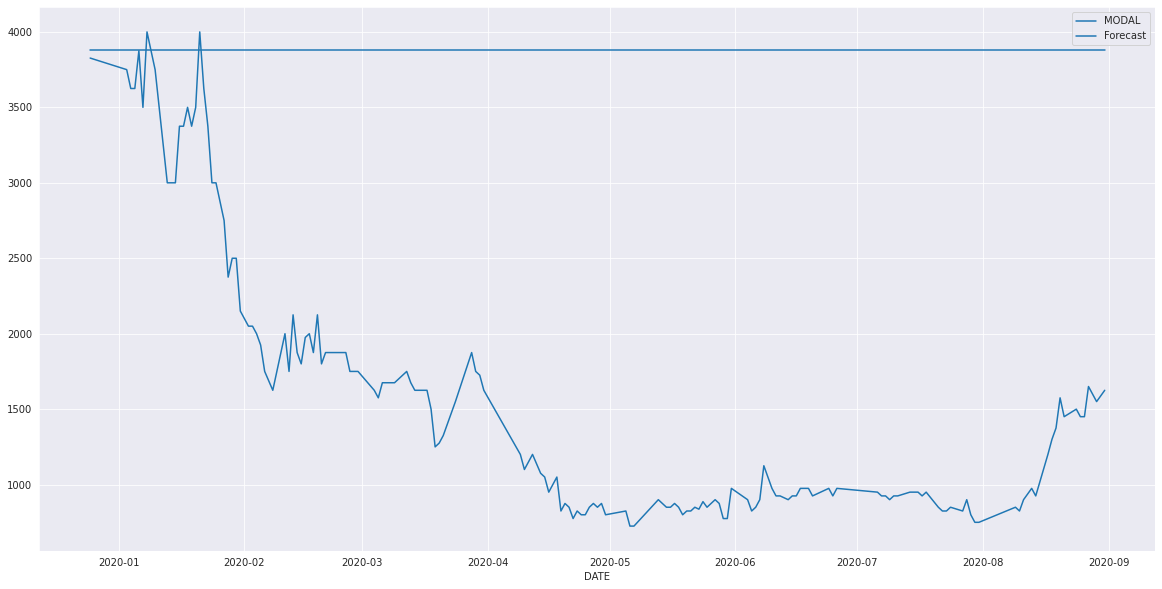

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 78.54277229309082
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 0, 2)   Log Likelihood              -21379.816
Date:                           Sat, 17 Oct 2020   AIC                          42785.632
Time:                                   20:38:49   BIC                          42866.229
Sample:                               01-01-2010   HQIC                         42814.339
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0689      0.007      9.643      0.000       0.055       0.083
ar.L2

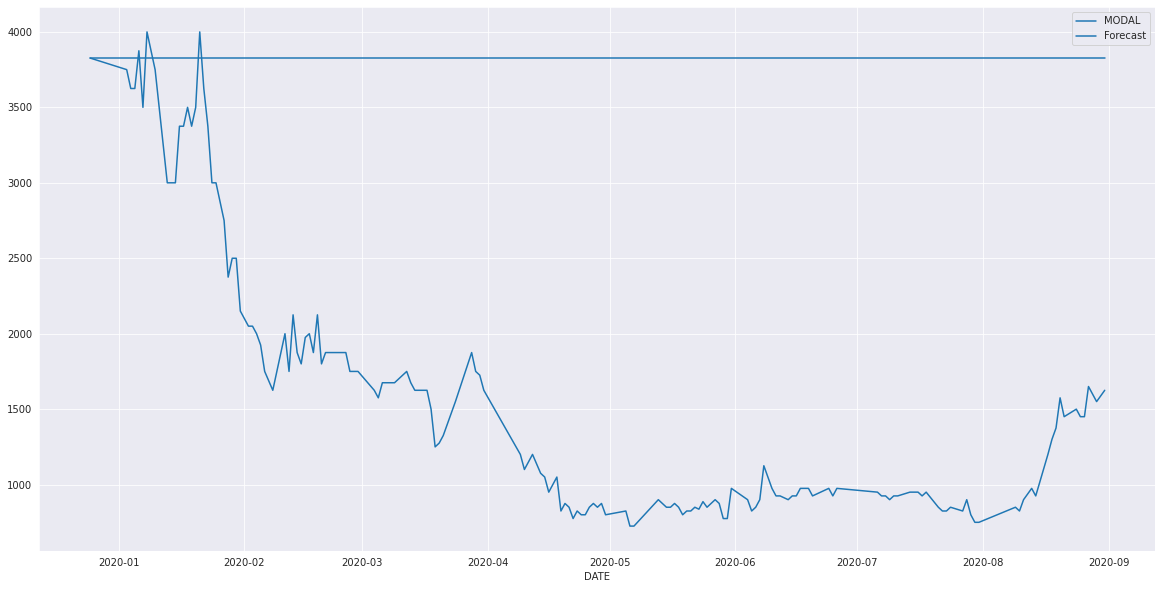

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 237.47021651268005
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 0, 5)   Log Likelihood              -21984.487
Date:                           Sat, 17 Oct 2020   AIC                          43994.973
Time:                                   20:42:47   BIC                          44075.548
Sample:                               01-01-2010   HQIC                         44023.675
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7842      0.010     79.558      0.000       0.765       0.803
ar.L

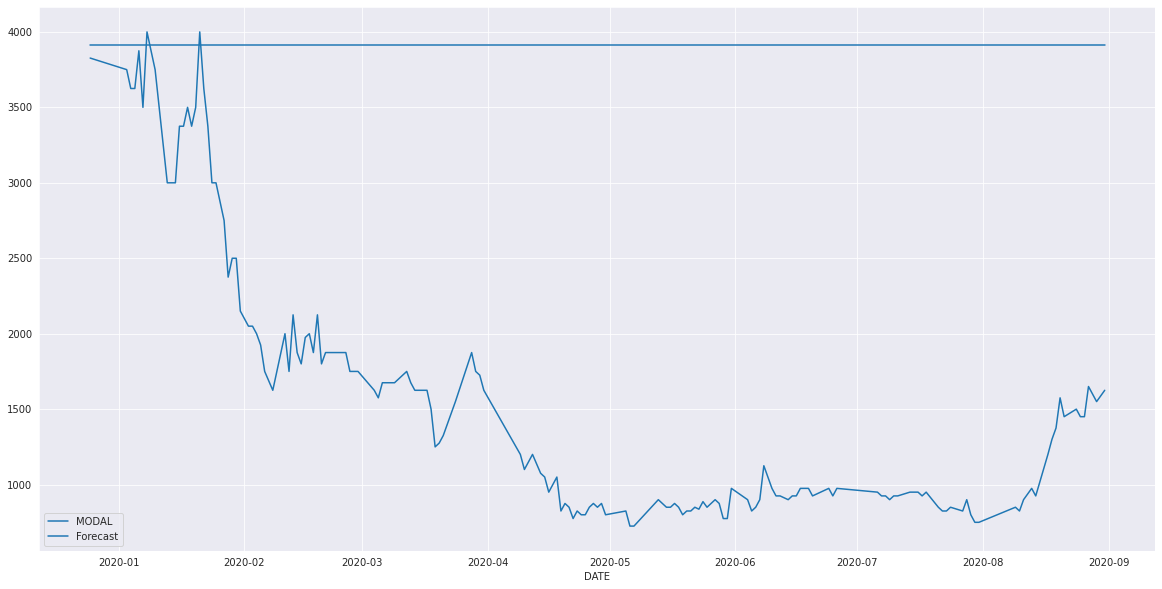

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 287.4601094722748
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 0, 7)   Log Likelihood              -21945.241
Date:                           Sat, 17 Oct 2020   AIC                          43916.482
Time:                                   20:47:36   BIC                          43997.043
Sample:                               01-01-2010   HQIC                         43945.180
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7919      0.015   -116.218      0.000      -1.822      -1.762
ar.L2

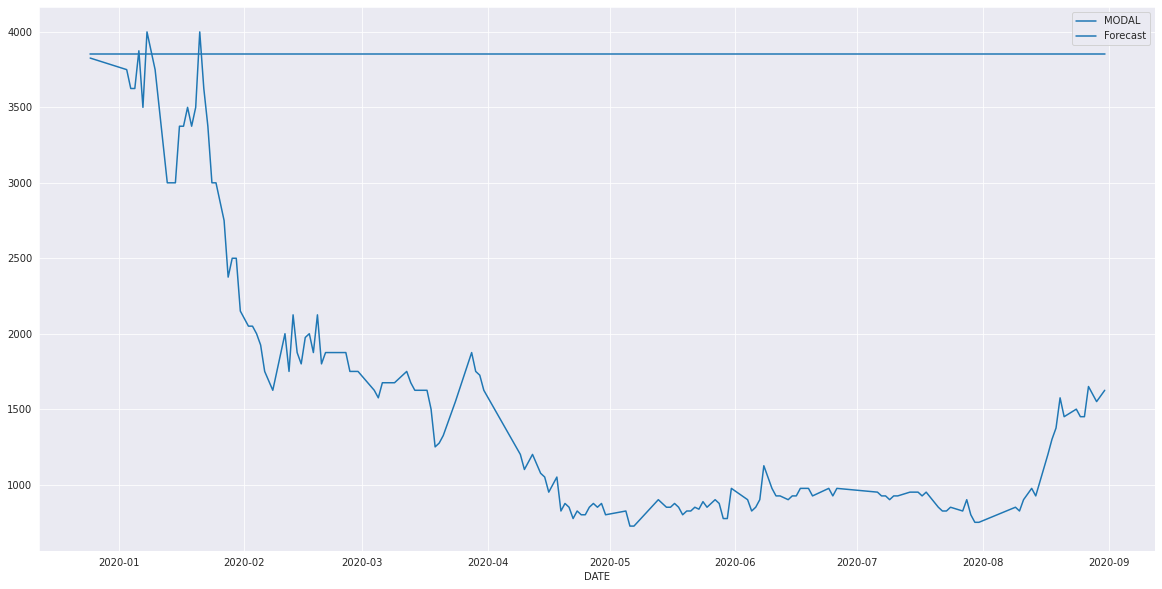

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 32.884657859802246
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 1, 2)   Log Likelihood              -21180.301
Date:                           Sat, 17 Oct 2020   AIC                          42388.602
Time:                                   20:48:10   BIC                          42475.414
Sample:                               01-01-2010   HQIC                         42419.521
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2944      0.083     -3.532      0.000      -0.458      -0.131
ar.L

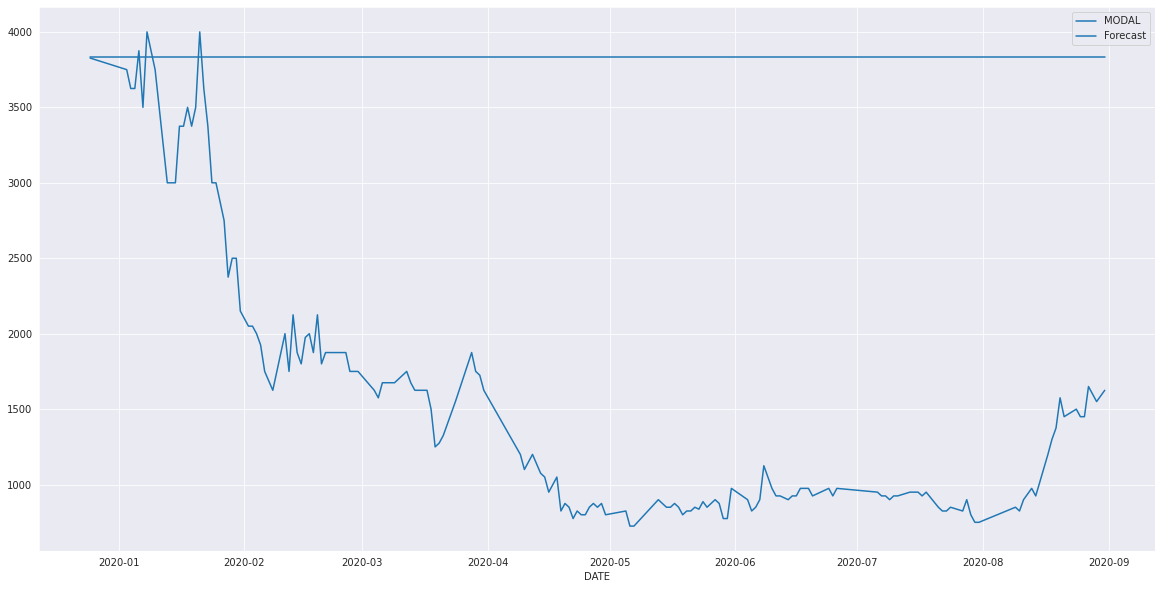

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 107.56632709503174
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 1, 5)   Log Likelihood              -21181.122
Date:                           Sat, 17 Oct 2020   AIC                          42390.245
Time:                                   20:49:58   BIC                          42477.057
Sample:                               01-01-2010   HQIC                         42421.164
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0684      0.040     -1.727      0.084      -0.146       0.009
ar.L

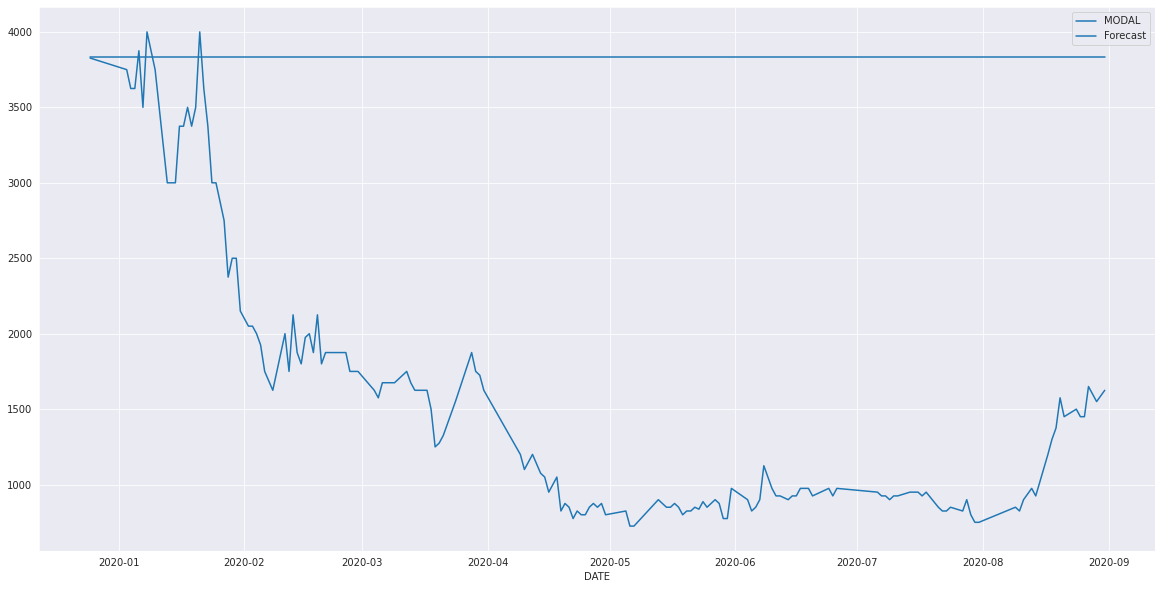

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 150.25796604156494
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 1, 7)   Log Likelihood              -21183.610
Date:                           Sat, 17 Oct 2020   AIC                          42395.220
Time:                                   20:52:29   BIC                          42482.032
Sample:                               01-01-2010   HQIC                         42426.139
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0260      0.049     -0.529      0.597      -0.122       0.070
ar.L

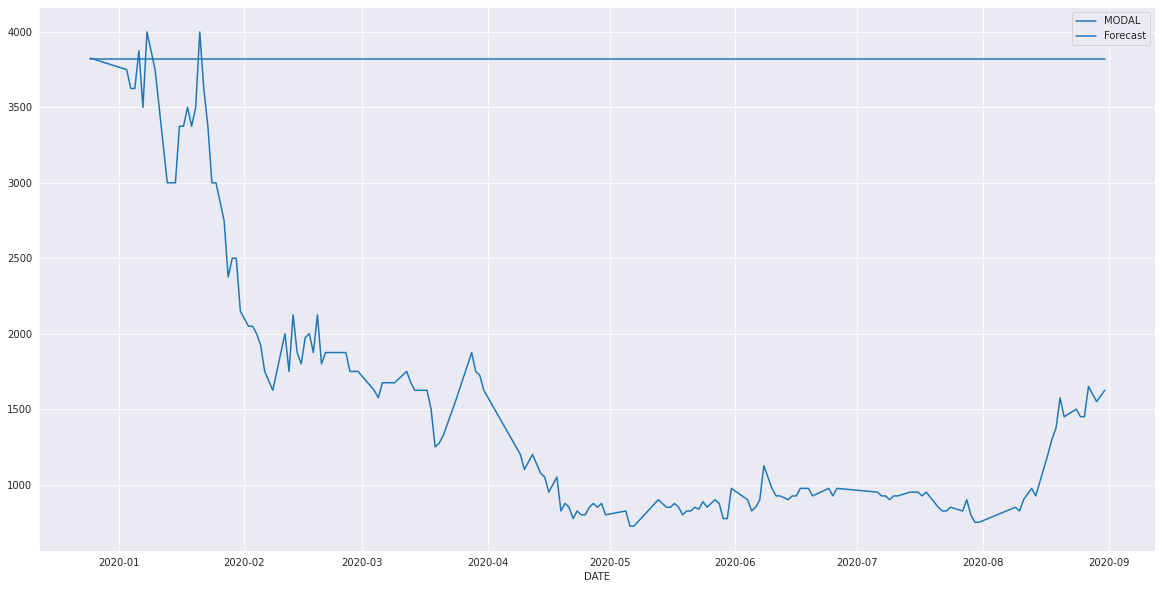

Model Fitting Time: 60.31759214401245
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 1, 2)   Log Likelihood              -21196.413
Date:                           Sat, 17 Oct 2020   AIC                          42420.825
Time:                                   20:53:30   BIC                          42507.629
Sample:                               01-01-2010   HQIC                         42451.742
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1320      0.009     14.970      0.000       0.115       0.149
ar.L2

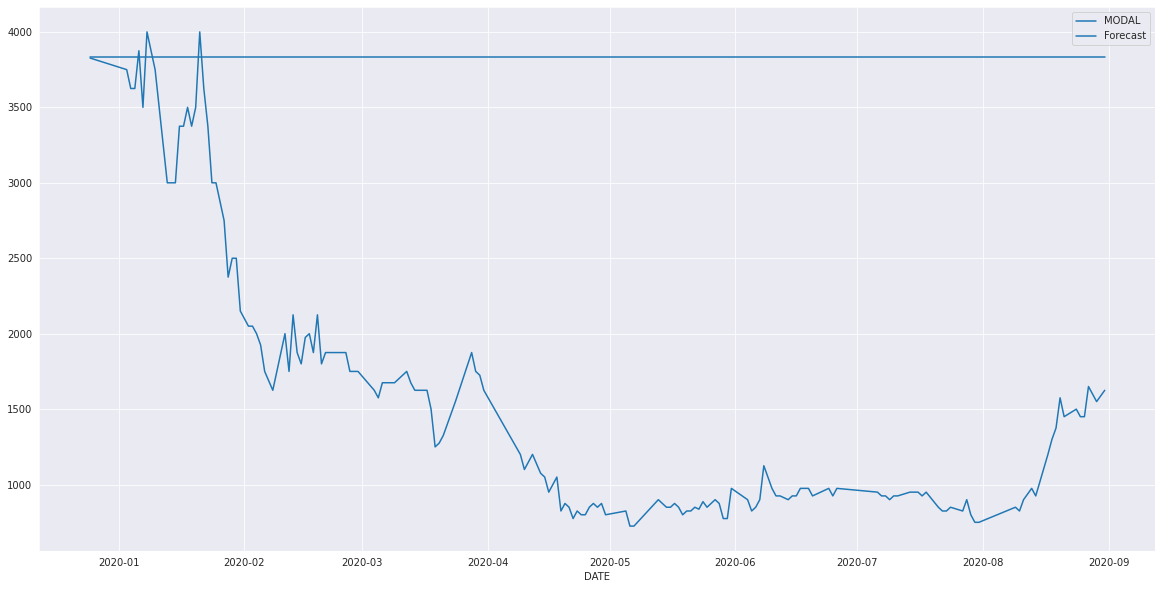

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 213.99014019966125
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 1, 5)   Log Likelihood              -21188.805
Date:                           Sat, 17 Oct 2020   AIC                          42405.610
Time:                                   20:57:05   BIC                          42492.403
Sample:                               01-01-2010   HQIC                         42436.524
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1811      0.023     51.036      0.000       1.136       1.226
ar.L

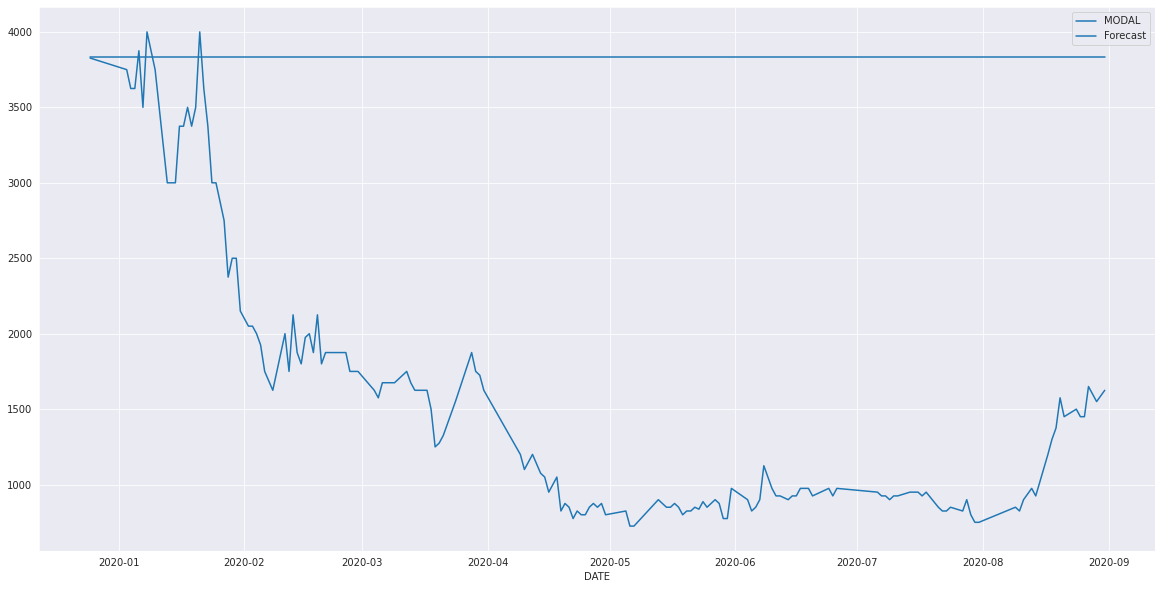

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 6457.647133350372
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 1, 1, 7)   Log Likelihood              -21174.827
Date:                           Sat, 17 Oct 2020   AIC                          42377.654
Time:                                   22:44:44   BIC                          42464.439
Sample:                               01-01-2010   HQIC                         42408.566
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2091      0.037      5.630      0.000       0.136       0.282
ar.L2

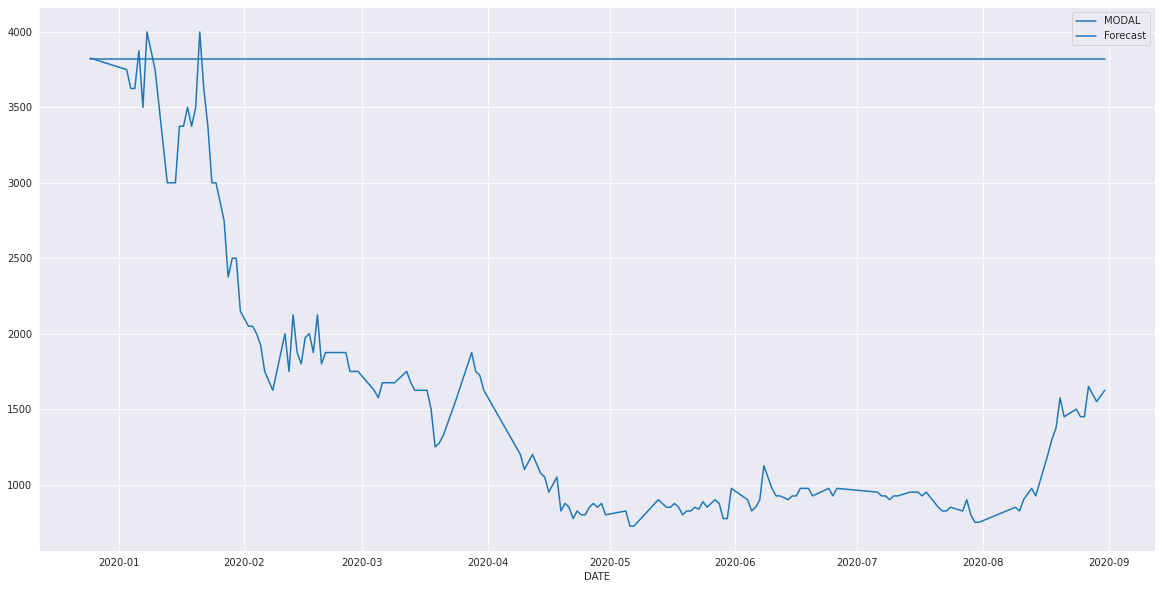

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 93.98997831344604
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 1, 2)   Log Likelihood              -21259.597
Date:                           Sat, 17 Oct 2020   AIC                          42547.195
Time:                                   22:46:19   BIC                          42633.991
Sample:                               01-01-2010   HQIC                         42578.110
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0998      0.011      9.309      0.000       0.079       0.121
ar.L2

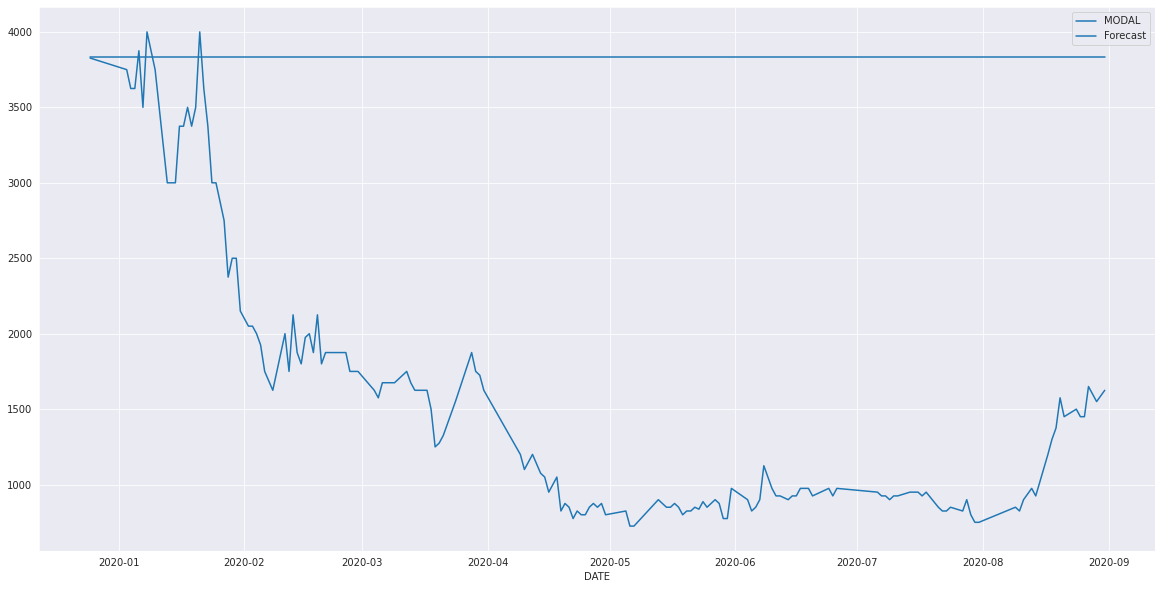

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 239.18423295021057
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 1, 5)   Log Likelihood              -21426.751
Date:                           Sat, 17 Oct 2020   AIC                          42881.503
Time:                                   22:50:18   BIC                          42968.276
Sample:                               01-01-2010   HQIC                         42912.412
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0936      0.017    121.933      0.000       2.060       2.127
ar.L

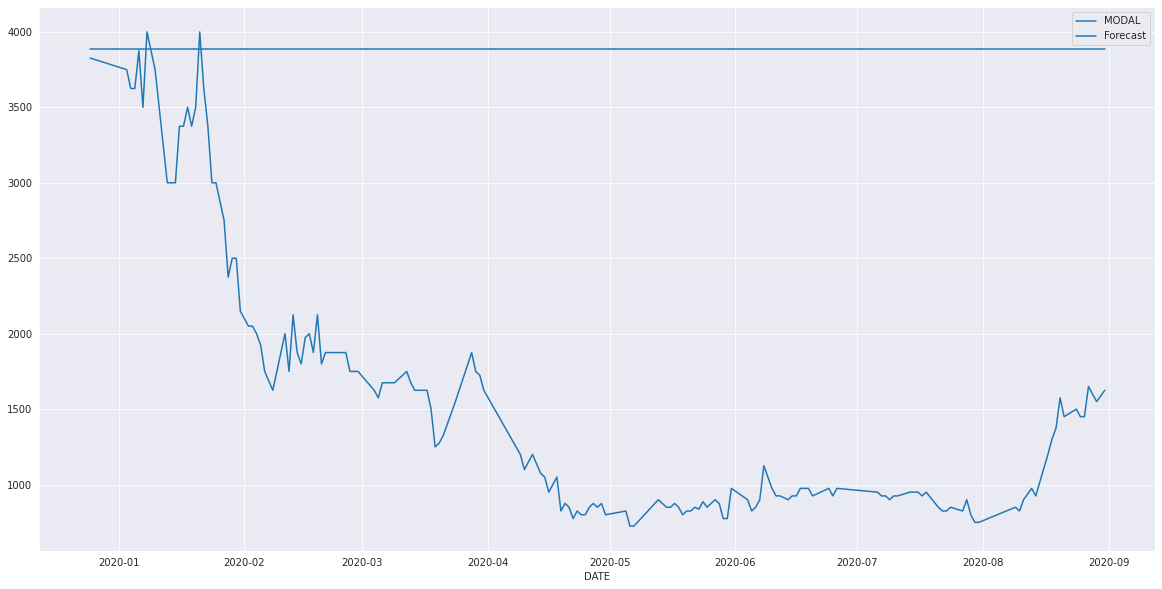

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 377.9889166355133
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 2, 1, 7)   Log Likelihood              -21403.896
Date:                           Sat, 17 Oct 2020   AIC                          42835.792
Time:                                   22:56:37   BIC                          42922.550
Sample:                               01-01-2010   HQIC                         42866.698
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8198      0.013   -143.771      0.000      -1.845      -1.795
ar.L2

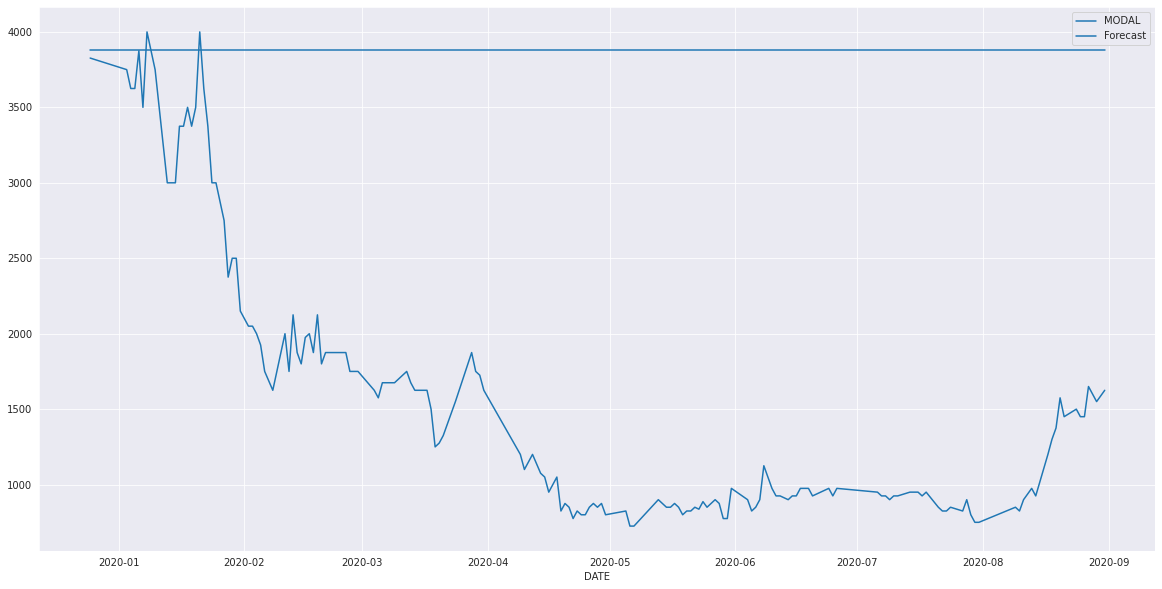

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 28.424023866653442
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 2, 2)   Log Likelihood              -21181.294
Date:                           Sat, 17 Oct 2020   AIC                          42392.588
Time:                                   22:57:07   BIC                          42485.600
Sample:                               01-01-2010   HQIC                         42425.715
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1423      0.284     -0.501      0.616      -0.699       0.414
ar.L

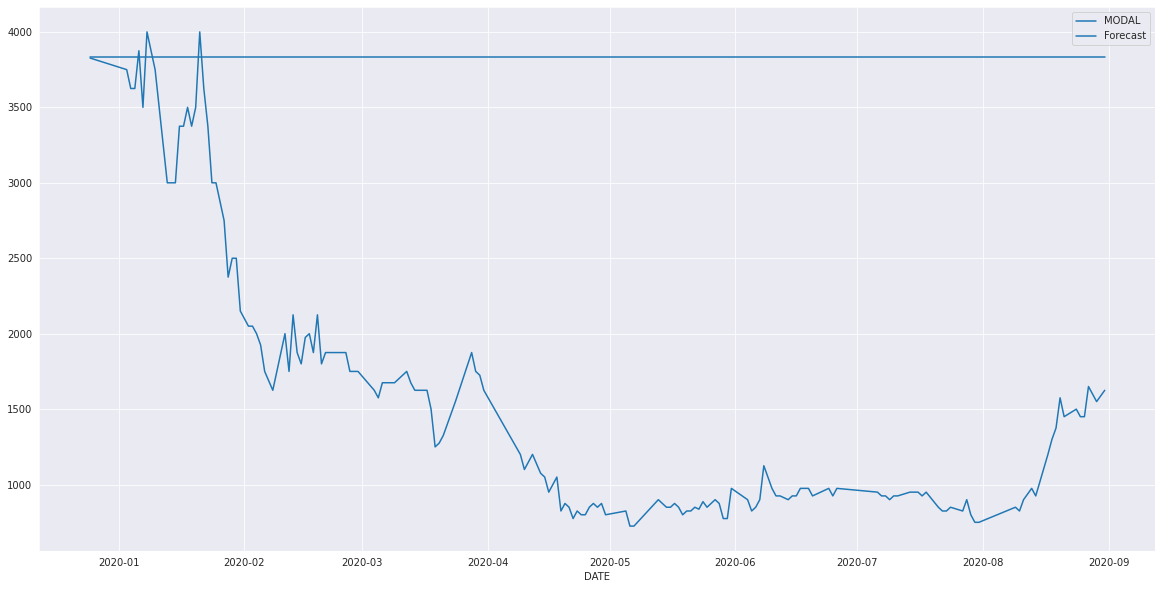

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 123.41365957260132
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 1, 2)x(6, 0, 2, 5)   Log Likelihood              -21179.893
Date:                           Sat, 17 Oct 2020   AIC                          42389.787
Time:                                   22:59:11   BIC                          42482.799
Sample:                               01-01-2010   HQIC                         42422.914
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0701      0.040     -1.749      0.080      -0.149       0.008
ar.L

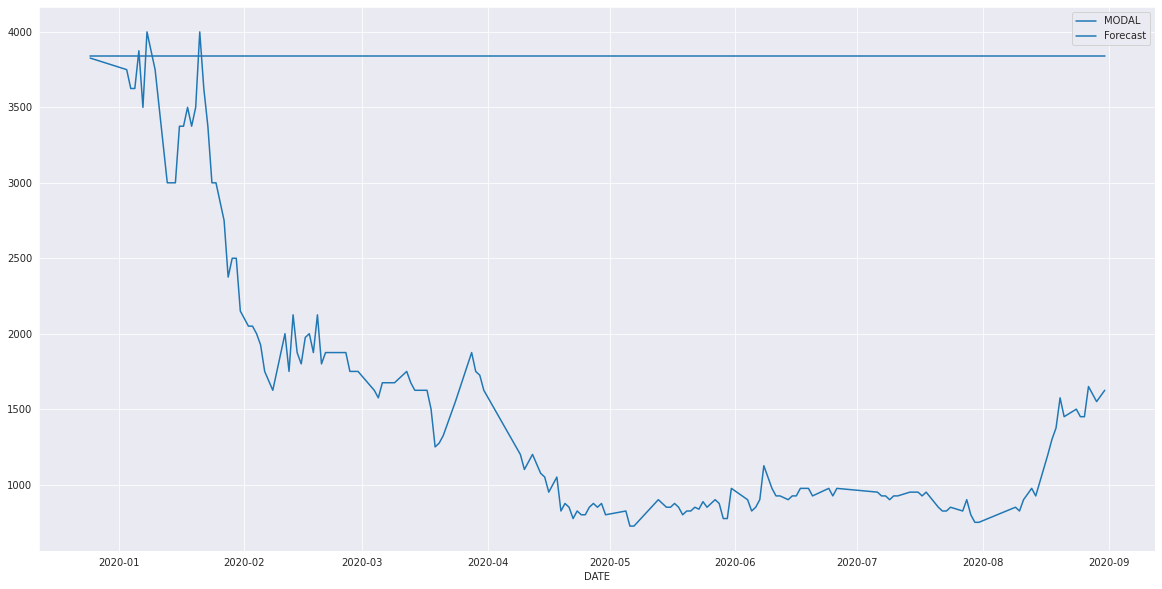

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
train_data = Interpolated_df.iloc[:3645]
test_data = Interpolated_df.iloc[3645:]
create_model(train_data, test_data)

Model Fitting Time: 98.65327787399292
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 7, 2)x(4, 0, 0, 7)   Log Likelihood                 666.539
Date:                           Sat, 17 Oct 2020   AIC                          -1311.079
Time:                                   18:17:35   BIC                          -1242.888
Sample:                               01-01-2010   HQIC                         -1286.790
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0357      0.007   -308.618      0.000      -2.049      -2.023
ar.L2

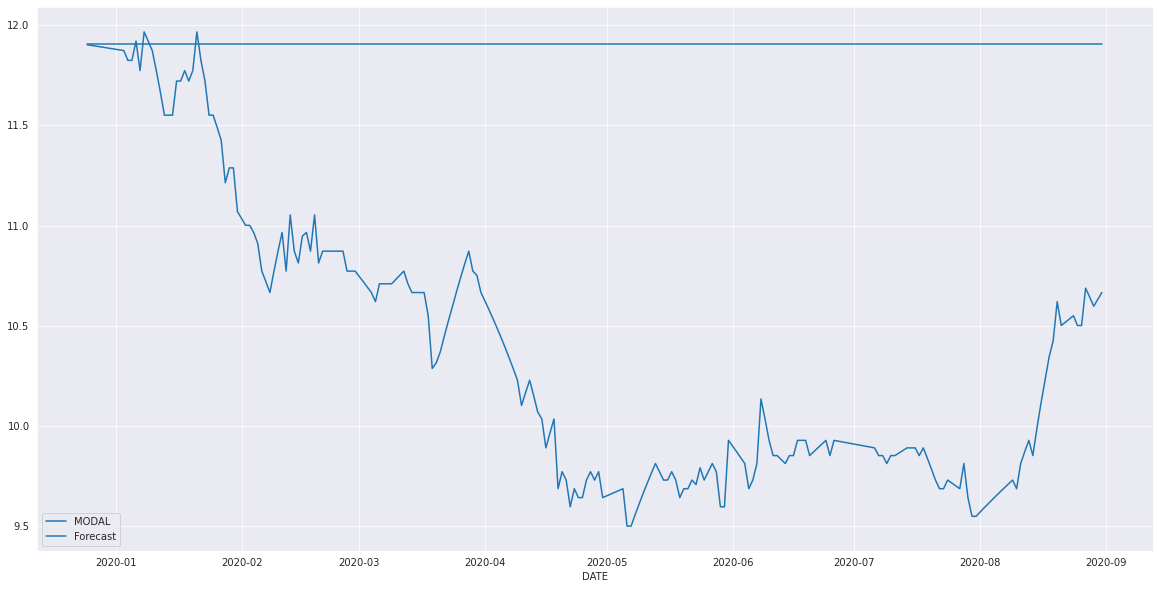

/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/siram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 233.207102060318
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(4, 7, 6)x(4, 0, 0, 7)   Log Likelihood                 170.099
Date:                           Sat, 17 Oct 2020   AIC                           -310.197
Time:                                   18:21:29   BIC                           -217.210
Sample:                               01-01-2010   HQIC                          -277.076
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.3788      0.012   -287.339      0.000      -3.402      -3.356
ar.L2 

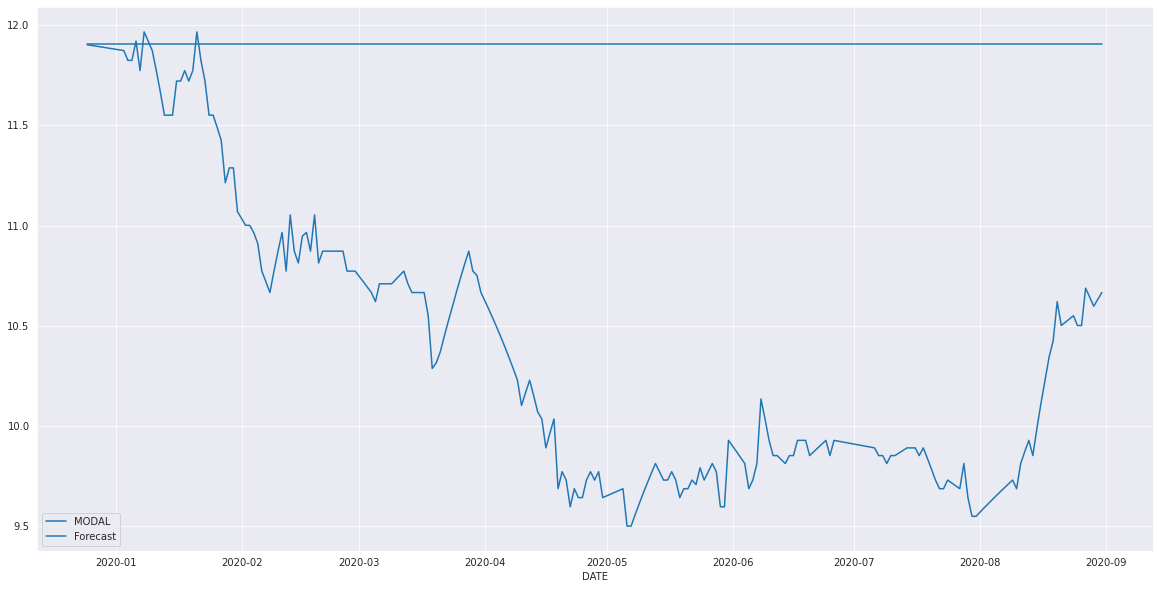

In [146]:
train_data = normalized_df.iloc[:3645]
test_data = normalized_df.iloc[3645:]
create_model(train_data, test_data)

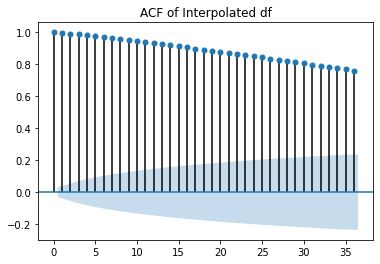

In [6]:
plot_acf(indexed_df, title= "ACF of Interpolated df")
plt.show()

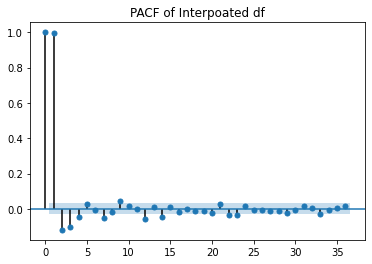

In [7]:
plot_pacf(indexed_df, title= "PACF of Interpoated df")
plt.show()

In [25]:
indexed_df[-2:]

DATE
2020-08-30    1587.5
2020-08-31    1625.0
Name: MODAL, dtype: float64

Model Fitting Time: 4.836182117462158
                                 Statespace Model Results                                
Dep. Variable:                             MODAL   No. Observations:                 3645
Model:             SARIMAX(2, 0, 2)x(1, 0, 0, 7)   Log Likelihood              -21206.514
Date:                           Tue, 20 Oct 2020   AIC                          42425.029
Time:                                   16:41:09   BIC                          42462.235
Sample:                               01-01-2010   HQIC                         42438.280
                                    - 12-24-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4310      0.070     20.523      0.000       1.294       1.568
ar.L2

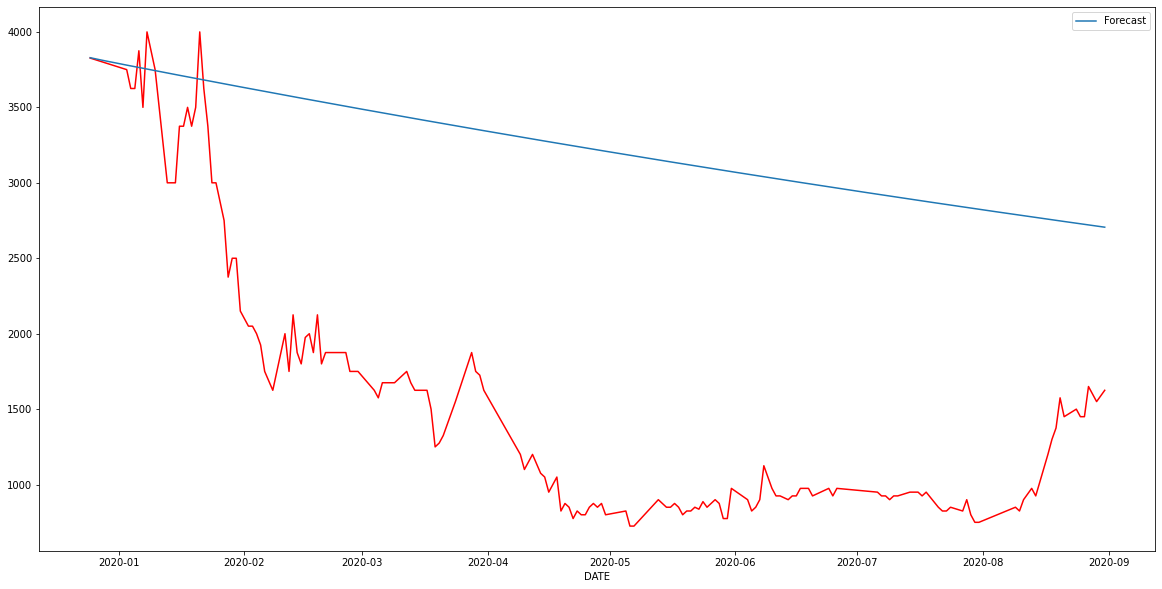

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import numpy as np
import seaborn as sns
train_data = indexed_df.iloc[:3645]
test_data = indexed_df.iloc[3645:]
p= 2
q= 2
d= 0
S= 7
P= 1
Q= 0
D= 0
model = SARIMAX(train_data, order= (p,d,q), seasonal_order= (P,D,Q,S), freq='D')
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
print(model_fit.summary())
fcast=model_fit.predict('2019-12-24','2020-08-31')
fcast=pd.DataFrame({"Forecast": fcast},index=test_data.index)
residuals = test_data.values - fcast.values
print(f'Root Mean Squared Error for {(p,d,q)},{(P,D,Q,S)}: is ', np.sqrt(np.mean(residuals**2)))
fig, axes = plt.subplots(figsize= (20,10))
sns.lineplot(data= test_data,color='red', ax= axes )
sns.lineplot(data= fcast, ax= axes)
plt.show()

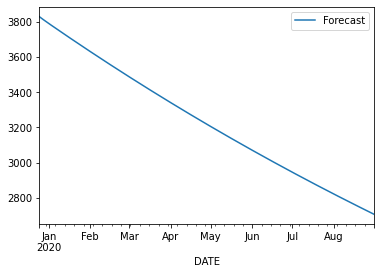

In [51]:
fcast.plot()
plt.show()